<a href="https://colab.research.google.com/github/Bovi-analytics/Hut-et-al-2022/blob/main/DefinitiveModelRuminationTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook for Rumination time

*   Load libraries
*   Create dataset rumination grouped per 3/4/5
*   Descriptives dataset rumination all cows
*   Run models rumination grouped in 7 groups per 4
    * Create subsets rumination
    * Descriptives lactating AMS/CMS and dry cows
    * Models linear mixed models (glmmTNB):
      1. THI mean
      2. THI max
      3. THI min
      4. THI mean 1 day before
      5. THI mean 2 days before
      6. Temperature mean
      7. Temperature max
      8. Temperature min
      9. Temperature mean 1 day before
      10. Temperature mean 2 days before
  
      a= lactating cows AMS farms
      b= lactating cows CMS farms
      c= dry cows
*   Rumination time figures:
    * THI mean figures
    * Temperature mean figures


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
%reload_ext rpy2.ipython

# Libraries

In [ ]:
%%R
lib_loc <- "/content/drive/Shareddrives/Bovi-Analytics/R-lib/"

In [ ]:
%%R
package_list <- c("glmmTMB",
                  "dplyr",
                  "ggplot2",
                  "emmeans",
                  "lsmeans",
                  "plyr")

for (pkg in package_list) {
  if (pkg %in% rownames(.packages()) == FALSE)
  {library(pkg, lib.loc = lib_loc, character.only = TRUE)}

}

# Create dataset rumination grouped per 3/4/5

In [ ]:
%%R
url_rumination <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/in/SensorData/ObservationType=RuminationTimeMinutesPerDay/part-00139-tid-7288064156538290647-292796ee-9893-4de2-a04f-ea381f27134d-135-1.c000.csv'
dataset_behaviour <- read.csv(url_rumination, header = TRUE, sep = ",") %>% 
 dplyr::mutate(
    Date = as.Date(EventDate,"%Y-%m-%d")
    ) %>%
 dplyr::select(
     -c(EventDate, Hour)
    ) %>%
 mutate(DimCat = case_when(DaysInMilk <= 0 ~ 0, #condition 1
                         DaysInMilk <= 21  ~ 1, #condition 2
                         DaysInMilk <= 60  ~ 3, #condition 3
                         DaysInMilk <= 120 ~ 4, #condition 4
                         DaysInMilk <= 200 ~ 5, #condition 5
                         DaysInMilk >= 200 ~ 6
    )) %>%
  mutate(AutomaticMilking = case_when(HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314 ~ 1, 
                         HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888~ 0
    )) %>%
  mutate(CowLac = paste(LactationNumber, AnimalEartag)) 

In [ ]:
%%R
url_KNMI3 <-'/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/df_KNMI_per3.csv'
url_KNMI4 <-'/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/df_KNMI_per4.csv'
url_KNMI5 <-'/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/df_KNMI_per5.csv'

In [ ]:
%%R
dataset_KNMI3 <- read.csv(url_KNMI3, header = TRUE, sep = ",") %>% 
  dplyr::mutate(
      Date = as.Date(Date,"%Y-%m-%d")
  )
  dataset_KNMI4 <- read.csv(url_KNMI4, header = TRUE, sep = ",") %>% 
  dplyr::mutate(
      Date = as.Date(Date,"%Y-%m-%d")
  )
  dataset_KNMI5 <- read.csv(url_KNMI5, header = TRUE, sep = ",") %>% 
  dplyr::mutate(
      Date = as.Date(Date,"%Y-%m-%d")
  )

In [ ]:
%%R
df_joined_per4 <- dataset_behaviour %>%
  dplyr::left_join(dataset_KNMI4, by = c("HerdIdentifier", "Date")) %>%                                                              
  dplyr::filter(Year > 2016) %>%
  dplyr::filter(SensorValue <=1440) %>%
  dplyr::mutate(Day= as.numeric(Date)-min(as.numeric(Date))) %>%
  dplyr::mutate(LactationNumber= case_when(LactationNumber == 1 ~ 1,
                                            LactationNumber == 2 ~ 2,
                                            LactationNumber == 3 ~ 3,
                                            LactationNumber == 4 ~ 4,
                                            LactationNumber == 5 ~ 5,
                                            LactationNumber == 6 ~ 6,
                                            LactationNumber == 7 ~ 7,
                                            LactationNumber >= 8 ~ 8))

In [ ]:
%%R
df_joined_per3 <- dataset_behaviour %>%
  dplyr::left_join(dataset_KNMI3, by = c("HerdIdentifier", "Date")) %>%                                                              
  dplyr::filter(Year > 2016) %>%
  dplyr::filter(SensorValue <=1440) %>%
  dplyr::mutate(Day= as.numeric(Date)-min(as.numeric(Date))) %>%
  dplyr::mutate(LactationNumber= case_when(LactationNumber == 1 ~ 1,
                                            LactationNumber == 2 ~ 2,
                                            LactationNumber == 3 ~ 3,
                                            LactationNumber == 4 ~ 4,
                                            LactationNumber == 5 ~ 5,
                                            LactationNumber == 6 ~ 6,
                                            LactationNumber == 7 ~ 7,
                                            LactationNumber >= 8 ~ 8))

In [ ]:
%%R
df_joined_per5 <- dataset_behaviour %>%
  dplyr::left_join(dataset_KNMI5, by = c("HerdIdentifier", "Date")) %>%                                                              
  dplyr::filter(Year > 2016) %>%
  dplyr::filter(SensorValue <=1440) %>%
  dplyr::mutate(Day= as.numeric(Date)-min(as.numeric(Date))) %>%
  dplyr::mutate(LactationNumber= case_when(LactationNumber == 1 ~ 1,
                                            LactationNumber == 2 ~ 2,
                                            LactationNumber == 3 ~ 3,
                                            LactationNumber == 4 ~ 4,
                                            LactationNumber == 5 ~ 5,
                                            LactationNumber == 6 ~ 6,
                                            LactationNumber == 7 ~ 7,
                                            LactationNumber >= 8 ~ 8))

In [ ]:
%%R
write.csv(df_joined_per3, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/df_joined_per3_rumination.csv', row.names = FALSE)
write.csv(df_joined_per4, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/df_joined_per4_rumination.csv', row.names = FALSE)
write.csv(df_joined_per5, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/df_joined_per5_rumination.csv', row.names = FALSE)

#Descriptives dataset rumination all cows together

In [ ]:
## Count unique cowlactations in the dataset
%%R
length(unique(df_joined_per4$CowLac))

[1] 4765


In [ ]:
## Count number of measurements per lactationgroup in the dataset. 
%%R
table(df_joined_per4$LactationNumber)


     1      2      3      4      5      6      7      8 
256143 259938 209049 143652  84679  44147  16910  17108 


In [ ]:
## Days in each THI mean group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$ThiMeanCat)


     0      1      2      3      4      5      6 
 10592 596572 142569 143813  94350  31614  12116 


In [ ]:
## Days in each THI max group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$ThiMaxCat)


     0      1      2      3      4      5      6 
  1322 426599 111960 120433 147031 128769  95512 


In [ ]:
## Days in each THI min group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$ThiMinCat)


     0      1      2      3      4      5      6 
 61563 543651 138994 127944 101971  45067  12436 


In [ ]:
## Days in each THI mean 1daybefore group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$ThiMean1daybeforeCat)


     0      1      2      3      4      5      6 
 10498 596266 142672 143817  94426  31722  12097 


In [ ]:
## Days in each THI mean 2 daysbefore group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$ThiMean2daysbeforeCat)


     0      1      2      3      4      5      6 
 10514 595799 142738 143909  94614  31690  12105 


In [ ]:
## Days in each Temperature mean group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$TempMeanCat)


     0      1      2      3      4      5      6 
 34222 510541 204297 197657  65106  16874   2929 


In [ ]:
## Days in each Temperature max group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$TempMaxCat)


     0      1      2      3      4      5      6 
 11446 367942 165675 170800 175145  91401  49217 


In [ ]:
## Days in each Temperature min group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$TempMinCat)


     0      1      2      3      4      5      6 
125087 201516 240957 230929 185936  41839   5362 


In [ ]:
## Days in each Temperature mean 1daybefore group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$TempMean1daybeforeCat)


     0      1      2      3      4      5      6 
 34159 510121 204515 197587  65320  16878   2918 


In [ ]:
## Days in each Temperature mean 2 daysbefore group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$TempMean2daysbeforeCat)


     0      1      2      3      4      5      6 
 34078 509874 204388 197672  65552  16875   2930 


In [ ]:
## Days in each THI mean group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$ThiMeanCat)



     0      1      2      3      4      5      6      7 
 10592 629454 109687 109507  97292  41778  21200  12116 


In [ ]:
## Days in each THI max group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$ThiMaxCat)


     0      1      2      3      4      5      6      7 
  1322 455370  83189  89084 102832 115196  89121  95512 


In [ ]:
## Days in each THI min group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$ThiMinCat)


     0      1      2      3      4      5      6      7 
183975 313481 107758 105027  96656  96759  70467  57503 


In [ ]:
## Days in each THI mean 1daybefore group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$ThiMean1daybeforeCat)


     0      1      2      3      4      5      6      7 
 10498 629000 109938 109721  97106  41879  21259  12097 


In [ ]:
## Days in each THI mean 2daysbefore group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$ThiMean2daysbeforeCat)


     0      1      2      3      4      5      6      7 
 10514 628458 110079 109930  97044  42001  21238  12105 


In [ ]:
## Days in each Temperature mean group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$TempMeanCat)


     0      1      2      3      4      5      6      7 
 34222 552126 162712 160174  81410  28501   9552   2929 


In [ ]:
## Days in each Temperature max group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$TempMaxCat)


     0      1      2      3      4      5      6      7 
 11446 410033 123584 122311 141334 113874  59827  49217 


In [ ]:
## Days in each Temperature min group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$TempMinCat)


     0      1      2      3      4      5      6      7 
125087 201516 180409 177975 167912 131526  41839   5362 


In [ ]:
## Days in each Temperature mean 1daybefore group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$TempMean1daybeforeCat)


     0      1      2      3      4      5      6      7 
 34159 510121 204515 160195  81439  28592   9559   2918 


In [ ]:
## Days in each Temperature mean 2daysbefore group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$TempMean2daysbeforeCat)


     0      1      2      3      4      5      6      7 
 34078 509874 204388 160367  81613  28550   9569   2930 


In [ ]:
## Days in each THI mean group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$ThiMeanCat)


     0      1      2      3      4      5 
 10592 566007 173134 179009  78798  24086 


In [ ]:
## Days in each THI max group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$ThiMaxCat)


     0      1      2      3      4      5 
  1322 398965 139594 156109 188319 147317 


In [ ]:
## Days in each THI min group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$ThiMinCat)


     0      1      2      3      4      5 
 61563 435893 177498 162779 136390  57503 


In [ ]:
## Days in each THI mean 1daybefore group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$ThiMean1daybeforeCat)


     0      1      2      3      4      5 
 10498 565662 173276 179081  78885  24096 


In [ ]:
## Days in each THI mean 2daysbefore group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$ThiMean2daysbeforeCat)


     0      1      2      3      4      5 
 10514 565306 173231 179102  79095  24121 


In [ ]:
## Days in each Temperature mean group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$TempMeanCat)


     0      1      2      3      4      5 
 34222 418328 233265 260902  72428  12481 


In [ ]:
## Days in each Temperature max group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$TempMaxCat)


     0      1      2      3      4      5 
 11446 275156 211689 217572 206719 109044 


In [ ]:
## Days in each Temperature min group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$TempMinCat)


     0      1      2      3      4      5 
125087 262674 297226 266104  75173   5362 


In [ ]:
## Days in each Temperature mean 1daybefore group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$TempMean1daybeforeCat)


     0      1      2      3      4      5 
 34159 417717 233725 260781  72639  12477 


In [ ]:
## Days in each Temperature mean 2daysbefore group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$TempMean2daysbeforeCat)


     0      1      2      3      4      5 
 34078 417514 233585 260835  72858  12499 


In [ ]:
%%R
rm(dataset_behaviour)
rm(dataset_KNMI3)
rm(dataset_KNMI4)
rm(dataset_KNMI5)
gc()

            used  (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2000098 106.9    6361986  339.8   5117192  273.3
Vcells 107564993 820.7  195582936 1492.2 195544703 1491.9


# Run models Rumination grouped in 7 groups per 4

## Create sub datasets rumination

In [ ]:
## load dataset
%%R 
url4 <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/df_joined_per4_rumination.csv'

dataset_per4 <- read.csv(url4, header = TRUE, sep = ",")[ ,c('SensorValue','DimCat','LactationNumber','ThiMeanCat','TempMeanCat','ThiMaxCat','TempMinCat','ThiMinCat',
                                                       'ThiMean1daybeforeCat', 'TempMean1daybeforeCat', 'ThiMean2daysbeforeCat', 'TempMean2daysbeforeCat','CowLac',  
                                                        'TempMaxCat','Year', 'Month', 'HerdIdentifier','Day','AnimalEartag','CowLac', 'Temp6Hrs16','Thi6Hrs60')]
## Change categorized data to factor and relevel 
dataset<-dataset_per4
dataset$fDimCat <- factor(dataset$DimCat)
dataset$fHerdIdentifier <- factor(dataset$HerdIdentifier)
dataset$fYear <- factor(dataset$Year)
dataset$fMonth <- factor(dataset$Month)
dataset$fThiMeanCat <- factor(dataset$ThiMeanCat)
dataset$fThiMaxCat <- factor(dataset$ThiMaxCat)
dataset$fThiMinCat <- factor(dataset$ThiMinCat)
dataset$fTempMeanCat <- factor(dataset$TempMeanCat)
dataset$fTempMaxCat <- factor(dataset$TempMaxCat)
dataset$fTempMinCat <- factor(dataset$TempMinCat)
dataset$fThiMean1daybeforeCat <- factor(dataset$ThiMean1daybeforeCat)
dataset$fThiMean2daysbeforeCat <- factor(dataset$ThiMean2daysbeforeCat)
dataset$fTempMean2daysbeforeCat <- factor(dataset$TempMean2daysbeforeCat)
dataset$fTempMean1daybeforeCat <- factor(dataset$TempMean1daybeforeCat)
dataset$fTemp6Hrs16 <- factor(dataset$Temp6Hrs16)
dataset$fThi6Hrs60 <- factor(dataset$Thi6Hrs60)
dataset$fLactationNumberCat <- factor(dataset$LactationNumber)
dataset <- within(dataset, fThiMeanCat <- relevel(fThiMeanCat, ref = "1"))
dataset <- within(dataset, fThiMinCat <- relevel(fThiMinCat, ref = "1"))
dataset <- within(dataset, fThiMaxCat <- relevel(fThiMaxCat, ref = "1"))
dataset <- within(dataset, fTempMeanCat <- relevel(fTempMeanCat, ref = "1"))
dataset <- within(dataset, fTempMinCat <- relevel(fTempMinCat, ref = "1"))
dataset <- within(dataset, fTempMaxCat <- relevel(fTempMaxCat, ref = "1"))
dataset <- within(dataset, fThiMean1daybeforeCat <- relevel(fThiMean1daybeforeCat, ref = "1"))
dataset <- within(dataset, fTempMean1day1beforeCat <- relevel(fTempMean1daybeforeCat, ref = "1"))
dataset <- within(dataset, fThiMean2daysbeforeCat <- relevel(fThiMean2daysbeforeCat, ref = "1"))
dataset <- within(dataset, fTempMean2daysbeforeCat <- relevel(fTempMean2daysbeforeCat, ref = "1"))

In [ ]:
%%R
dataset_milk <- filter(dataset, fDimCat==1|fDimCat==2|fDimCat==3|fDimCat==4|fDimCat==5|fDimCat==6)
dataset_dry <- filter(dataset, fDimCat==0)
dataset_AMS <- filter(dataset_milk, HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314)
dataset_CMS <- filter(dataset_milk, HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888)
dataset_dry_AMS <- filter(dataset_dry, HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314)
dataset_dry_CMS <- filter(dataset_dry, HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888)

In [ ]:
%%R
write.csv(dataset_AMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per4_rumination_AMS.csv', row.names = FALSE)
write.csv(dataset_CMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per4_rumination_CMS.csv', row.names = FALSE)
write.csv(dataset_dry, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per4_rumination_DRY.csv', row.names = FALSE)
write.csv(dataset_milk, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per4_rumination_milk.csv', row.names = FALSE)
write.csv(dataset_dry_AMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per4_rumination_DRY_AMS.csv', row.names = FALSE)
write.csv(dataset_dry_CMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per4_rumination_DRY_CMS.csv', row.names = FALSE)


## Descriptives lactating AMS/CMS, dry cow

In [ ]:
%%R
data_count_AMS_cowlac <- dataset_AMS %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_AMS_cowlac

  count
1  1486


In [ ]:
%%R
data_count_AMS_cow <- dataset_AMS %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_AMS_cow

  count
1   686


In [ ]:
%%R
data_count_CMS_cowlac <- dataset_CMS %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_CMS_cowlac

  count
1  2839


In [ ]:
%%R
data_count_dry_CMS <- dataset_CMS %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_dry_CMS

  count
1  1276


In [ ]:
%%R
data_count_dry_cowlac <- dataset_dry %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_dry_cowlac

  count
1  3664


In [ ]:
%%R
data_count_dry_cow <- dataset_dry %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_dry_cow

  count
1  1878


In [ ]:
%%R
table(dataset_AMS$ThiMeanCat)


     0      1      2      3      4      5      6 
  1200 184198  44244  48819  30123   9273   3637 


In [ ]:
%%R
table(dataset_AMS$ThiMaxCat)


     0      1      2      3      4      5      6 
    97 133628  34430  39380  48701  38389  26869 


In [ ]:
%%R
table(dataset_AMS$ThiMinCat)


     0      1      2      3      4      5      6 
 11922 162796  42460  41979  38300  19236   4801 


In [ ]:
%%R
table(dataset_AMS$ThiMean1daybeforeCat)


     0      1      2      3      4      5      6 
  1202 184060  44337  48768  30161   9319   3647 


In [ ]:
%%R
table(dataset_AMS$ThiMean2daysbeforeCat)


     0      1      2      3      4      5      6 
  1206 183884  44351  48885  30235   9274   3659 


In [ ]:
%%R
table(dataset_AMS$TempMeanCat)


     0      1      2      3      4      5      6 
  7070 158688  64637  67012  18787   4676    624 


In [ ]:
%%R
table(dataset_AMS$TempMaxCat)


     0      1      2      3      4      5      6 
  2239 114604  53252  59006  53999  25585  12809 


In [ ]:
%%R
table(dataset_AMS$TempMinCat)


    0     1     2     3     4     5     6 
25935 59458 77183 71806 66953 18347  1812 


In [ ]:
%%R
table(dataset_AMS$TempMean1daybeforeCat)


     0      1      2      3      4      5      6 
  7069 158503  64822  66873  18919   4683    625 


In [ ]:
%%R
table(dataset_AMS$TempMean2daysbeforeCat)


     0      1      2      3      4      5      6 
  7063 158298  64882  67025  18912   4683    631 


In [ ]:
%%R
table(dataset_CMS$ThiMeanCat)


     0      1      2      3      4      5      6 
  8619 374358  88091  83767  56880  20065   7591 


In [ ]:
%%R
table(dataset_CMS$ThiMaxCat)


     0      1      2      3      4      5      6 
  1136 266085  70152  72535  87427  80485  61551 


In [ ]:
%%R
table(dataset_CMS$ThiMinCat)


     0      1      2      3      4      5      6 
 45506 346124  86765  76185  55667  22395   6729 


In [ ]:
%%R
table(dataset_CMS$ThiMean1daybeforeCat)


     0      1      2      3      4      5      6 
  8517 374160  88138  83831  56918  20107   7581 


In [ ]:
%%R
table(dataset_CMS$ThiMean2daysbeforeCat)


     0      1      2      3      4      5      6 
  8523 373873  88237  83793  57002  20109   7597 


In [ ]:
%%R
table(dataset_CMS$TempMeanCat)


     0      1      2      3      4      5      6 
 24870 319521 125249 115272  41415  10983   2061 


In [ ]:
%%R
table(dataset_CMS$TempMaxCat)


     0      1      2      3      4      5      6 
  8413 230303 101477  99435 107966  58982  32795 


In [ ]:
%%R
table(dataset_CMS$TempMinCat)


     0      1      2      3      4      5      6 
 91100 129368 148337 142641 104473  20314   3138 


In [ ]:
%%R
table(dataset_CMS$TempMean1daybeforeCat)


     0      1      2      3      4      5      6 
 24804 319305 125278 115330  41489  10981   2065 


In [ ]:
%%R
table(dataset_CMS$TempMean2daysbeforeCat)


     0      1      2      3      4      5      6 
 24723 319254 125157 115288  41645  10987   2080 


In [ ]:
%%R
table(dataset_dry$ThiMeanCat)


    0     1     2     3     4     5     6 
  773 38016 10234 11227  7347  2276   888 


In [ ]:
%%R
table(dataset_dry$ThiMaxCat)


    0     1     2     3     4     5     6 
   89 26886  7378  8518 10903  9895  7092 


In [ ]:
%%R
table(dataset_dry$ThiMinCat)


    0     1     2     3     4     5     6 
 4135 34731  9769  9780  8004  3436   906 


In [ ]:
%%R
table(dataset_dry$ThiMean1daybeforeCat)


    0     1     2     3     4     5     6 
  779 38046 10197 11218  7347  2296   869 


In [ ]:
%%R
table(dataset_dry$ThiMean2daysbeforeCat)


    0     1     2     3     4     5     6 
  785 38042 10150 11231  7377  2307   849 


In [ ]:
%%R
table(dataset_dry$TempMeanCat)


    0     1     2     3     4     5     6 
 2282 32332 14411 15373  4904  1215   244 


In [ ]:
%%R
table(dataset_dry$TempMaxCat)


    0     1     2     3     4     5     6 
  794 23035 10946 12359 13180  6834  3613 


In [ ]:
%%R
table(dataset_dry$TempMinCat)


    0     1     2     3     4     5     6 
 8052 12690 15437 16482 14510  3178   412 


In [ ]:
%%R
table(dataset_dry$TempMean1daybeforeCat)


    0     1     2     3     4     5     6 
 2286 32313 14415 15384  4912  1214   228 


In [ ]:
%%R
table(dataset_dry$TempMean2daysbeforeCat)


    0     1     2     3     4     5     6 
 2292 32322 14349 15359  4995  1205   219 


## Model THI mean

In [ ]:
%%R
##AMS
fit.1a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model1a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMeanAMS.R'
save(fit.1a, file= url_model1a)
summary(fit.1a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514433  3514839 -1757178  3514357   321456 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.009e+04 141.7465       
              Day         2.326e-02   0.1525 -0.81 
 Residual                 3.201e+03  56.5743       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          541.6205     7.1833   75.40  < 2e-16 ***
fDimCat3              29.6946     0.4817   61.64  < 2e-16 ***
fDimCat4              33.5251     0.4950   67.73  < 2e-16 ***
fDimCat5              23.6185     0.5846   40.40  < 2e-16 ***
fDimCat6              14.7

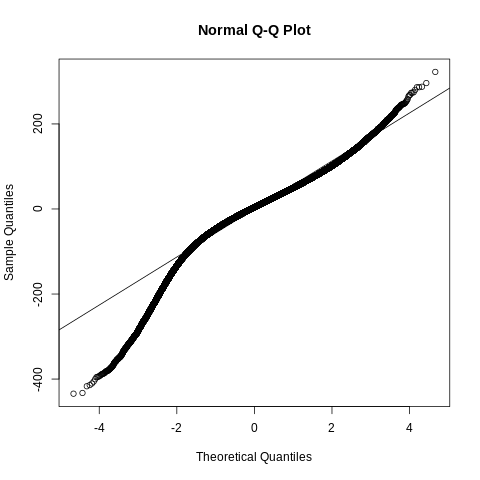

In [ ]:
%%R
qqnorm(residuals(fit.1a))
abline(0,sd(residuals(fit.1a)))

In [ ]:
%%R
confint(fit.1a)

                            2.5 %      97.5 %    Estimate
(Intercept)           527.5415974 555.6994890 541.6205432
fDimCat3               28.7504632  30.6388314  29.6946473
fDimCat4               32.5548942  34.4952612  33.5250777
fDimCat5               22.4727722  24.7641665  23.6184694
fDimCat6               13.2613745  16.2134606  14.7374176
fLactationNumberCat2    8.4567744  13.0457656  10.7512700
fLactationNumberCat3    7.4719773  15.9695335  11.7207554
fLactationNumberCat4   17.3024944  29.7377745  23.5201344
fLactationNumberCat5   29.5210732  45.9636824  37.7423778
fLactationNumberCat6   42.3512345  62.9935182  52.6723763
fLactationNumberCat7   44.4222076  69.3031982  56.8627029
fLactationNumberCat8   50.4904591  80.3468883  65.4186737
fThiMeanCat0            1.6702663   8.2118633   4.9410648
fThiMeanCat2           -4.1720297  -2.6678557  -3.4199427
fThiMeanCat3           -4.0065425  -2.2921219  -3.1493322
fThiMeanCat4           -1.1948776   0.8223442  -0.1862667
fThiMeanCat5  

In [ ]:
%%R
rm(fit.1a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2422845  129.4    6361986  339.8   5117192  273.3
Vcells 188196903 1435.9  338258512 2580.8 281726334 2149.5


In [ ]:
%%R
##CMS 
fit.1b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model1b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMeanCMS.R'
save(fit.1b, file= url_model1b)
summary(fit.1b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7039568  7040023 -3519744  7039488   639331 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.108e+04 105.2668       
              Day         1.272e-02   0.1128 -0.76 
 Residual                 3.472e+03  58.9256       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.732781   5.239775  109.30  < 2e-16 ***
fDimCat3              16.040415   0.347757   46.13  < 2e-16 ***
fDimCat4              21.150017   0.347412   60.88  < 2e-16 ***
fDimCat5              14.201880   0.391001   36.32  < 2e-16 ***
fDimCat6      

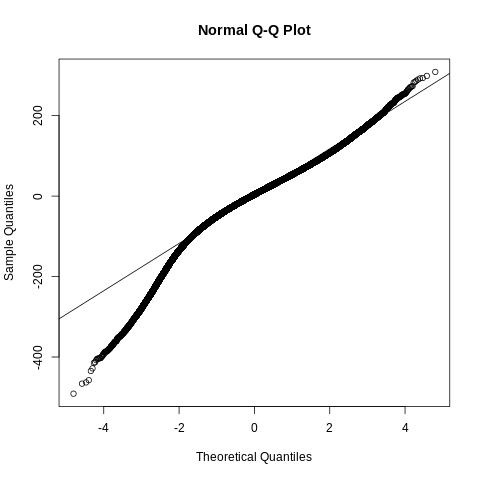

In [ ]:
%%R
qqnorm(residuals(fit.1b))
abline(0,sd(residuals(fit.1b)))

In [ ]:
%%R
confint(fit.1b)

                           2.5 %       97.5 %     Estimate
(Intercept)          562.4630100 583.00255155 572.73278075
fDimCat3              15.3588238  16.72200619  16.04041497
fDimCat4              20.4691011  21.83093208  21.15001661
fDimCat5              13.4355326  14.96822804  14.20188034
fDimCat6               5.4370576   7.31743327   6.37724545
fLactationNumberCat2  -6.1389414  -3.42998318  -4.78446227
fLactationNumberCat3  -8.4623642  -3.50322140  -5.98279280
fLactationNumberCat4  -7.4661962  -0.24881904  -3.85750764
fLactationNumberCat5  -5.9436964   3.62261510  -1.16054064
fLactationNumberCat6  -6.0023346   6.23710929   0.11738736
fLactationNumberCat7   2.3718769  17.67365190  10.02276442
fLactationNumberCat8   5.5085080  24.51761467  15.01306131
fThiMeanCat0          -5.9359430  -3.32232970  -4.62913634
fThiMeanCat2          -1.7175095  -0.61958294  -1.16854620
fThiMeanCat3          -0.6401735   0.65009068   0.00495858
fThiMeanCat4           0.4702312   1.91370280   1.191967

In [ ]:
%%R
rm(fit.1b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740886  146.4    6361986  339.8   5656710  302.2
Vcells 204128967 1557.4  405990214 3097.5 337654175 2576.1


In [ ]:
%%R
##DRY 
fit.1c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model1c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMeanDRY.R'
save(fit.1c, file= url_model1c)
summary(fit.1c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMeanCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813610.9  813968.4 -406766.5  813532.9     70722 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.984e+03 89.3532        
              Day         1.194e-02  0.1093  -0.80 
 Residual                 5.121e+03 71.5604        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           558.5371     4.9874  111.99  < 2e-16 ***
fLactationNumberCat2   35.0520     1.7727   19.77  < 2e-16 ***
fLactationNumberCat3    8.9487     2.4022    3.73 0.000195 ***
fLactationNumberCat4   -8.9139     2.9002   -3.07 0.002115 ** 
fLactationNumberCat5

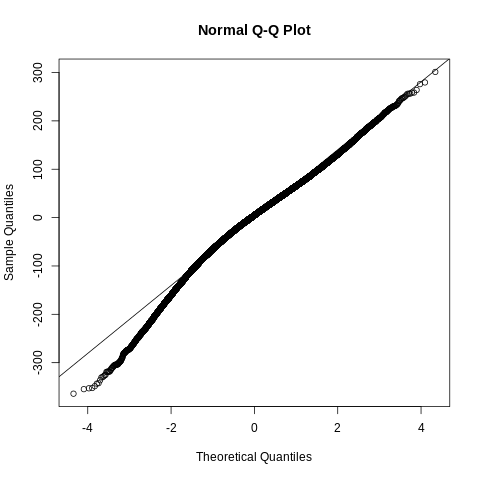

In [ ]:
%%R
qqnorm(residuals(fit.1c))
abline(0,sd(residuals(fit.1c)))

In [ ]:
%%R
confint(fit.1c)

                            2.5 %      97.5 %     Estimate
(Intercept)           548.7619599 568.3121983  558.5370791
fLactationNumberCat2   31.5775386  38.5264841   35.0520114
fLactationNumberCat3    4.2404770  13.6568324    8.9486547
fLactationNumberCat4  -14.5981825  -3.2296001   -8.9138913
fLactationNumberCat5  -28.3023335 -14.8086245  -21.5554790
fLactationNumberCat6  -18.9943244  -2.7742096  -10.8842670
fLactationNumberCat7  -27.4811784  -6.1868541  -16.8340163
fLactationNumberCat8  -20.9891104   8.0578825   -6.4656140
fThiMeanCat0            4.2436103  15.4414773    9.8425438
fThiMeanCat2           -7.1013407  -2.8414706   -4.9714057
fThiMeanCat3          -10.1281038  -5.2564608   -7.6922823
fThiMeanCat4          -11.5858705  -6.1149640   -8.8504172
fThiMeanCat5           -9.1159142  -1.5156156   -5.3157649
fThiMeanCat6          -14.3632395  -3.2280169   -8.7956282
fYear2018              -4.5942114   1.5868389   -1.5036862
fYear2019             -25.7910250 -15.8797218  -20.83537

In [ ]:
%%R
rm(fit.1c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2172431  116.1    6361986  339.8   5656710  302.2
Vcells 176797876 1348.9  405990214 3097.5 337654175 2576.1


## Model THI max

In [ ]:
%%R
##AMS
fit.2a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model2a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMaxAMS.R'
save(fit.2a, file= url_model2a)
summary(fit.2a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514495  3514901 -1757210  3514419   321456 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.015e+04 141.9507       
              Day         2.330e-02   0.1526 -0.81 
 Residual                 3.201e+03  56.5796       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          542.1966     7.1907   75.40  < 2e-16 ***
fDimCat3              29.7225     0.4818   61.69  < 2e-16 ***
fDimCat4              33.5286     0.4951   67.73  < 2e-16 ***
fDimCat5              23.6356     0.5847   40.43  < 2e-16 ***
fDimCat6              14.77

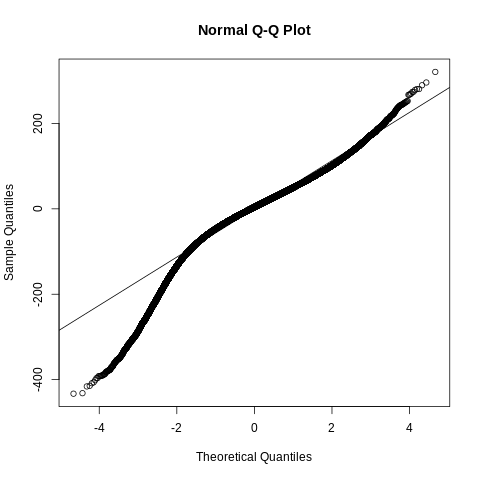

In [ ]:
%%R
qqnorm(residuals(fit.2a))
abline(0,sd(residuals(fit.2a)))

In [ ]:
%%R
confint(fit.2a)

                             2.5 %      97.5 %    Estimate
(Intercept)           528.10304207 556.2902380 542.1966400
fDimCat3               28.77826139  30.6667656  29.7225135
fDimCat4               32.55830447  34.4988954  33.5285999
fDimCat5               22.48968603  24.7815202  23.6356031
fDimCat6               13.29763653  16.2505895  14.7741130
fLactationNumberCat2    8.60266877  13.1930049  10.8978368
fLactationNumberCat3    7.65563395  16.1559157  11.9057748
fLactationNumberCat4   17.46799340  29.9073078  23.6876506
fLactationNumberCat5   29.65312066  46.1008144  37.8769675
fLactationNumberCat6   42.38507735  63.0334695  52.7092734
fLactationNumberCat7   44.47808071  69.3659516  56.9220162
fLactationNumberCat8   50.40268489  80.2665640  65.3346245
fThiMaxCat0            -2.65027820  19.9919928   8.6708573
fThiMaxCat2            -3.77760456  -2.1574276  -2.9675161
fThiMaxCat3            -5.13483261  -3.3290808  -4.2319567
fThiMaxCat4            -5.38318014  -3.4681833  -4.42568

In [ ]:
%%R
rm(fit.2a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423332  129.5    6361986  339.8   5656710  302.2
Vcells 188202207 1435.9  405990214 3097.5 337654175 2576.1


In [ ]:
%%R
##CMS 
fit.2b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model2b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMaxCMS.R'
save(fit.2b, file= url_model2b)
summary(fit.2b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7039118  7039572 -3519519  7039038   639331 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.091e+04 104.4522       
              Day         1.259e-02   0.1122 -0.76 
 Residual                 3.470e+03  58.9058       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.91023    5.21309  109.90  < 2e-16 ***
fDimCat3              16.06109    0.34763   46.20  < 2e-16 ***
fDimCat4              21.15023    0.34717   60.92  < 2e-16 ***
fDimCat5              14.23934    0.39051   36.46  < 2e-16 ***
fDimCat6            

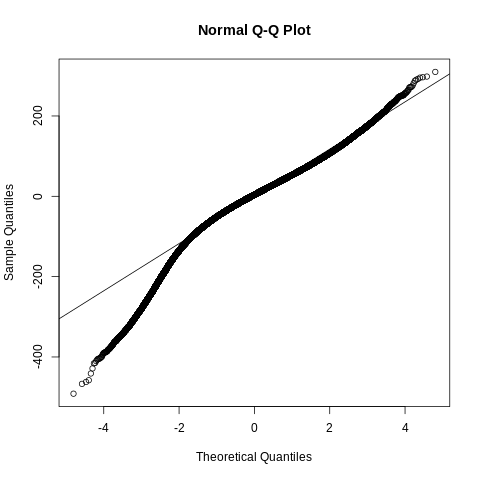

In [ ]:
%%R
qqnorm(residuals(fit.2b))
abline(0,sd(residuals(fit.2b)))

In [ ]:
%%R
confint(fit.2b)

                           2.5 %       97.5 %     Estimate
(Intercept)          562.6927531 583.12770150 572.91022731
fDimCat3              15.3797523  16.74241777  16.06108503
fDimCat4              20.4697888  21.83067278  21.15023081
fDimCat5              13.4739486  15.00472853  14.23933857
fDimCat6               5.5003926   7.37753279   6.43896270
fLactationNumberCat2  -5.9511830  -3.24767368  -4.59942834
fLactationNumberCat3  -8.1382768  -3.19023788  -5.66425732
fLactationNumberCat4  -7.0504764   0.15024842  -3.45011398
fLactationNumberCat5  -5.4815665   4.06254152  -0.70951247
fLactationNumberCat6  -5.5121565   6.69987859   0.59386104
fLactationNumberCat7   2.8422075  18.11242238  10.47731496
fLactationNumberCat8   5.8601018  24.83461082  15.34735629
fThiMaxCat0            3.0848831  10.00379451   6.54433883
fThiMaxCat2           -1.2749477  -0.09586736  -0.68540754
fThiMaxCat3           -3.3654796  -2.03527732  -2.70037848
fThiMaxCat4           -8.2856619  -6.88656093  -7.586111

In [ ]:
%%R
rm(fit.2b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741365  146.5    6361986  339.8   5656710  302.2
Vcells 204134245 1557.5  405990214 3097.5 390368781 2978.3


In [ ]:
%%R
##DRY 
fit.2c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model2c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMaxDRY.R'
save(fit.2c, file= url_model2c)
summary(fit.2c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMaxCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813481.4  813838.9 -406701.7  813403.4     70722 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.922e+03 89.0065        
              Day         1.186e-02  0.1089  -0.80 
 Residual                 5.112e+03 71.5007        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           560.4384     4.9675  112.82  < 2e-16 ***
fLactationNumberCat2   34.9671     1.7689   19.77  < 2e-16 ***
fLactationNumberCat3    8.9419     2.3965    3.73 0.000191 ***
fLactationNumberCat4   -8.9120     2.8933   -3.08 0.002069 ** 
fLactationNumberCat5 

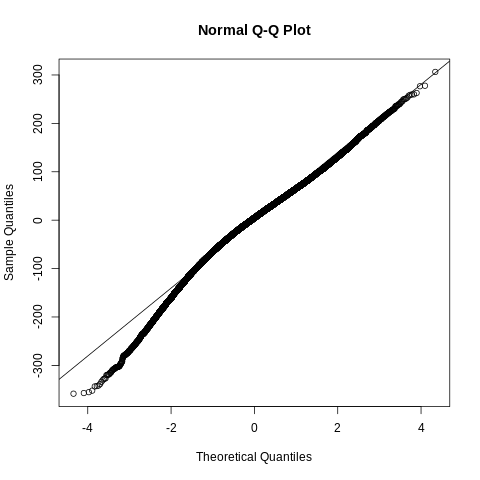

In [ ]:
%%R
qqnorm(residuals(fit.2c))
abline(0,sd(residuals(fit.2c)))

In [ ]:
%%R
confint(fit.2c)

                           2.5 %      97.5 %     Estimate
(Intercept)           550.702337 570.1744009  560.4383689
fLactationNumberCat2   31.500179  38.4340223   34.9671006
fLactationNumberCat3    4.244714  13.6390031    8.9418588
fLactationNumberCat4  -14.582850  -3.2411533   -8.9120016
fLactationNumberCat5  -28.208795 -14.7466282  -21.4777115
fLactationNumberCat6  -18.987429  -2.8025254  -10.8949771
fLactationNumberCat7  -27.441050  -6.1889713  -16.8150105
fLactationNumberCat8  -21.089804   7.8992752   -6.5952646
fThiMaxCat0            15.830072  46.3287622   31.0794172
fThiMaxCat2           -12.156323  -7.4935693   -9.8249461
fThiMaxCat3           -15.178124  -9.9154989  -12.5468112
fThiMaxCat4           -18.693474 -13.0950967  -15.8942856
fThiMaxCat5           -21.730482 -15.8759006  -18.8031912
fThiMaxCat6           -21.916144 -15.5095849  -18.7128646
fYear2018              -4.253073   1.9151989   -1.1689371
fYear2019             -25.844391 -15.9636308  -20.9040110
fYear2020     

In [ ]:
%%R
rm(fit.2c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2172908  116.1    6361986  339.8   5656710  302.2
Vcells 176803146 1349.0  405990214 3097.5 390368781 2978.3


## Model THI min

In [ ]:
%%R
##AMS
fit.3a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model3a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIminAMS.R'
save(fit.3a, file= url_model3a)
summary(fit.3a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514454  3514860 -1757189  3514378   321456 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.016e+04 141.9998       
              Day         2.321e-02   0.1524 -0.81 
 Residual                 3.201e+03  56.5765       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          541.5422     7.1857   75.36  < 2e-16 ***
fDimCat3              29.6705     0.4817   61.59  < 2e-16 ***
fDimCat4              33.5183     0.4950   67.72  < 2e-16 ***
fDimCat5              23.6079     0.5844   40.40  < 2e-16 ***
fDimCat6              14.71

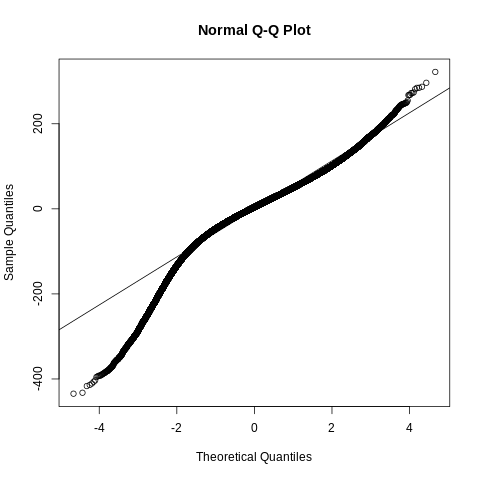

In [ ]:
%%R
qqnorm(residuals(fit.3a))
abline(0,sd(residuals(fit.3a)))

In [ ]:
%%R
confint(fit.3a)

                             2.5 %      97.5 %    Estimate
(Intercept)           527.45837851 555.6259874 541.5421829
fDimCat3               28.72632652  30.6147489  29.6705377
fDimCat4               32.54816577  34.4884126  33.5182892
fDimCat5               22.46247673  24.7533184  23.6078976
fDimCat6               13.23705530  16.1879004  14.7124779
fLactationNumberCat2    8.34505793  12.9332353  10.6391466
fLactationNumberCat3    7.28386932  15.7791520  11.5315107
fLactationNumberCat4   17.06465545  29.4951995  23.2799275
fLactationNumberCat5   29.19450024  45.6296000  37.4120501
fLactationNumberCat6   41.95141978  62.5831679  52.2672938
fLactationNumberCat7   44.00467088  68.8725476  56.4386092
fLactationNumberCat8   50.07393790  79.9149990  64.9944684
fThiMinCat0            -1.81268279   0.3625675  -0.7250576
fThiMinCat2            -2.91305640  -1.5248995  -2.2189780
fThiMinCat3            -4.50782699  -2.9037631  -3.7057950
fThiMinCat4            -2.76614911  -0.9936308  -1.87988

In [ ]:
%%R
rm(fit.3a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423048  129.5    6361986  339.8   5656710  302.2
Vcells 188198499 1435.9  405990214 3097.5 390368781 2978.3


In [ ]:
%%R
##CMS 
fit.3b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model3b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMinCMS.R'
save(fit.3b, file= url_model3b)
summary(fit.3b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7040140  7040595 -3520030  7040060   639331 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.114e+04 105.527        
              Day         1.276e-02   0.113  -0.76 
 Residual                 3.475e+03  58.952        
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.48e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.3598     5.2523  108.97  < 2e-16 ***
fDimCat3              16.0332     0.3479   46.08  < 2e-16 ***
fDimCat4              21.1597     0.3476   60.88  < 2e-16 ***
fDimCat5              14.2368     0.3912   36.39  < 2e-16 ***
fDimCat6               6.

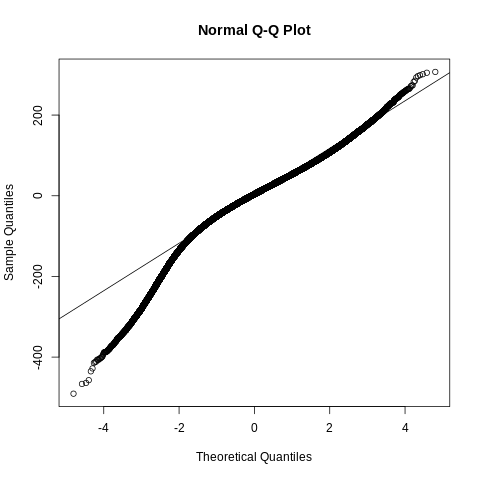

In [ ]:
%%R
qqnorm(residuals(fit.3b))
abline(0,sd(residuals(fit.3b)))

In [ ]:
%%R
confint(fit.3b)

                           2.5 %       97.5 %    Estimate
(Intercept)          562.0655105 582.65413706 572.3598238
fDimCat3              15.3513086  16.71508786  16.0331982
fDimCat4              20.4784057  21.84091093  21.1596583
fDimCat5              13.4700136  15.00366652  14.2368400
fDimCat6               5.5059644   7.38779758   6.4468810
fLactationNumberCat2  -6.0161430  -3.30465975  -4.6604014
fLactationNumberCat3  -8.2136547  -3.24955604  -5.7316054
fLactationNumberCat4  -7.1315237   0.09290052  -3.5193116
fLactationNumberCat5  -5.5426973   4.03294309  -0.7548771
fLactationNumberCat6  -5.5483713   6.70277551   0.5772021
fLactationNumberCat7   2.9095235  18.22539876  10.5674611
fLactationNumberCat8   6.0707300  25.09632368  15.5835268
fThiMinCat0            1.5623774   2.76486162   2.1636195
fThiMinCat2            0.2333295   1.23541832   0.7343739
fThiMinCat3            1.8259376   2.96588355   2.3959106
fThiMinCat4            2.7800478   4.05218329   3.4161156
fThiMinCat5   

In [ ]:
%%R
rm(fit.3b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741089  146.4    6361986  339.8   5656710  302.2
Vcells 204130563 1557.4  405990214 3097.5 390368781 2978.3


In [ ]:
%%R
##DRY 
fit.3c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model3c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMinDRY.R'
save(fit.3c, file= url_model3c)
summary(fit.3c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMinCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813537.1  813894.6 -406729.6  813459.1     70722 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.967e+03 89.2574        
              Day         1.193e-02  0.1092  -0.80 
 Residual                 5.116e+03 71.5233        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          556.4117     4.9870  111.57  < 2e-16 ***
fLactationNumberCat2  35.3918     1.7723   19.97  < 2e-16 ***
fLactationNumberCat3   9.2805     2.4011    3.87 0.000111 ***
fLactationNumberCat4  -8.5689     2.8989   -2.96 0.003118 ** 
fLactationNumberCat5 -21.2

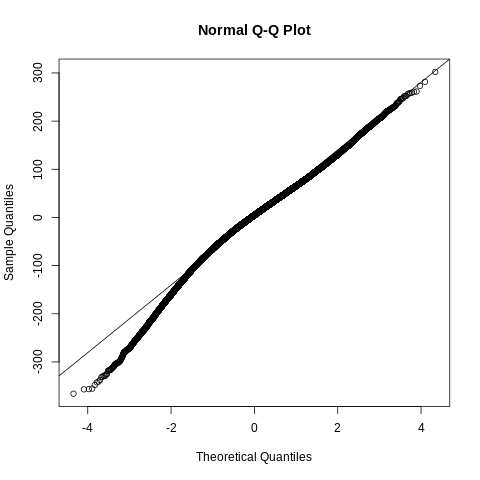

In [ ]:
%%R
qqnorm(residuals(fit.3c))
abline(0,sd(residuals(fit.3c)))

In [ ]:
%%R
confint(fit.3c)

                            2.5 %      97.5 %    Estimate
(Intercept)           546.6373080 566.1860133 556.4116606
fLactationNumberCat2   31.9182272  38.8653343  35.3917808
fLactationNumberCat3    4.5744724  13.9864691   9.2804707
fLactationNumberCat4  -14.2506206  -2.8871288  -8.5688747
fLactationNumberCat5  -27.9563320 -14.4691222 -21.2127271
fLactationNumberCat6  -18.8484543  -2.6365590 -10.7425066
fLactationNumberCat7  -27.3710067  -6.0878910 -16.7294488
fLactationNumberCat8  -20.8113728   8.2224830  -6.2944449
fThiMinCat0             9.5998505  14.8510567  12.2254536
fThiMinCat2            -8.0420323  -4.2193447  -6.1306885
fThiMinCat3            -6.3597196  -2.1042295  -4.2319746
fThiMinCat4            -5.8088276  -1.1193099  -3.4640687
fThiMinCat5           -10.6833710  -4.4349873  -7.5591792
fThiMinCat6            -9.1446258   1.4846534  -3.8299862
fYear2018              -4.9986599   1.1707268  -1.9139666
fYear2019             -25.5793156 -15.6735185 -20.6264171
fYear2020     

In [ ]:
%%R
rm(fit.3c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2172634  116.1    6361986  339.8   5656710  302.2
Vcells 176799472 1348.9  405990214 3097.5 390368781 2978.3


## Model THI mean 1 day before

In [ ]:
%%R
##AMS
fit.4a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model4a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMean1daybeforeAMS.R'
save(fit.4a, file= url_model4a)
summary(fit.4a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514550  3514956 -1757237  3514474   321456 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.032e+04 142.5394       
              Day         2.342e-02   0.1531 -0.81 
 Residual                 3.202e+03  56.5843       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            539.58470    7.21348   74.80  < 2e-16 ***
fDimCat3                29.70466    0.48182   61.65  < 2e-16 ***
fDimCat4                33.50155    0.49507   67.67  < 2e-16 ***
fDimCat5                23.56588    0.58458   40.31  < 2e-16 ***
f

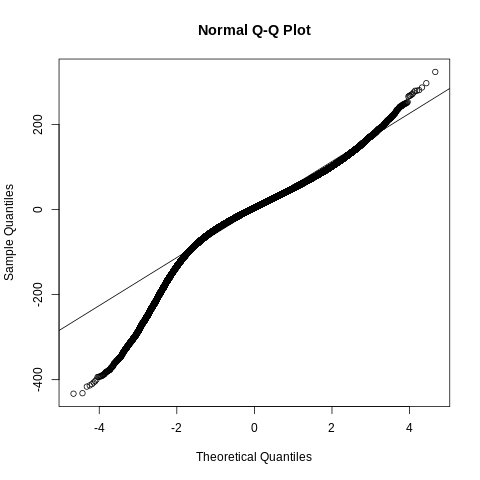

In [ ]:
%%R
qqnorm(residuals(fit.4a))
abline(0,sd(residuals(fit.4a)))

In [ ]:
%%R
confint(fit.4a)

                               2.5 %      97.5 %    Estimate
(Intercept)             525.44654002 553.7228582 539.5846991
fDimCat3                 28.76031592  30.6490064  29.7046612
fDimCat4                 32.53122836  34.4718650  33.5015467
fDimCat5                 22.42012303  24.7116294  23.5658762
fDimCat6                 13.16291217  16.1149019  14.6389070
fLactationNumberCat2      8.33662976  12.9261670  10.6313984
fLactationNumberCat3      7.14863471  15.6465143  11.3975745
fLactationNumberCat4     16.76255548  29.1971702  22.9798628
fLactationNumberCat5     28.78285126  45.2232733  37.0030623
fLactationNumberCat6     41.39961358  62.0376187  51.7186161
fLactationNumberCat7     43.28792657  68.1629750  55.7254508
fLactationNumberCat8     49.16664738  79.0154873  64.0910673
fThiMean1daybeforeCat0   -0.43762862   6.0746805   2.8185260
fThiMean1daybeforeCat2   -1.66554424  -0.1663366  -0.9159404
fThiMean1daybeforeCat3   -0.15028503   1.5759919   0.7128534
fThiMean1daybeforeCat4  

In [ ]:
%%R
rm(fit.4a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423535  129.5    6361986  339.8   5656710  302.2
Vcells 188203816 1435.9  405990214 3097.5 390368781 2978.3


In [ ]:
%%R
##CMS 
fit.4b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model4b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelThiMean1daybeforeCMS.R'
save(fit.4b, file= url_model4b)
summary(fit.4b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7037597  7038052 -3518758  7037517   639212 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.111e+04 105.4158       
              Day         1.274e-02   0.1129 -0.76 
 Residual                 3.469e+03  58.8949       
Number of obs: 639252, groups:  AnimalEartag, 1275

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            571.66525    5.24720  108.95  < 2e-16 ***
fDimCat3                16.08847    0.34761   46.28  < 2e-16 ***
fDimCat4                21.18655    0.34728   61.01  < 2e-16 ***
fDimCat5                14.25201    0.39088   36.46  < 2e-16 ***

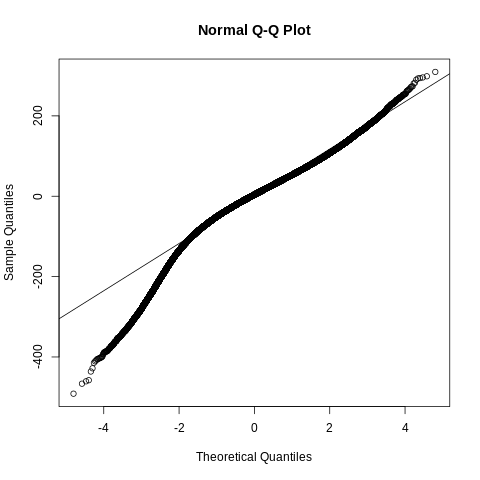

In [ ]:
%%R
qqnorm(residuals(fit.4b))
abline(0,sd(residuals(fit.4b)))

In [ ]:
%%R
confint(fit.4b)

                              2.5 %      97.5 %     Estimate
(Intercept)            561.38091683 581.9495801 571.66524844
fDimCat3                15.40717128  16.7697611  16.08846618
fDimCat4                20.50589786  21.8672119  21.18655488
fDimCat5                13.48589760  15.0181221  14.25200986
fDimCat6                 5.47157263   7.3514894   6.41153103
fLactationNumberCat2    -6.08334784  -3.3746854  -4.72901660
fLactationNumberCat3    -8.40878936  -3.4502003  -5.92949483
fLactationNumberCat4    -7.44358406  -0.2270087  -3.83529636
fLactationNumberCat5    -6.01023428   3.5548914  -1.22767146
fLactationNumberCat6    -6.16155919   6.0762916  -0.04263379
fLactationNumberCat7     2.10140699  17.4002957   9.75085135
fLactationNumberCat8     4.96872689  23.9731262  14.47092656
fThiMean1daybeforeCat0   2.06242048   4.6860840   3.37425224
fThiMean1daybeforeCat2   0.05971401   1.1567842   0.60824911
fThiMean1daybeforeCat3   3.15033856   4.4495828   3.79996068
fThiMean1daybeforeCat4  

In [ ]:
%%R
rm(fit.4b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741452  146.5    6361986  339.8   5656710  302.2
Vcells 204449947 1559.9  405990214 3097.5 391515986 2987.1


In [ ]:
%%R
##DRY 
fit.4c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model4c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMean1daybeforeDRY.R'
save(fit.4c, file= url_model4c)
summary(fit.4c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMean1daybeforeCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813529.6  813887.1 -406725.8  813451.6     70713 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.991e+03 89.3906        
              Day         1.193e-02  0.1092  -0.80 
 Residual                 5.123e+03 71.5732        
Number of obs: 70752, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             558.9601     4.9871  112.08  < 2e-16 ***
fLactationNumberCat2     34.9043     1.7730   19.69  < 2e-16 ***
fLactationNumberCat3      8.7600     2.4023    3.65 0.000266 ***
fLactationNumberCat4     -9.1016     2.9002   -3.14 0.001699 ** 


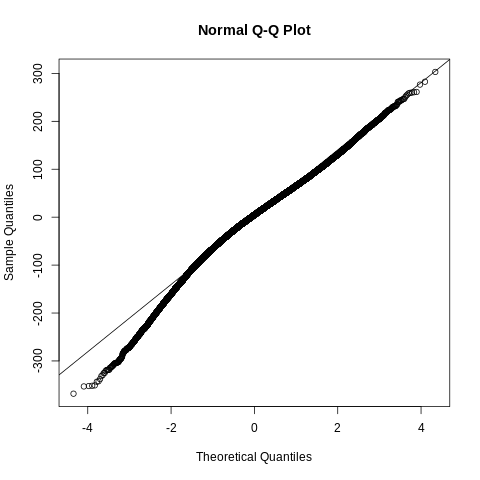

In [ ]:
%%R
qqnorm(residuals(fit.4c))
abline(0,sd(residuals(fit.4c)))

In [ ]:
%%R
confint(fit.4c)

                              2.5 %      97.5 %     Estimate
(Intercept)             549.1855039 568.7347702  558.9601371
fLactationNumberCat2     31.4293917  38.3792554   34.9043236
fLactationNumberCat3      4.0515104  13.4685436    8.7600270
fLactationNumberCat4    -14.7858197  -3.4173338   -9.1015768
fLactationNumberCat5    -28.4771055 -14.9852723  -21.7311889
fLactationNumberCat6    -19.2202923  -3.0035436  -11.1119179
fLactationNumberCat7    -27.7043125  -6.4155641  -17.0599383
fLactationNumberCat8    -21.3058885   7.7321100   -6.7868892
fThiMean1daybeforeCat0    1.5102713  12.6632721    7.0867717
fThiMean1daybeforeCat2   -5.8185761  -1.5486732   -3.6836246
fThiMean1daybeforeCat3   -7.5754690  -2.6602763   -5.1178726
fThiMean1daybeforeCat4   -7.1233423  -1.6218086   -4.3725754
fThiMean1daybeforeCat5   -3.6398010   3.9673336    0.1637663
fThiMean1daybeforeCat6   -6.5534203   4.7001973   -0.9266115
fYear2018                -4.8830191   1.2977302   -1.7926445
fYear2019               

In [ ]:
%%R
rm(fit.4c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2172504  116.1    6361986  339.8   5656710  302.2
Vcells 176832529 1349.2  405990214 3097.5 391515986 2987.1


##Model THI mean 2 days before

In [ ]:
%%R
##AMS
fit.5a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model5a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMean2daysbeforeAMS.R'
save(fit.5a, file= url_model5a)
summary(fit.5a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514540  3514946 -1757232  3514464   321456 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.024e+04 142.2754       
              Day         2.336e-02   0.1528 -0.81 
 Residual                 3.202e+03  56.5836       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             540.5098     7.2002   75.07  < 2e-16 ***
fDimCat3                 29.6868     0.4818   61.62  < 2e-16 ***
fDimCat4                 33.4916     0.4951   67.65  < 2e-16 ***
fDimCat5                 23.5603     0.5846   40.30  < 2e-16 ***


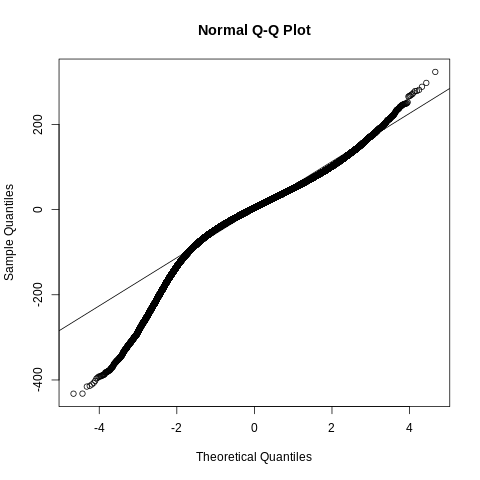

In [ ]:
%%R
qqnorm(residuals(fit.5a))
abline(0,sd(residuals(fit.5a)))

In [ ]:
%%R
confint(fit.5a)

                                2.5 %      97.5 %    Estimate
(Intercept)              526.39762061 554.6220313 540.5098260
fDimCat3                  28.74244068  30.6311042  29.6867725
fDimCat4                  32.52128985  34.4619113  33.4916006
fDimCat5                  22.41455233  24.7060942  23.5603233
fDimCat6                  13.16500438  16.1171382  14.6410713
fLactationNumberCat2       8.32363554  12.9132585  10.6184470
fLactationNumberCat3       7.15743293  15.6555570  11.4064950
fLactationNumberCat4      16.83275100  29.2678846  23.0503178
fLactationNumberCat5      28.92068945  45.3620296  37.1413595
fLactationNumberCat6      41.64772044  62.2871363  51.9674284
fLactationNumberCat7      43.60715009  68.4840462  56.0455981
fLactationNumberCat8      49.61971204  79.4707171  64.5452145
fThiMean2daysbeforeCat0   -4.33151808   2.1712199  -1.0801491
fThiMean2daysbeforeCat2   -1.65837377  -0.1657954  -0.9120846
fThiMean2daysbeforeCat3   -1.32905198   0.3994959  -0.4647780
fThiMean

In [ ]:
%%R
rm(fit.5a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423421  129.5    6361986  339.8   5656710  302.2
Vcells 188201917 1435.9  405990214 3097.5 391515986 2987.1


In [ ]:
%%R
##CMS 
fit.5b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model5b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelThiMean2daysbeforeCMS.R'
save(fit.5b, file= url_model5b)
summary(fit.5b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7036657  7037112 -3518289  7036577   639094 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.109e+04 105.3100       
              Day         1.273e-02   0.1128 -0.76 
 Residual                 3.471e+03  58.9116       
Number of obs: 639134, groups:  AnimalEartag, 1275

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             572.50730    5.24602  109.13  < 2e-16 ***
fDimCat3                 16.08549    0.34773   46.26  < 2e-16 ***
fDimCat4                 21.18449    0.34738   60.98  < 2e-16 ***
fDimCat5                 14.28000    0.39096   36.53  < 2e-

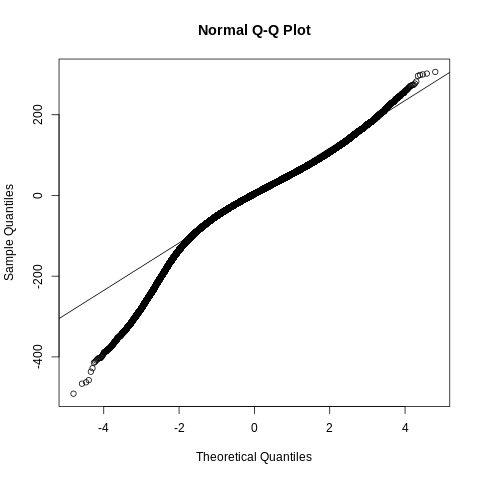

In [ ]:
%%R
qqnorm(residuals(fit.5b))
abline(0,sd(residuals(fit.5b)))

In [ ]:
%%R
confint(fit.5b)

                              2.5 %        97.5 %     Estimate
(Intercept)             562.2252966 582.789311779 572.50730420
fDimCat3                 15.4039556  16.767026062  16.08549085
fDimCat4                 20.5036318  21.865353509  21.18449268
fDimCat5                 13.5137327  15.046274861  14.28000379
fDimCat6                  5.5265879   7.406745880   6.46666689
fLactationNumberCat2     -6.0286023  -3.319679974  -4.67414114
fLactationNumberCat3     -8.2861279  -3.327365057  -5.80674649
fLactationNumberCat4     -7.2233548  -0.006592235  -3.61497351
fLactationNumberCat5     -5.7304167   3.835070978  -0.94767285
fLactationNumberCat6     -5.8212968   6.417286036   0.29799462
fLactationNumberCat7      2.5182347  17.818533035  10.16838388
fLactationNumberCat8      5.4874120  24.494140047  14.99077601
fThiMean2daysbeforeCat0   1.6255865   4.248293743   2.93694013
fThiMean2daysbeforeCat2  -0.2431269   0.849316221   0.30309465
fThiMean2daysbeforeCat3  -0.6213500   0.682272023   0.0

In [ ]:
%%R
rm(fit.5b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741214  146.4    6361986  339.8   5656710  302.2
Vcells 204442329 1559.8  405990214 3097.5 392123677 2991.7


In [ ]:
%%R
##DRY 
fit.5c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model5c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMean2daysbeforeDRY.R'
save(fit.5c, file= url_model5c)
summary(fit.5c)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813368.4  813725.9 -406645.2  813290.4     70702 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.998e+03 89.4303        
              Day         1.194e-02  0.1093  -0.80 
 Residual                 5.120e+03 71.5553        
Number of obs: 70741, groups:  AnimalEartag, 1877

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              558.1975     4.9911  111.84  < 2e-16 ***
fLactationNumberCat2      34.9683     1.7730   19.72  < 2e-16 ***
fLactationNumberCat3       8.8184     2.4027    3.67 0.000242 ***
fLactationNumberCat4      -9.1584     2.9003   -3.16 0.001590

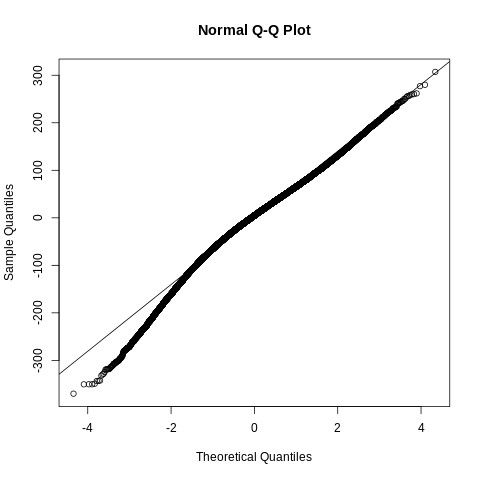

In [ ]:
%%R
qqnorm(residuals(fit.5c))
abline(0,sd(residuals(fit.5c)))

In [ ]:
%%R
confint(fit.5c)

                               2.5 %       97.5 %     Estimate
(Intercept)              548.4151732 567.97979061  558.1974819
fLactationNumberCat2      31.4931890  38.44339776   34.9682934
fLactationNumberCat3       4.1091786  13.52769192    8.8184353
fLactationNumberCat4     -14.8428406  -3.47389498   -9.1583678
fLactationNumberCat5     -28.4285701 -14.93785937  -21.6832147
fLactationNumberCat6     -19.1678571  -2.95333106  -11.0605941
fLactationNumberCat7     -27.6857974  -6.40095248  -17.0433750
fLactationNumberCat8     -21.3100244   7.72260115   -6.7937116
fThiMean2daysbeforeCat0   12.0671997  23.21138724   17.6392935
fThiMean2daysbeforeCat2   -6.6836099  -2.41467036   -4.5491401
fThiMean2daysbeforeCat3   -7.4409003  -2.51907877   -4.9799895
fThiMean2daysbeforeCat4   -3.9584194   1.55034742   -1.2040360
fThiMean2daysbeforeCat5   -5.4760061   2.14084808   -1.6675790
fThiMean2daysbeforeCat6   -5.3790257   5.98053749    0.3007559
fYear2018                 -5.0571302   1.12636783   -1.

In [ ]:
%%R
rm(fit.5c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2172974  116.1    6361986  339.8   5656710  302.2
Vcells 176837251 1349.2  405990214 3097.5 392123677 2991.7


## Model Temp mean

In [ ]:
%%R
##AMS
fit.6a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model6a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMeanAMS.R'
save(fit.6a, file= url_model6a)
summary(fit.6a)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514457  3514863 -1757191  3514381   321456 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.012e+04 141.8441       
              Day         2.321e-02   0.1523 -0.81 
 Residual                 3.201e+03  56.5767       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          542.05024    7.18339   75.46  < 2e-16 ***
fDimCat3              29.70642    0.48175   61.66  < 2e-16 ***
fDimCat4              33.53891    0.49501   67.75  < 2e-16 ***
fDimCat5              23.63261    0.58456   40.43  < 2e-16 ***
fDimCat6             

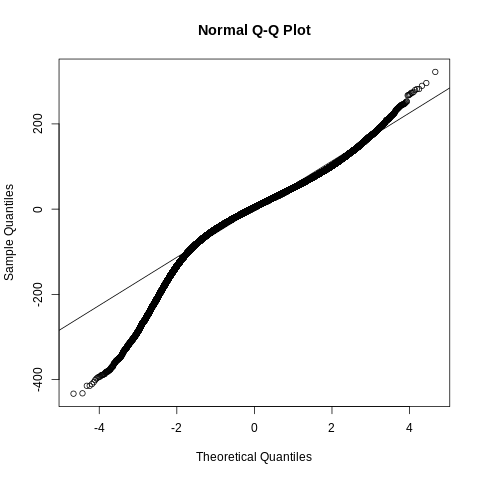

In [ ]:
%%R
qqnorm(residuals(fit.6a))
abline(0,sd(residuals(fit.6a)))

In [ ]:
%%R
confint(fit.6a)

                            2.5 %      97.5 %     Estimate
(Intercept)           527.9710590 556.1294194 542.05023922
fDimCat3               28.7622049  30.6506410  29.70642295
fDimCat4               32.5687077  34.5091121  33.53890991
fDimCat5               22.4868988  24.7783208  23.63260980
fDimCat6               13.2822957  16.2344280  14.75836183
fLactationNumberCat2    8.5524907  13.1420852  10.84728792
fLactationNumberCat3    7.5927508  16.0909425  11.84184668
fLactationNumberCat4   17.4178659  29.8533156  23.63559076
fLactationNumberCat5   29.6337824  46.0761942  37.85498834
fLactationNumberCat6   42.4209337  63.0628319  52.74188280
fLactationNumberCat7   44.5735730  69.4542762  57.01392464
fLactationNumberCat8   50.6714174  80.5280934  65.59975543
fTempMeanCat0          -1.3368666   1.4691701   0.06615174
fTempMeanCat2          -3.4424570  -1.9670080  -2.70473246
fTempMeanCat3          -3.6259292  -1.8595050  -2.74271709
fTempMeanCat4          -3.2161381  -0.8927074  -2.054422

In [ ]:
%%R
rm(fit.6a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423898  129.5    6361986  339.8   5656710  302.2
Vcells 188207191 1436.0  405990214 3097.5 392123677 2991.7


In [ ]:
%%R
##CMS 
fit.6b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model6b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMeanCMS.R'
save(fit.6b, file= url_model6b)
summary(fit.6b)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7039256  7039710 -3519588  7039176   639331 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.105e+04 105.1004       
              Day         1.266e-02   0.1125 -0.76 
 Residual                 3.471e+03  58.9116       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.0814     5.2315  109.35  < 2e-16 ***
fDimCat3              16.0798     0.3477   46.25  < 2e-16 ***
fDimCat4              21.1526     0.3473   60.91  < 2e-16 ***
fDimCat5              14.2295     0.3908   36.42  < 2e-16 ***
fDimCat6               6

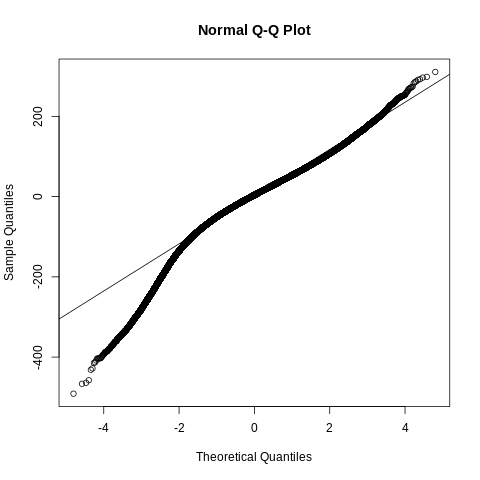

In [ ]:
%%R
qqnorm(residuals(fit.6b))
abline(0,sd(residuals(fit.6b)))

In [ ]:
%%R
confint(fit.6b)

                           2.5 %       97.5 %    Estimate
(Intercept)          561.8278650 582.33492845 572.0813967
fDimCat3              15.3983524  16.76119985  16.0797761
fDimCat4              20.4719795  21.83328406  21.1526318
fDimCat5              13.4636083  14.99532438  14.2294664
fDimCat6               5.4852589   7.36401781   6.4246384
fLactationNumberCat2  -6.0043584  -3.29752237  -4.6509404
fLactationNumberCat3  -8.2706617  -3.31633286  -5.7934973
fLactationNumberCat4  -7.2751812  -0.06583812  -3.6705096
fLactationNumberCat5  -5.8063047   3.74835254  -1.0289761
fLactationNumberCat6  -5.9577784   6.26657773   0.1543997
fLactationNumberCat7   2.2674275  17.55119608   9.9093118
fLactationNumberCat8   5.1298868  24.11923864  14.6245627
fTempMeanCat0          0.8699500   2.48422608   1.6770880
fTempMeanCat2         -1.5298972  -0.47660347  -1.0032503
fTempMeanCat3         -2.0474404  -0.77039254  -1.4089165
fTempMeanCat4          7.8829250   9.49384675   8.6883859
fTempMeanCat5 

In [ ]:
%%R
rm(fit.6b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741190  146.4    6361986  339.8   5656710  302.2
Vcells 204130577 1557.4  405990214 3097.5 392123677 2991.7


In [ ]:
%%R
##DRY 
fit.6c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model6c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMeanDRY.R'
save(fit.6c, file= url_model6c)
summary(fit.6c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMeanCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813489.8  813847.3 -406705.9  813411.8     70722 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.965e+03 89.2453        
              Day         1.192e-02  0.1092  -0.80 
 Residual                 5.112e+03 71.4987        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           555.9049     4.9927  111.34  < 2e-16 ***
fLactationNumberCat2   35.4350     1.7719   20.00  < 2e-16 ***
fLactationNumberCat3    9.2361     2.4008    3.85 0.000119 ***
fLactationNumberCat4   -8.5689     2.8985   -2.96 0.003113 ** 
fLactationNumberCat

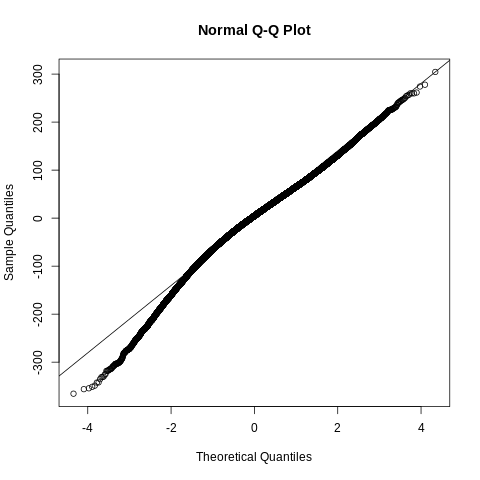

In [ ]:
%%R
qqnorm(residuals(fit.6c))
abline(0,sd(residuals(fit.6c)))

In [ ]:
%%R
confint(fit.6c)

                            2.5 %      97.5 %     Estimate
(Intercept)           546.1193063 565.6904699  555.9048881
fLactationNumberCat2   31.9622011  38.9077718   35.4349865
fLactationNumberCat3    4.5307110  13.9415555    9.2361333
fLactationNumberCat4  -14.2497416  -2.8879878   -8.5688647
fLactationNumberCat5  -27.6757884 -14.1890530  -20.9324207
fLactationNumberCat6  -18.5440353  -2.3330012  -10.4385183
fLactationNumberCat7  -27.2851794  -6.0040261  -16.6446027
fLactationNumberCat8  -21.0899200   7.9383582   -6.5757809
fTempMeanCat0          13.6604867  20.7532953   17.2068910
fTempMeanCat2          -8.8814091  -4.6842127   -6.7828109
fTempMeanCat3         -13.9666113  -8.9831227  -11.4748670
fTempMeanCat4         -14.7054013  -8.4424868  -11.5739441
fTempMeanCat5         -10.6867330  -0.7484804   -5.7176067
fTempMeanCat6         -27.3432882  -8.0357516  -17.6895199
fYear2018              -4.5343362   1.6412288   -1.4465537
fYear2019             -25.3908031 -15.4854295  -20.43811

In [ ]:
%%R
rm(fit.6c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2172734  116.1    6361986  339.8   5656710  302.2
Vcells 176799453 1348.9  405990214 3097.5 392123677 2991.7


## Model Temp max

In [ ]:
%%R
##AMS
fit.7a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model7a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMaxAMS.R'
save(fit.7a, file= url_model7a)
summary(fit.7a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514433  3514838 -1757178  3514357   321456 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.012e+04 141.8478       
              Day         2.325e-02   0.1525 -0.81 
 Residual                 3.201e+03  56.5742       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          542.5252     7.1867   75.49  < 2e-16 ***
fDimCat3              29.7093     0.4817   61.67  < 2e-16 ***
fDimCat4              33.5282     0.4950   67.73  < 2e-16 ***
fDimCat5              23.6504     0.5847   40.45  < 2e-16 ***
fDimCat6              14.8

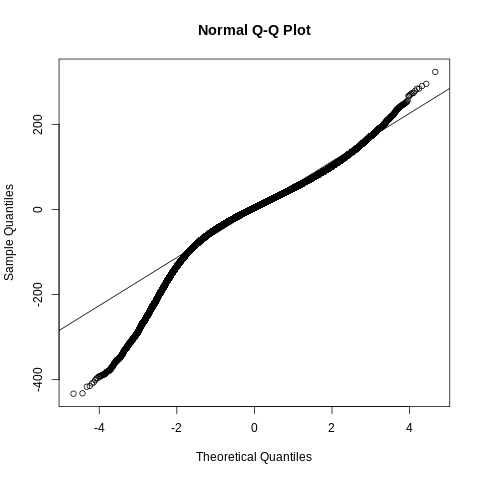

In [ ]:
%%R
qqnorm(residuals(fit.7a))
abline(0,sd(residuals(fit.7a)))

In [ ]:
%%R
confint(fit.7a)

                            2.5 %      97.5 %    Estimate
(Intercept)           528.4395635 556.6108415 542.5252025
fDimCat3               28.7651614  30.6535195  29.7093404
fDimCat4               32.5579428  34.4984701  33.5282064
fDimCat5               22.5044415  24.7964157  23.6504286
fDimCat6               13.3273632  16.2807426  14.8040529
fLactationNumberCat2    8.7024384  13.2937511  10.9980948
fLactationNumberCat3    7.7960149  16.2981932  12.0471041
fLactationNumberCat4   17.6719374  30.1141016  23.8930195
fLactationNumberCat5   29.9306913  46.3824465  38.1565689
fLactationNumberCat6   42.7313263  63.3849706  53.0581484
fLactationNumberCat7   44.9615910  69.8558001  57.4086956
fLactationNumberCat8   50.9997942  80.8706852  65.9352397
fTempMaxCat0            0.1206632   4.8950136   2.5078384
fTempMaxCat2           -3.6785548  -2.2073344  -2.9429446
fTempMaxCat3           -5.3938503  -3.5684602  -4.4811552
fTempMaxCat4           -6.3646928  -4.3762290  -5.3704609
fTempMaxCat5  

In [ ]:
%%R
rm(fit.7a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423635  129.5    6361986  339.8   5656710  302.2
Vcells 188203784 1435.9  405990214 3097.5 392123677 2991.7


In [ ]:
%%R
##CMS 
fit.7b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model7b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMaxCMS.R'
save(fit.7b, file= url_model7b)
summary(fit.7b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7038796  7039250 -3519358  7038716   639331 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.084e+04 104.1280       
              Day         1.253e-02   0.1119 -0.76 
 Residual                 3.468e+03  58.8914       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          573.2287     5.2032  110.17  < 2e-16 ***
fDimCat3              16.0879     0.3475   46.29  < 2e-16 ***
fDimCat4              21.1377     0.3470   60.91  < 2e-16 ***
fDimCat5              14.2448     0.3903   36.50  < 2e-16 ***
fDimCat6               6

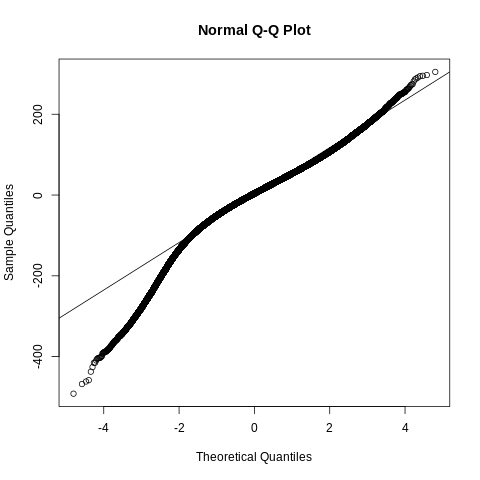

In [ ]:
%%R
qqnorm(residuals(fit.7b))
abline(0,sd(residuals(fit.7b)))

In [ ]:
%%R
confint(fit.7b)

                           2.5 %       97.5 %    Estimate
(Intercept)          563.0305493 583.42679424 573.2286718
fDimCat3              15.4067350  16.76906111  16.0878981
fDimCat4              20.4575483  21.81794078  21.1377446
fDimCat5              13.4798727  15.00980127  14.2448370
fDimCat6               5.5062867   7.38206030   6.4441735
fLactationNumberCat2  -5.9218206  -3.22048487  -4.5711527
fLactationNumberCat3  -8.1063718  -3.16273808  -5.6345550
fLactationNumberCat4  -7.1008324   0.09308068  -3.5038759
fLactationNumberCat5  -5.6689460   3.86584715  -0.9015494
fLactationNumberCat6  -5.8463291   6.35399598   0.2538335
fLactationNumberCat7   2.3392772  17.59566061   9.9674689
fLactationNumberCat8   5.1293770  24.08856592  14.6089715
fTempMaxCat0          -0.1420628   2.46216154   1.1600494
fTempMaxCat2          -3.7876003  -2.71528587  -3.2514431
fTempMaxCat3          -6.4525293  -5.13135299  -5.7919411
fTempMaxCat4         -11.0144583  -9.61121557 -10.3128369
fTempMaxCat5  

In [ ]:
%%R
rm(fit.7b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741668  146.5    6361986  339.8   5656710  302.2
Vcells 204135816 1557.5  405990214 3097.5 392123677 2991.7


In [ ]:
%%R
##DRY 
fit.7c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model7c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMaxDRY.R'
save(fit.7c, file= url_model7c)
summary(fit.7c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMaxCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813459.2  813816.8 -406690.6  813381.2     70722 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.917e+03 88.9780        
              Day         1.183e-02  0.1088  -0.80 
 Residual                 5.111e+03 71.4906        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           560.2716     4.9700  112.73  < 2e-16 ***
fLactationNumberCat2   35.0722     1.7689   19.83  < 2e-16 ***
fLactationNumberCat3    8.9710     2.3962    3.74 0.000181 ***
fLactationNumberCat4   -8.8455     2.8928   -3.06 0.002230 ** 
fLactationNumberCat5

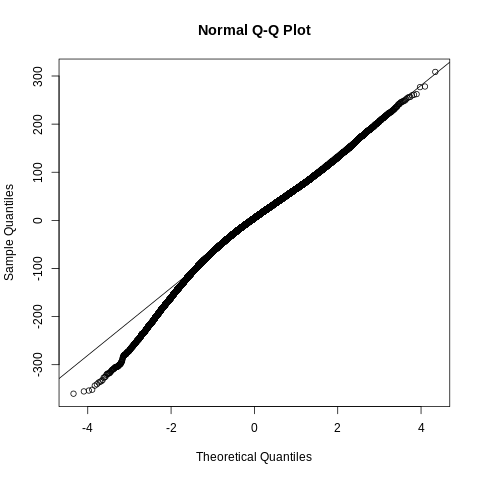

In [ ]:
%%R
qqnorm(residuals(fit.7c))
abline(0,sd(residuals(fit.7c)))

In [ ]:
%%R
confint(fit.7c)

                            2.5 %      97.5 %     Estimate
(Intercept)           550.5305999 570.0126394  560.2716196
fLactationNumberCat2   31.6052009  38.5392337   35.0722173
fLactationNumberCat3    4.2744048  13.6675027    8.9709538
fLactationNumberCat4  -14.5152646  -3.1756639   -8.8454642
fLactationNumberCat5  -28.0606488 -14.6016142  -21.3311315
fLactationNumberCat6  -18.9875261  -2.8076290  -10.8975776
fLactationNumberCat7  -27.4196614  -6.1748046  -16.7972330
fLactationNumberCat8  -21.2102841   7.7672540   -6.7215151
fTempMaxCat0            9.1205362  19.8303679   14.4754521
fTempMaxCat2          -11.3104843  -7.0110438   -9.1607641
fTempMaxCat3          -17.1774066 -11.8481505  -14.5127786
fTempMaxCat4          -21.8145133 -16.1277632  -18.9711383
fTempMaxCat5          -22.3481929 -16.0030236  -19.1756082
fTempMaxCat6          -21.4102779 -13.9515004  -17.6808892
fYear2018              -4.3236039   1.8450104   -1.2392967
fYear2019             -25.3779594 -15.5023651  -20.44016

In [ ]:
%%R
rm(fit.7c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173211  116.1    6361986  339.8   5656710  302.2
Vcells 176804717 1349.0  405990214 3097.5 392123677 2991.7


## Model Temp min

In [ ]:
%%R
##AMS
fit.8a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model8a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMinAMS.R'
save(fit.8a, file= url_model8a)
summary(fit.8a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514480  3514885 -1757202  3514404   321456 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.023e+04 142.2335       
              Day         2.332e-02   0.1527 -0.81 
 Residual                 3.201e+03  56.5784       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          541.4820     7.1967   75.24  < 2e-16 ***
fDimCat3              29.6756     0.4818   61.60  < 2e-16 ***
fDimCat4              33.5027     0.4950   67.68  < 2e-16 ***
fDimCat5              23.5739     0.5846   40.33  < 2e-16 ***
fDimCat6              14.6

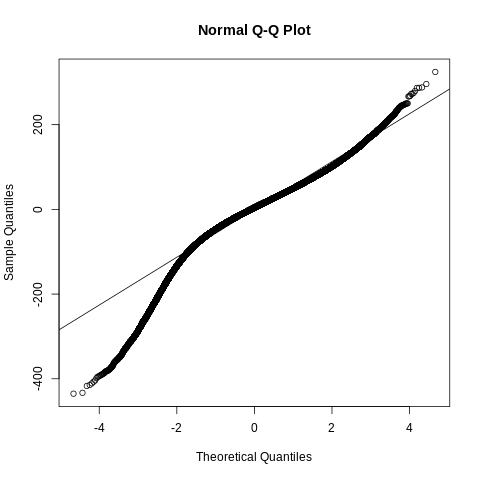

In [ ]:
%%R
qqnorm(residuals(fit.8a))
abline(0,sd(residuals(fit.8a)))

In [ ]:
%%R
confint(fit.8a)

                            2.5 %       97.5 %    Estimate
(Intercept)           527.3767136 555.58728962 541.4820016
fDimCat3               28.7313336  30.61983426  29.6755839
fDimCat4               32.5324654  34.47294454  33.5027050
fDimCat5               22.4282266  24.71962235  23.5739245
fDimCat6               13.2013749  16.15323495  14.6773049
fLactationNumberCat2    8.3396848  12.92945861  10.6345717
fLactationNumberCat3    7.2758100  15.77435373  11.5250819
fLactationNumberCat4   17.0418709  29.47772973  23.2598003
fLactationNumberCat5   29.1786911  45.62122866  37.3999599
fLactationNumberCat6   41.9419125  62.58299473  52.2624536
fLactationNumberCat7   44.0057350  68.88454810  56.4451415
fLactationNumberCat8   50.0989046  79.95244066  65.0256726
fTempMinCat0           -1.9939199  -0.30127330  -1.1475966
fTempMinCat2           -0.9122386   0.33556731  -0.2883357
fTempMinCat3           -4.0012928  -2.47985533  -3.2405741
fTempMinCat4           -4.4616727  -2.62702513  -3.54434

In [ ]:
%%R
rm(fit.8a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424112  129.5    6361986  339.8   5656710  302.2
Vcells 188209048 1436.0  405990214 3097.5 392123677 2991.7


In [ ]:
%%R
##CMS 
fit.8b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model8b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMinCMS.R'
save(fit.8b, file= url_model8b)
summary(fit.8b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7040333  7040787 -3520126  7040253   639331 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.115e+04 105.6172       
              Day         1.278e-02   0.1131 -0.76 
 Residual                 3.476e+03  58.9604       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.48e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.4949     5.2545  108.95  < 2e-16 ***
fDimCat3              16.0318     0.3480   46.07  < 2e-16 ***
fDimCat4              21.1566     0.3477   60.85  < 2e-16 ***
fDimCat5              14.2233     0.3914   36.34  < 2e-16 ***
fDimCat6               6

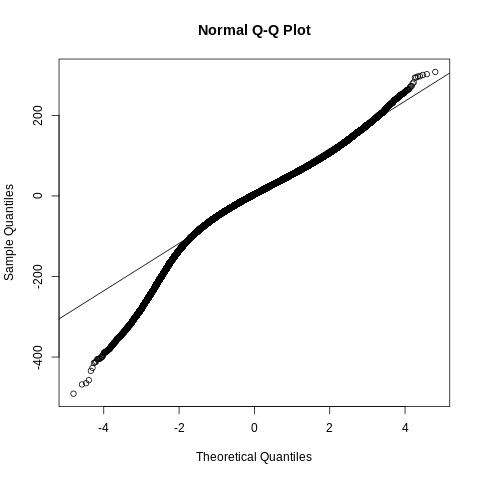

In [ ]:
%%R
qqnorm(residuals(fit.8b))
abline(0,sd(residuals(fit.8b)))

In [ ]:
%%R
confint(fit.8b)

                           2.5 %       97.5 %    Estimate
(Intercept)          562.1962789 582.79358977 572.4949343
fDimCat3              15.3498010  16.71378959  16.0317953
fDimCat4              20.4751779  21.83796510  21.1565715
fDimCat5              13.4562131  14.99032874  14.2232709
fDimCat6               5.4818590   7.36435757   6.4231083
fLactationNumberCat2  -6.0735503  -3.36096395  -4.7172571
fLactationNumberCat3  -8.3096036  -3.34352398  -5.8265638
fLactationNumberCat4  -7.2507259  -0.02330844  -3.6370172
fLactationNumberCat5  -5.6537510   3.92576268  -0.8639942
fLactationNumberCat6  -5.6517265   6.60415472   0.4762141
fLactationNumberCat7   2.8308259  18.15220672  10.4915163
fLactationNumberCat8   6.0459898  25.07760399  15.5617969
fTempMinCat0           0.5929083   1.61922965   1.1060690
fTempMinCat2          -2.0036621  -1.08655955  -1.5451108
fTempMinCat3          -0.1309620   0.96823877   0.4186384
fTempMinCat4           1.0325619   2.32278087   1.6776714
fTempMinCat5  

In [ ]:
%%R
rm(fit.8b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741411  146.5    6361986  339.8   5656710  302.2
Vcells 204132509 1557.5  405990214 3097.5 392123677 2991.7


In [ ]:
%%R
##DRY 
fit.8c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model8c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMinDRY.R'
save(fit.8c, file= url_model8c)
summary(fit.8c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMinCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813503.6  813861.1 -406712.8  813425.6     70722 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7952.7896 89.1784        
              Day            0.0119  0.1091  -0.80 
 Residual                 5113.3804 71.5079        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           556.756      5.007  111.20  < 2e-16 ***
fLactationNumberCat2   35.300      1.771   19.93  < 2e-16 ***
fLactationNumberCat3    9.188      2.399    3.83 0.000129 ***
fLactationNumberCat4   -8.661      2.897   -2.99 0.002792 ** 
fLactationNumberCat5  -21

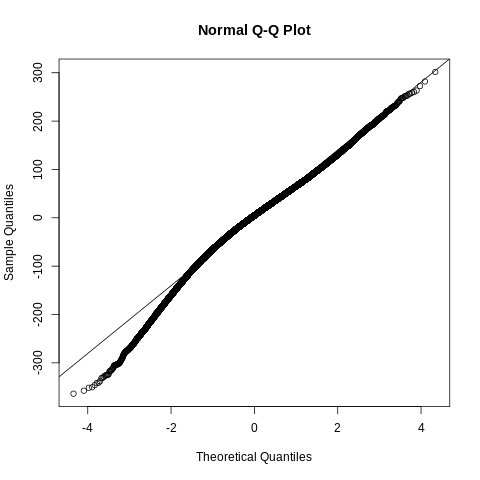

In [ ]:
%%R
qqnorm(residuals(fit.8c))
abline(0,sd(residuals(fit.8c)))

In [ ]:
%%R
confint(fit.8c)

                            2.5 %      97.5 %    Estimate
(Intercept)           546.9426017 566.5695541 556.7560779
fLactationNumberCat2   31.8288404  38.7711963  35.3000183
fLactationNumberCat3    4.4851134  13.8905158   9.1878146
fLactationNumberCat4  -14.3391073  -2.9833328  -8.6612201
fLactationNumberCat5  -28.1065511 -14.6285019 -21.3675265
fLactationNumberCat6  -18.9340458  -2.7316281 -10.8328370
fLactationNumberCat7  -27.2248541  -5.9521593 -16.5885067
fLactationNumberCat8  -20.7609870   8.2579067  -6.2515401
fTempMinCat0            7.0299637  11.3626145   9.1962891
fTempMinCat2           -4.2571337  -0.6546317  -2.4558827
fTempMinCat3          -10.0428847  -5.6945053  -7.8686950
fTempMinCat4          -10.0279774  -5.0049125  -7.5164449
fTempMinCat5          -12.0411702  -4.9256301  -8.4834002
fTempMinCat6          -13.5427566   1.6254574  -5.9586496
fYear2018              -5.0517818   1.1159290  -1.9679264
fYear2019             -25.5546516 -15.6544924 -20.6045720
fYear2020     

In [ ]:
%%R
rm(fit.8c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2172957  116.1    6361986  339.8   5656710  302.2
Vcells 176801422 1348.9  405990214 3097.5 392123677 2991.7


## Model Temp mean 1 day before

In [ ]:
%%R
##AMS
fit.9a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model9a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMean1daybeforeAMS.R'
save(fit.9a, file= url_model9a)
summary(fit.9a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514577  3514982 -1757250  3514501   321456 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.031e+04 142.502        
              Day         2.341e-02   0.153  -0.81 
 Residual                 3.202e+03  56.587        
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             539.2710     7.2422   74.46  < 2e-16 ***
fDimCat3                 29.7036     0.4818   61.65  < 2e-16 ***
fDimCat4                 33.4957     0.4951   67.66  < 2e-16 ***
fDimCat5                 23.5632     0.5846   40.31  < 2e-16 ***


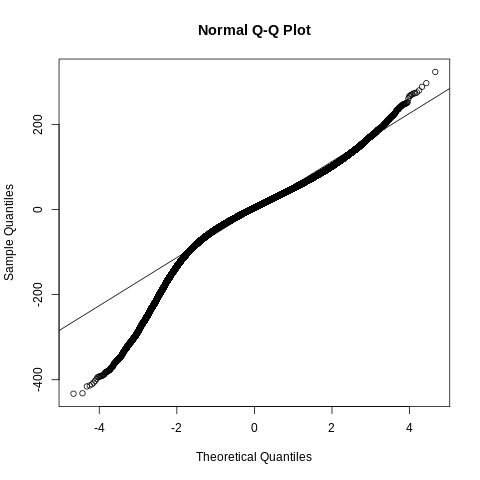

In [ ]:
%%R
qqnorm(residuals(fit.9a))
abline(0,sd(residuals(fit.9a)))

In [ ]:
%%R
confint(fit.9a)

                               2.5 %      97.5 %    Estimate
(Intercept)              525.0764734 553.4655694 539.2710214
fDimCat3                  28.7592488  30.6480198  29.7036343
fDimCat4                  32.5253884  34.4660944  33.4957414
fDimCat5                  22.4174086  24.7090082  23.5632084
fDimCat6                  13.1609742  16.1131066  14.6370404
fLactationNumberCat2       8.3429436  12.9331993  10.6380714
fLactationNumberCat3       7.1551798  15.6539816  11.4045807
fLactationNumberCat4      16.7933619  29.2287538  23.0110578
fLactationNumberCat5      28.8521762  45.2933738  37.0727750
fLactationNumberCat6      41.5214142  62.1605150  51.8409646
fLactationNumberCat7      43.4747365  68.3513467  55.9130416
fLactationNumberCat8      49.4276535  79.2790678  64.3533606
fTempMean1daybeforeCat1   -0.7931090   2.0091098   0.6080004
fTempMean1daybeforeCat2   -1.4727824   1.6916518   0.1094347
fTempMean1daybeforeCat3    0.1315816   3.4404977   1.7860396
fTempMean1daybeforeCat4 

In [ ]:
%%R
rm(fit.9a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423858  129.5    6361986  339.8   5656710  302.2
Vcells 188205775 1435.9  405990214 3097.5 392123677 2991.7


In [ ]:
%%R
##CMS 
fit.9b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model9b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMean1daybeforeCMS.R'
save(fit.9b, file= url_model9b)
summary(fit.9b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7036816  7037271 -3518368  7036736   639212 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.109e+04 105.3058       
              Day         1.269e-02   0.1127 -0.76 
 Residual                 3.464e+03  58.8592       
Number of obs: 639252, groups:  AnimalEartag, 1275

Dispersion estimate for gaussian family (sigma^2): 3.46e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             574.3496     5.2506  109.39  < 2e-16 ***
fDimCat3                 16.1266     0.3474   46.42  < 2e-16 ***
fDimCat4                 21.1851     0.3470   61.04  < 2e-16 ***
fDimCat5                 14.2581     0.3906   36.51  < 2e-16 **

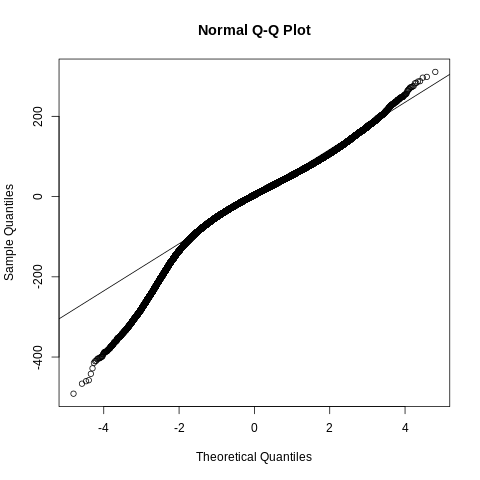

In [ ]:
%%R
qqnorm(residuals(fit.9b))
abline(0,sd(residuals(fit.9b)))

In [ ]:
%%R
confint(fit.9b)

                              2.5 %      97.5 %    Estimate
(Intercept)             564.0585468 584.6406164 574.3495816
fDimCat3                 15.4457638  16.8075346  16.1266492
fDimCat4                 20.5049112  21.8653110  21.1851111
fDimCat5                 13.4925813  15.0235862  14.2580837
fDimCat6                  5.4886076   7.3668355   6.4277215
fLactationNumberCat2     -6.0392470  -3.3326998  -4.6859734
fLactationNumberCat3     -8.3550262  -3.4009513  -5.8779888
fLactationNumberCat4     -7.4214728  -0.2123532  -3.8169130
fLactationNumberCat5     -6.0298323   3.5244730  -1.2526796
fLactationNumberCat6     -6.2569424   5.9667008  -0.1451208
fLactationNumberCat7      1.8607338  17.1421417   9.5014378
fLactationNumberCat8      4.4814432  23.4655903  13.9735167
fTempMean1daybeforeCat1  -3.8242321  -2.2150063  -3.0196192
fTempMean1daybeforeCat2  -4.9501839  -3.0302983  -3.9902411
fTempMean1daybeforeCat3  -1.4633376   0.5866584  -0.4383396
fTempMean1daybeforeCat4   8.3940566  10.

In [ ]:
%%R
rm(fit.9b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741769  146.5    6361986  339.8   5656710  302.2
Vcells 204451902 1559.9  405990214 3097.5 392123677 2991.7


In [ ]:
%%R
##DRY 
fit.9c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model9c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMean1daybeforeDRY.R'
save(fit.9c, file= url_model9c)
summary(fit.9c)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813405.9  813763.4 -406663.9  813327.9     70713 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.967e+03 89.258         
              Day         1.189e-02  0.109   -0.80 
 Residual                 5.114e+03 71.512         
Number of obs: 70752, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              574.217      5.174  110.98  < 2e-16 ***
fLactationNumberCat2      35.266      1.772   19.91  < 2e-16 ***
fLactationNumberCat3       8.987      2.400    3.74 0.000181 ***
fLactationNumberCat4      -8.789      2.897   -3.03 0.002419 ** 


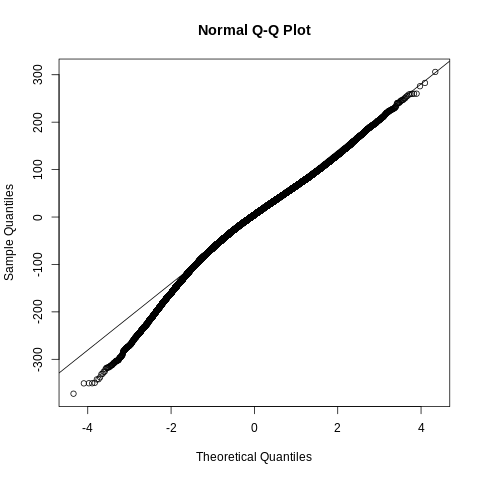

In [ ]:
%%R
qqnorm(residuals(fit.9c))
abline(0,sd(residuals(fit.9c)))

In [ ]:
%%R
confint(fit.9c)

                               2.5 %       97.5 %     Estimate
(Intercept)              564.0758461 584.35757090  574.2167085
fLactationNumberCat2      31.7934187  38.73828523   35.2658520
fLactationNumberCat3       4.2831296  13.69169685    8.9874132
fLactationNumberCat4     -14.4673126  -3.10978325   -8.7885479
fLactationNumberCat5     -27.8672850 -14.38797116  -21.1276281
fLactationNumberCat6     -18.9077626  -2.70745287  -10.8076078
fLactationNumberCat7     -27.8097199  -6.54473771  -17.1772288
fLactationNumberCat8     -21.4677434   7.53710787   -6.9653178
fTempMean1daybeforeCat1  -21.6544058 -14.57941165  -18.1169087
fTempMean1daybeforeCat2  -27.9755723 -19.75151718  -23.8635447
fTempMean1daybeforeCat3  -29.5228297 -20.86201166  -25.1924207
fTempMean1daybeforeCat4  -25.4645076 -16.01886643  -20.7416870
fTempMean1daybeforeCat5  -22.3456392 -10.12595058  -16.2357949
fTempMean1daybeforeCat6  -31.2532100 -10.08926908  -20.6712395
fYear2018                 -5.0515458   1.12189537   -1.

In [ ]:
%%R
rm(fit.9c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173422  116.1    6361986  339.8   5656710  302.2
Vcells 176841674 1349.2  405990214 3097.5 392123677 2991.7


## Model Temp mean 2 days before

In [ ]:
%%R
##AMS
fit.10a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model10a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMean2daysbeforeAMS.R'
save(fit.10a, file= url_model10a)
summary(fit.10a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514588  3514994 -1757256  3514512   321456 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.028e+04 142.4009       
              Day         2.339e-02   0.1529 -0.81 
 Residual                 3.202e+03  56.5877       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              540.5895     7.2049   75.03  < 2e-16 ***
fDimCat3                  29.7133     0.4819   61.67  < 2e-16 ***
fDimCat4                  33.5086     0.4951   67.68  < 2e-16 ***
fDimCat5                  23.5813     0.5847   40.33  < 2e-1

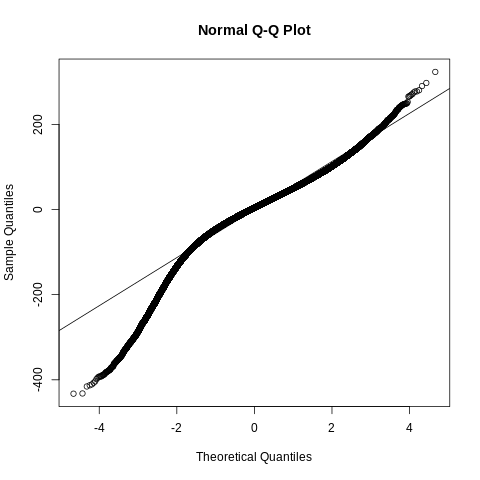

In [ ]:
%%R
qqnorm(residuals(fit.10a))
abline(0,sd(residuals(fit.10a)))

In [ ]:
%%R
confint(fit.10a)

                                2.5 %       97.5 %     Estimate
(Intercept)               526.4681712 554.71084360 540.58950739
fDimCat3                   28.7689013  30.65770448  29.71330289
fDimCat4                   32.5382107  34.47902948  33.50862010
fDimCat5                   22.4353941  24.72725396  23.58132404
fDimCat6                   13.1893561  16.14199901  14.66567754
fLactationNumberCat2        8.3797604  12.97074398  10.67525217
fLactationNumberCat3        7.2542918  15.75468919  11.50449048
fLactationNumberCat4       16.9529132  29.39092482  23.17191901
fLactationNumberCat5       29.0804410  45.52537074  37.30290589
fLactationNumberCat6       41.8220504  62.46605126  52.14405084
fLactationNumberCat7       43.8267367  68.70911748  56.26792707
fLactationNumberCat8       49.8550862  79.71299528  64.78404076
fTempMean2daysbeforeCat0   -2.9694663  -0.16910959  -1.56928794
fTempMean2daysbeforeCat2   -1.3808074   0.08638436  -0.64721153
fTempMean2daysbeforeCat3   -0.8121245   

In [ ]:
%%R
rm(fit.10a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424335  129.5    6361986  339.8   5656710  302.2
Vcells 188211054 1436.0  405990214 3097.5 392123677 2991.7


In [ ]:
%%R
##CMS 
fit.10b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model10b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMean2daysbeforeCMS.R'
save(fit.10b, file= url_model10b)
summary(fit.10b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7036436  7036891 -3518178  7036356   639094 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.111e+04 105.3812       
              Day         1.271e-02   0.1128 -0.76 
 Residual                 3.469e+03  58.9014       
Number of obs: 639134, groups:  AnimalEartag, 1275

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              572.05722    5.24664  109.03  < 2e-16 ***
fDimCat3                  16.10535    0.34767   46.32  < 2e-16 ***
fDimCat4                  21.18062    0.34732   60.98  < 2e-16 ***
fDimCat5                  14.27582    0.39088   36.52 

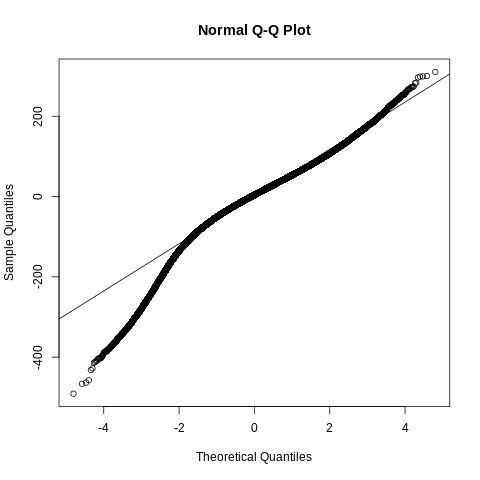

In [ ]:
%%R
qqnorm(residuals(fit.10b))
abline(0,sd(residuals(fit.10b)))

In [ ]:
%%R
confint(fit.10b)

                               2.5 %       97.5 %     Estimate
(Intercept)              561.7739988 582.34043155 572.05721520
fDimCat3                  15.4239255  16.78677864  16.10535208
fDimCat4                  20.4998790  21.86135685  21.18061794
fDimCat5                  13.5097063  15.04193680  14.27582156
fDimCat6                   5.5273028   7.40705209   6.46717747
fLactationNumberCat2      -5.9975481  -3.28875629  -4.64315221
fLactationNumberCat3      -8.2615113  -3.30338708  -5.78244917
fLactationNumberCat4      -7.2577965  -0.04268474  -3.65024062
fLactationNumberCat5      -5.8414986   3.72095685  -1.06027085
fLactationNumberCat6      -6.0222172   6.21200029   0.09489156
fLactationNumberCat7       2.1722068  17.46690072   9.81955375
fLactationNumberCat8       4.8905686  23.89100453  14.39078658
fTempMean2daysbeforeCat0   2.2238909   3.83230619   3.02809852
fTempMean2daysbeforeCat2  -0.3807224   0.67312635   0.14620200
fTempMean2daysbeforeCat3  -0.8050355   0.48521201  -0.1

In [ ]:
%%R
rm(fit.10b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740670  146.4    6361986  339.8   5656710  302.2
Vcells 204434764 1559.8  405990214 3097.5 392123677 2991.7


In [ ]:
%%R
##DRY 
fit.10c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model10c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMean2daysbeforeDRY.R'
save(fit.10c, file= url_model10c)
summary(fit.10c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813273.2  813630.7 -406597.6  813195.2     70702 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7976.0149 89.3085        
              Day            0.0119  0.1091  -0.80 
 Residual                 5113.3992 71.5080        
Number of obs: 70741, groups:  AnimalEartag, 1877

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               556.2407     4.9946  111.37  < 2e-16 ***
fLactationNumberCat2       35.2404     1.7720   19.89  < 2e-16 ***
fLactationNumberCat3        8.9794     2.4010    3.74 0.000184 ***
fLactationNumberCat4       -8.9078     2.8982   -3.07 0

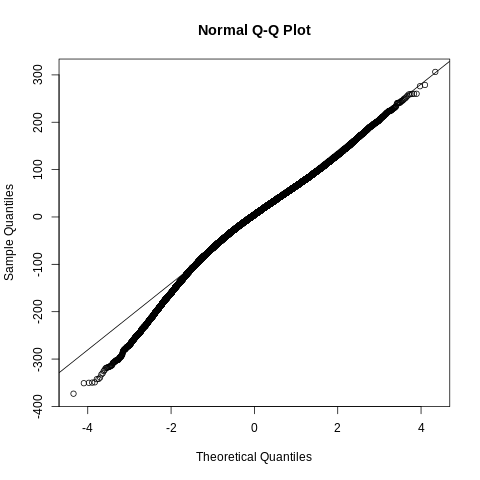

In [ ]:
%%R
qqnorm(residuals(fit.10c))
abline(0,sd(residuals(fit.10c)))

In [ ]:
%%R
confint(fit.10c)

                                2.5 %       97.5 %     Estimate
(Intercept)               546.4514062 566.02999437  556.2407003
fLactationNumberCat2       31.7673023  38.71347854   35.2403904
fLactationNumberCat3        4.2734807  13.68528822    8.9793844
fLactationNumberCat4      -14.5880828  -3.22742567   -8.9077542
fLactationNumberCat5      -27.9181376 -14.43612664  -21.1771321
fLactationNumberCat6      -18.9814316  -2.77839100  -10.8799113
fLactationNumberCat7      -27.7816810  -6.51325056  -17.1474658
fLactationNumberCat8      -21.4615027   7.54764534   -6.9569287
fTempMean2daysbeforeCat0   15.8685362  22.93510486   19.4018205
fTempMean2daysbeforeCat2   -7.8607563  -3.65182336   -5.7562898
fTempMean2daysbeforeCat3   -8.9116102  -3.89233533   -6.4019728
fTempMean2daysbeforeCat4   -5.4350763   0.83251501   -2.3012807
fTempMean2daysbeforeCat5   -3.7202249   6.29361558    1.2866953
fTempMean2daysbeforeCat6   -9.1783040  11.15548533    0.9885907
fYear2018                  -5.1145685   

In [ ]:
%%R
rm(fit.10c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2172435  116.1    6361986  339.8   5656710  302.2
Vcells 176829675 1349.2  405990214 3097.5 392123677 2991.7


# Run models Rumination grouped in 6 groups per 5

## Create sub datasets

In [ ]:
## load dataset
%%R 
url5 <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/df_joined_per5_rumination.csv'

dataset_per5 <- read.csv(url5, header = TRUE, sep = ",")[ ,c('SensorValue','DimCat','LactationNumber','ThiMeanCat','TempMeanCat','ThiMaxCat','TempMinCat','ThiMinCat',
                                                       'ThiMean1daybeforeCat', 'TempMean1daybeforeCat', 'ThiMean2daysbeforeCat', 'TempMean2daysbeforeCat','CowLac',  
                                                        'TempMaxCat','Year', 'Month', 'HerdIdentifier','Day','AnimalEartag', 'Temp6Hrs16','Thi6Hrs60')]
## Change categorized data to factor and relevel 
dataset<-dataset_per5
dataset$fDimCat <- factor(dataset$DimCat)
dataset$fHerdIdentifier <- factor(dataset$HerdIdentifier)
dataset$fYear <- factor(dataset$Year)
dataset$fMonth <- factor(dataset$Month)
dataset$fThiMeanCat <- factor(dataset$ThiMeanCat)
dataset$fThiMaxCat <- factor(dataset$ThiMaxCat)
dataset$fThiMinCat <- factor(dataset$ThiMinCat)
dataset$fTempMeanCat <- factor(dataset$TempMeanCat)
dataset$fTempMaxCat <- factor(dataset$TempMaxCat)
dataset$fTempMinCat <- factor(dataset$TempMinCat)
dataset$fThiMean1daybeforeCat <- factor(dataset$ThiMean1daybeforeCat)
dataset$fThiMean2daysbeforeCat <- factor(dataset$ThiMean2daysbeforeCat)
dataset$fTempMean2daysbeforeCat <- factor(dataset$TempMean2daysbeforeCat)
dataset$fTempMean1daybeforeCat <- factor(dataset$TempMean1daybeforeCat)
dataset$fTemp6Hrs16 <- factor(dataset$Temp6Hrs16)
dataset$fThi6Hrs60 <- factor(dataset$Thi6Hrs60)
dataset$fLactationNumberCat <- factor(dataset$LactationNumber)
dataset <- within(dataset, fThiMeanCat <- relevel(fThiMeanCat, ref = "1"))
dataset <- within(dataset, fThiMinCat <- relevel(fThiMinCat, ref = "1"))
dataset <- within(dataset, fThiMaxCat <- relevel(fThiMaxCat, ref = "1"))
dataset <- within(dataset, fTempMeanCat <- relevel(fTempMeanCat, ref = "1"))
dataset <- within(dataset, fTempMinCat <- relevel(fTempMinCat, ref = "1"))
dataset <- within(dataset, fTempMaxCat <- relevel(fTempMaxCat, ref = "1"))
dataset <- within(dataset, fThiMean1daybeforeCat <- relevel(fThiMean1daybeforeCat, ref = "1"))
dataset <- within(dataset, fTempMean1day1beforeCat <- relevel(fTempMean1daybeforeCat, ref = "1"))
dataset <- within(dataset, fThiMean2daysbeforeCat <- relevel(fThiMean2daysbeforeCat, ref = "1"))
dataset <- within(dataset, fTempMean2daysbeforeCat <- relevel(fTempMean2daysbeforeCat, ref = "1"))

In [ ]:
%%R
dataset_milk <- filter(dataset, fDimCat==1|fDimCat==2|fDimCat==3|fDimCat==4|fDimCat==5|fDimCat==6)
dataset_dry <- filter(dataset, fDimCat==0)
dataset_AMS <- filter(dataset_milk, HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314)
dataset_CMS <- filter(dataset_milk, HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888)
dataset_dry_AMS <- filter(dataset_dry, HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314)
dataset_dry_CMS <- filter(dataset_dry, HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888)

In [ ]:
%%R
write.csv(dataset_AMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per5_rumination_AMS.csv', row.names = FALSE)
write.csv(dataset_CMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per5_rumination_CMS.csv', row.names = FALSE)
write.csv(dataset_dry, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per5_rumination_DRY.csv', row.names = FALSE)
write.csv(dataset_milk, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per5_rumination_milk.csv', row.names = FALSE)
write.csv(dataset_dry_AMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per5_rumination_DRY_AMS.csv', row.names = FALSE)
write.csv(dataset_dry_CMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per5_rumination_DRY_CMS.csv', row.names = FALSE)


## Descriptives lactating AMS/CMS, dry cow

In [ ]:
%%R
data_count_AMS_cowlac <- dataset_AMS %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_AMS_cowlac

  count
1  1486


In [ ]:
%%R
data_count_AMS_cow <- dataset_AMS %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_AMS_cow

  count
1   686


In [ ]:
%%R
data_count_CMS_cowlac <- dataset_CMS %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_CMS_cowlac

  count
1  2839


In [ ]:
%%R
data_count_dry_CMS <- dataset_CMS %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_dry_CMS

  count
1  1276


In [ ]:
%%R
data_count_dry_cowlac <- dataset_dry %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_dry_cowlac

  count
1  3664


In [ ]:
%%R
data_count_dry_cow <- dataset_dry %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_dry_cow

  count
1  1878


In [ ]:
%%R
table(dataset_AMS$ThiMeanCat)


     0      1      2      3      4      5 
  1200 174955  53487  59428  25193   7231 


In [ ]:
%%R
table(dataset_AMS$ThiMaxCat)


     0      1      2      3      4      5 
    97 123172  44886  51731  59750  41858 


In [ ]:
%%R
table(dataset_AMS$ThiMinCat)


     0      1      2      3      4      5 
 11922 126930  56614  53749  48242  24037 


In [ ]:
%%R
table(dataset_AMS$ThiMean1daybeforeCat)


     0      1      2      3      4      5 
  1202 174765  53632  59375  25270   7250 


In [ ]:
%%R
table(dataset_AMS$ThiMean2daysbeforeCat)


     0      1      2      3      4      5 
  1206 174571  53664  59489  25301   7263 


In [ ]:
%%R
table(dataset_AMS$TempMeanCat)


     0      1      2      3      4      5 
  7070 128373  74397  87567  20775   3312 


In [ ]:
%%R
table(dataset_AMS$TempMaxCat)


    0     1     2     3     4     5 
 2239 83478 70975 72409 63161 29232 


In [ ]:
%%R
table(dataset_AMS$TempMinCat)


    0     1     2     3     4     5 
25935 79102 94424 88720 31501  1812 


In [ ]:
%%R
table(dataset_AMS$TempMean1daybeforeCat)


     0      1      2      3      4      5 
  7069 128102  74670  87426  20909   3318 


In [ ]:
%%R
table(dataset_AMS$TempMean2daysbeforeCat)


     0      1      2      3      4      5 
  7063 127978  74687  87540  20894   3332 


In [ ]:
%%R
table(dataset_CMS$ThiMeanCat)


     0      1      2      3      4      5 
  8619 355082 107367 105644  47568  15091 


In [ ]:
%%R
table(dataset_CMS$ThiMaxCat)


     0      1      2      3      4      5 
  1136 250740  85497  93198 114466  94334 


In [ ]:
%%R
table(dataset_CMS$ThiMinCat)


     0      1      2      3      4      5 
 45506 281492 108740  97014  77495  29124 


In [ ]:
%%R
table(dataset_CMS$ThiMean1daybeforeCat)


     0      1      2      3      4      5 
  8517 354923 107375 105772  47565  15100 


In [ ]:
%%R
table(dataset_CMS$ThiMean2daysbeforeCat)


     0      1      2      3      4      5 
  8523 354762 107348 105696  47685  15120 


In [ ]:
%%R
table(dataset_CMS$TempMeanCat)


     0      1      2      3      4      5 
 24870 263754 142984 153304  46221   8238 


In [ ]:
%%R
table(dataset_CMS$TempMaxCat)


     0      1      2      3      4      5 
  8413 174451 127128 129636 128082  71661 


In [ ]:
%%R
table(dataset_CMS$TempMinCat)


     0      1      2      3      4      5 
 91100 167031 183004 157137  37961   3138 


In [ ]:
%%R
table(dataset_CMS$TempMean1daybeforeCat)


     0      1      2      3      4      5 
 24804 263445 143092 153376  46296   8239 


In [ ]:
%%R
table(dataset_CMS$TempMean2daysbeforeCat)


     0      1      2      3      4      5 
 24723 263406 142937 153356  46462   8250 


In [ ]:
%%R
table(dataset_dry$ThiMeanCat)


    0     1     2     3     4     5 
  773 35970 12280 13937  6037  1764 


In [ ]:
%%R
table(dataset_dry$ThiMaxCat)


    0     1     2     3     4     5 
   89 25053  9211 11180 14103 11125 


In [ ]:
%%R
table(dataset_dry$ThiMinCat)


    0     1     2     3     4     5 
 4135 27471 12144 12016 10653  4342 


In [ ]:
%%R
table(dataset_dry$ThiMean1daybeforeCat)


    0     1     2     3     4     5 
  779 35974 12269 13934  6050  1746 


In [ ]:
%%R
table(dataset_dry$ThiMean2daysbeforeCat)


    0     1     2     3     4     5 
  785 35973 12219 13917  6109  1738 


In [ ]:
%%R
table(dataset_dry$TempMeanCat)


    0     1     2     3     4     5 
 2282 26201 15884 20031  5432   931 


In [ ]:
%%R
table(dataset_dry$TempMaxCat)


    0     1     2     3     4     5 
  794 17227 13586 15527 15476  8151 


In [ ]:
%%R
table(dataset_dry$TempMinCat)


    0     1     2     3     4     5 
 8052 16541 19798 20247  5711   412 


In [ ]:
%%R
table(dataset_dry$TempMean1daybeforeCat)


    0     1     2     3     4     5 
 2286 26170 15963 19979  5434   920 


In [ ]:
%%R
table(dataset_dry$TempMean2daysbeforeCat)


    0     1     2     3     4     5 
 2292 26130 15961 19939  5502   917 


## Model THI mean

In [ ]:
%%R
##AMS
fit.1a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model1a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIMeanAMS.R'
save(fit.1a, file= url_model1a)
summary(fit.1a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514517  3514912 -1757222  3514443   321457 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.013e+04 141.8975       
              Day         2.330e-02   0.1526 -0.81 
 Residual                 3.202e+03  56.5818       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          541.5909     7.1893   75.33  < 2e-16 ***
fDimCat3              29.6926     0.4818   61.63  < 2e-16 ***
fDimCat4              33.5271     0.4951   67.72  < 2e-16 ***
fDimCat5              23.6046     0.5846   40.38  < 2e-16 ***
fDimCat6              14.7

In [ ]:
%%R
confint(fit.1a)

                            2.5 %      97.5 %    Estimate
(Intercept)           527.5002234 555.6815891 541.5909063
fDimCat3               28.7482968  30.6369015  29.6925992
fDimCat4               32.5568115  34.4973860  33.5270987
fDimCat5               22.4587798  24.7503695  23.6045746
fDimCat6               13.2474049  16.1997065  14.7235557
fLactationNumberCat2    8.4770937  13.0665761  10.7718349
fLactationNumberCat3    7.4836669  15.9820216  11.7328442
fLactationNumberCat4   17.2876982  29.7240715  23.5058848
fLactationNumberCat5   29.4763248  45.9201878  37.6982563
fLactationNumberCat6   42.2701261  62.9137817  52.5919539
fLactationNumberCat7   44.3379182  69.2204455  56.7791818
fLactationNumberCat8   50.3300157  80.1882784  65.2591470
fThiMeanCat0            1.6728684   8.2153526   4.9441105
fThiMeanCat2           -3.4000387  -1.9125526  -2.6562957
fThiMeanCat3           -3.4711871  -1.7354027  -2.6032949
fThiMeanCat4           -1.4835383   0.6626917  -0.4104233
fThiMeanCat5  

In [ ]:
%%R
rm(fit.1a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423235  129.5    6361986  339.8   5656710  302.2
Vcells 197676794 1508.2  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##CMS 
fit.1b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model1b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIMeanCMS.R'
save(fit.1b, file= url_model1b)
summary(fit.1b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7039535  7039979 -3519729  7039457   639332 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.108e+04 105.2469       
              Day         1.269e-02   0.1127 -0.76 
 Residual                 3.472e+03  58.9244       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.5105     5.2365  109.33  < 2e-16 ***
fDimCat3              16.0640     0.3477   46.19  < 2e-16 ***
fDimCat4              21.1587     0.3474   60.91  < 2e-16 ***
fDimCat5              14.2091     0.3910   36.34  < 2e-16 ***
fDimCat6               6

In [ ]:
%%R
confint(fit.1b)

                           2.5 %        97.5 %    Estimate
(Intercept)          562.2471105 582.773865072 572.5104878
fDimCat3              15.3824206  16.745567416  16.0639940
fDimCat4              20.4778164  21.839575643  21.1586960
fDimCat5              13.4428091  14.975338250  14.2090737
fDimCat6               5.4495595   7.329608723   6.3895841
fLactationNumberCat2  -6.1270671  -3.418603039  -4.7728351
fLactationNumberCat3  -8.4303873  -3.472386361  -5.9513868
fLactationNumberCat4  -7.4011015  -0.185602842  -3.7933522
fLactationNumberCat5  -5.8071461   3.756390557  -1.0253778
fLactationNumberCat6  -5.8305407   6.405188895   0.2873241
fLactationNumberCat7   2.5425760  17.839873590  10.1912248
fLactationNumberCat8   5.6893315  24.693321758  15.1913266
fThiMeanCat0          -5.9074185  -3.293862442  -4.6006405
fThiMeanCat2          -0.9892963   0.076650656  -0.4563228
fThiMeanCat3          -0.9020121   0.367658169  -0.2671770
fThiMeanCat4           6.1001655   7.638606019   6.86938

In [ ]:
%%R
rm(fit.1b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741257  146.4    6361986  339.8   5656710  302.2
Vcells 213290846 1627.3  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##DRY 
fit.1c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model1c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIMeanDRY.R'
save(fit.1c, file= url_model1c)
summary(fit.1c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMeanCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813594.8  813943.1 -406759.4  813518.8     70723 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.980e+03 89.3295        
              Day         1.193e-02  0.1092  -0.80 
 Residual                 5.120e+03 71.5540        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           558.7712     4.9868  112.05  < 2e-16 ***
fLactationNumberCat2   35.0416     1.7724   19.77  < 2e-16 ***
fLactationNumberCat3    8.9045     2.4016    3.71 0.000209 ***
fLactationNumberCat4   -8.9713     2.8996   -3.09 0.001975 ** 
fLactationNumberCat5

In [ ]:
%%R
confint(fit.1c)

                            2.5 %      97.5 %     Estimate
(Intercept)           548.9972256 568.5451427  558.7711842
fLactationNumberCat2   31.5678218  38.5154283   35.0416250
fLactationNumberCat3    4.1973996  13.6116461    8.9045228
fLactationNumberCat4  -14.6544456  -3.2881049   -8.9712753
fLactationNumberCat5  -28.1850149 -14.6935229  -21.4392689
fLactationNumberCat6  -18.8680900  -2.6506321  -10.7593611
fLactationNumberCat7  -27.4629154  -6.1729002  -16.8179078
fLactationNumberCat8  -21.1332035   7.9055859   -6.6138088
fThiMeanCat0            4.2460579  15.4428845    9.8444712
fThiMeanCat2           -8.6750590  -4.4522710   -6.5636650
fThiMeanCat3          -12.1226339  -7.2140065   -9.6683202
fThiMeanCat4          -12.0450328  -6.1496995   -9.0973661
fThiMeanCat5          -11.3505041  -2.7036105   -7.0270573
fYear2018              -4.7229506   1.4554997   -1.6337255
fYear2019             -25.9148011 -16.0080667  -20.9614339
fYear2020             -36.8480277 -22.7698507  -29.80893

In [ ]:
%%R
rm(fit.1c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2172791  116.1    6361986  339.8   5656710  302.2
Vcells 186528264 1423.1  405990214 3097.5 405950039 3097.2


## Model THI max

In [ ]:
%%R
##AMS
fit.2a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model2a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIMaxAMS.R'
save(fit.2a, file= url_model2a)
summary(fit.2a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514490  3514885 -1757208  3514416   321457 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.019e+04 142.0906       
              Day         2.335e-02   0.1528 -0.81 
 Residual                 3.201e+03  56.5792       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          541.9187     7.1967   75.30  < 2e-16 ***
fDimCat3              29.7265     0.4818   61.70  < 2e-16 ***
fDimCat4              33.5266     0.4951   67.72  < 2e-16 ***
fDimCat5              23.6301     0.5848   40.41  < 2e-16 ***
fDimCat6              14.77

In [ ]:
%%R
confint(fit.2a)

                             2.5 %      97.5 %    Estimate
(Intercept)           527.81343102 556.0239086 541.9186698
fDimCat3               28.78218881  30.6707141  29.7264515
fDimCat4               32.55620090  34.4969280  33.5265645
fDimCat5               22.48401821  24.7762048  23.6301115
fDimCat6               13.29482847  16.2484704  14.7716494
fLactationNumberCat2    8.61259001  13.2040406  10.9083153
fLactationNumberCat3    7.66326614  16.1659214  11.9145938
fLactationNumberCat4   17.48290440  29.9259053  23.7044049
fLactationNumberCat5   29.68488766  46.1374968  37.9111923
fLactationNumberCat6   42.43869242  63.0930878  52.7658901
fLactationNumberCat7   44.56506453  69.4597461  57.0124053
fLactationNumberCat8   50.51540863  80.3865394  65.4509740
fThiMaxCat0            -2.65057422  19.9915172   8.6704715
fThiMaxCat2            -3.59463716  -2.0686218  -2.8316295
fThiMaxCat3            -5.15965465  -3.3473637  -4.2535092
fThiMaxCat4            -6.42358789  -4.4740462  -5.44881

In [ ]:
%%R
rm(fit.2a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423655  129.5    6361986  339.8   5656710  302.2
Vcells 197681542 1508.2  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##CMS 
fit.2b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model2b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIMaxCMS.R'
save(fit.2b, file= url_model2b)
summary(fit.2b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7039075  7039518 -3519498  7038997   639332 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.089e+04 104.3710       
              Day         1.258e-02   0.1122 -0.76 
 Residual                 3.470e+03  58.9039       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          573.5003     5.2121  110.03  < 2e-16 ***
fDimCat3              16.0725     0.3476   46.24  < 2e-16 ***
fDimCat4              21.1557     0.3472   60.94  < 2e-16 ***
fDimCat5              14.2647     0.3905   36.53  < 2e-16 ***
fDimCat6               6.

In [ ]:
%%R
confint(fit.2b)

                           2.5 %      97.5 %    Estimate
(Intercept)          563.2848270 583.7158654 573.5003462
fDimCat3              15.3912102  16.7538313  16.0725207
fDimCat4              20.4753115  21.8361466  21.1557291
fDimCat5              13.4993134  15.0300426  14.2646780
fDimCat6               5.5321532   7.4092488   6.4707010
fLactationNumberCat2  -5.9670471  -3.2636659  -4.6153565
fLactationNumberCat3  -8.1099787  -3.1621267  -5.6360527
fLactationNumberCat4  -6.9494812   0.2510560  -3.3492126
fLactationNumberCat5  -5.2359635   4.3080046  -0.4639795
fLactationNumberCat6  -5.1280062   7.0840597   0.9780268
fLactationNumberCat7   3.3571194  18.6275740  10.9923467
fLactationNumberCat8   6.5573667  25.5320973  16.0447320
fThiMaxCat0            2.9755163   9.8942287   6.4348725
fThiMaxCat2           -4.2846591  -3.1609402  -3.7227997
fThiMaxCat3           -5.7638634  -4.4406836  -5.1022735
fThiMaxCat4          -10.4196053  -9.0347645  -9.7271849
fThiMaxCat5           -1.023090

In [ ]:
%%R
rm(fit.2b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741687  146.5    6361986  339.8   5656710  302.2
Vcells 213295619 1627.4  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##DRY 
fit.2c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model2c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIMaxDRY.R'
save(fit.2c, file= url_model2c)
summary(fit.2c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMaxCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813491.5  813839.9 -406707.8  813415.5     70723 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.923e+03 89.0085        
              Day         1.184e-02  0.1088  -0.80 
 Residual                 5.113e+03 71.5078        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           560.6693     4.9676  112.86  < 2e-16 ***
fLactationNumberCat2   34.9176     1.7689   19.74  < 2e-16 ***
fLactationNumberCat3    8.8340     2.3964    3.69 0.000228 ***
fLactationNumberCat4   -8.9904     2.8931   -3.11 0.001887 ** 
fLactationNumberCat5 

In [ ]:
%%R
confint(fit.2c)

                            2.5 %      97.5 %     Estimate
(Intercept)           550.9328577 570.4056563  560.6692570
fLactationNumberCat2   31.4505636  38.3845887   34.9175761
fLactationNumberCat3    4.1371314  13.5309369    8.8340341
fLactationNumberCat4  -14.6608471  -3.3200134   -8.9904302
fLactationNumberCat5  -28.2503596 -14.7899462  -21.5201529
fLactationNumberCat6  -19.0552496  -2.8730312  -10.9641404
fLactationNumberCat7  -27.5230229  -6.2752094  -16.8991161
fLactationNumberCat8  -21.2605273   7.7210327   -6.7697473
fThiMaxCat0            15.7558926  46.2576151   31.0067538
fThiMaxCat2           -11.9096287  -7.4577914   -9.6837100
fThiMaxCat3           -16.7884545 -11.4894067  -14.1389306
fThiMaxCat4           -20.5497620 -14.9394167  -17.7445893
fThiMaxCat5           -20.5610318 -14.4749729  -17.5180024
fYear2018              -4.4895317   1.6789014   -1.4053152
fYear2019             -25.7841727 -15.9071839  -20.8456783
fYear2020             -36.6629427 -22.6295259  -29.64623

In [ ]:
%%R
rm(fit.2c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173219  116.1    6361986  339.8   5656710  302.2
Vcells 186533029 1423.2  405990214 3097.5 405950039 3097.2


## Model THI min

In [ ]:
%%R
##AMS
fit.3a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model3a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIminAMS.R'
save(fit.3a, file= url_model3a)
summary(fit.3a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514534  3514929 -1757230  3514460   321457 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.027e+04 142.3731       
              Day         2.335e-02   0.1528 -0.81 
 Residual                 3.202e+03  56.5832       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          541.1514     7.2025   75.13  < 2e-16 ***
fDimCat3              29.7022     0.4818   61.65  < 2e-16 ***
fDimCat4              33.5078     0.4951   67.68  < 2e-16 ***
fDimCat5              23.5775     0.5846   40.33  < 2e-16 ***
fDimCat6              14.67

In [ ]:
%%R
confint(fit.3a)

                            2.5 %       97.5 %    Estimate
(Intercept)           527.0347021 555.26816571 541.1514339
fDimCat3               28.7579239  30.64656203  29.7022429
fDimCat4               32.5374562  34.47806748  33.5077618
fDimCat5               22.4318148  24.72326331  23.5775390
fDimCat6               13.1986129  16.15048584  14.6745494
fLactationNumberCat2    8.3704654  12.96056478  10.6655151
fLactationNumberCat3    7.2586731  15.75760921  11.5081411
fLactationNumberCat4   16.9529129  29.38884360  23.1708782
fLactationNumberCat5   29.0078362  45.44996494  37.2289006
fLactationNumberCat6   41.6969713  62.33711139  52.0170413
fLactationNumberCat7   43.6942682  68.57173127  56.1329997
fLactationNumberCat8   49.6662313  79.51803444  64.5921329
fThiMinCat0            -2.0787661   0.10321642  -0.9877748
fThiMinCat2            -2.9858370  -1.73926195  -2.3625495
fThiMinCat3            -3.6107422  -2.08038633  -2.8455642
fThiMinCat4            -3.9226233  -2.16073456  -3.04167

In [ ]:
%%R
rm(fit.3a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423371  129.5    6361986  339.8   5656710  302.2
Vcells 197678178 1508.2  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##CMS 
fit.3b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model3b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIMinCMS.R'
save(fit.3b, file= url_model3b)
summary(fit.3b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7040515  7040959 -3520219  7040437   639332 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.107e+04 105.2207       
              Day         1.274e-02   0.1129 -0.76 
 Residual                 3.477e+03  58.9693       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.48e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.58592    5.24452  109.18  < 2e-16 ***
fDimCat3              16.03455    0.34801   46.08  < 2e-16 ***
fDimCat4              21.18785    0.34765   60.95  < 2e-16 ***
fDimCat5              14.26581    0.39126   36.46  < 2e-16 ***
fDimCat6            

In [ ]:
%%R
confint(fit.3b)

                           2.5 %      97.5 %      Estimate
(Intercept)          562.3068595 582.8649907 572.585925108
fDimCat3              15.3524655  16.7166379  16.034551677
fDimCat4              20.5064719  21.8692339  21.187852916
fDimCat5              13.4989649  15.0326631  14.265814007
fDimCat6               5.5404783   7.4221046   6.481291437
fLactationNumberCat2  -5.9414887  -3.2307910  -4.586139871
fLactationNumberCat3  -8.0534499  -3.0909065  -5.572178180
fLactationNumberCat4  -6.8975887   0.3247671  -3.286410812
fLactationNumberCat5  -5.1956899   4.3775636  -0.409063114
fLactationNumberCat6  -5.0946017   7.1543332   1.029865761
fLactationNumberCat7   3.4746805  18.7890960  11.131888266
fLactationNumberCat8   6.7615528  25.7865705  16.274061647
fThiMinCat0            1.6982865   2.9053393   2.301812940
fThiMinCat2            0.7996154   1.7294399   1.264527642
fThiMinCat3            1.5318447   2.6392146   2.085529631
fThiMinCat4            2.9846956   4.2250149   3.6048552

In [ ]:
%%R
rm(fit.3b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741393  146.5    6361986  339.8   5656710  302.2
Vcells 213292230 1627.3  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##DRY 
fit.3c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model3c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIMinDRY.R'
save(fit.3c, file= url_model3c)
summary(fit.3c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMinCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813528.4  813876.8 -406726.2  813452.4     70723 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.959e+03 89.2144        
              Day         1.192e-02  0.1092  -0.80 
 Residual                 5.115e+03 71.5206        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          556.7161     4.9867  111.64  < 2e-16 ***
fLactationNumberCat2  35.3830     1.7718   19.97  < 2e-16 ***
fLactationNumberCat3   9.3007     2.4003    3.87 0.000107 ***
fLactationNumberCat4  -8.5297     2.8982   -2.94 0.003249 ** 
fLactationNumberCat5 -21.1

In [ ]:
%%R
confint(fit.3c)

                            2.5 %      97.5 %    Estimate
(Intercept)           546.9424270 566.4898634 556.7161452
fLactationNumberCat2   31.9102553  38.8557178  35.3829866
fLactationNumberCat3    4.5961011  14.0052779   9.3006895
fLactationNumberCat4  -14.2100036  -2.8494071  -8.5297054
fLactationNumberCat5  -27.8773597 -14.3929063 -21.1351330
fLactationNumberCat6  -18.8352823  -2.6265610 -10.7309217
fLactationNumberCat7  -27.2994851  -6.0199205 -16.6597028
fLactationNumberCat8  -20.6696685   8.3593027  -6.1551829
fThiMinCat0             9.2476085  14.5106281  11.8791183
fThiMinCat2            -6.6495084  -3.0661983  -4.8578534
fThiMinCat3            -9.3316649  -5.0862058  -7.2089353
fThiMinCat4            -8.2569965  -3.5240184  -5.8905075
fThiMinCat5           -12.0190107  -5.8731278  -8.9460692
fYear2018              -5.0155734   1.1526988  -1.9314373
fYear2019             -25.6417990 -15.7388298 -20.6903144
fYear2020             -36.2667541 -22.1918032 -29.2292786
fMonth2       

In [ ]:
%%R
rm(fit.3c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2172927  116.1    6361986  339.8   5656710  302.2
Vcells 186529648 1423.2  405990214 3097.5 405950039 3097.2


## Model THI mean 1 day before

In [ ]:
%%R
##AMS
fit.4a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model4a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIMean1daybeforeAMS.R'
save(fit.4a, file= url_model4a)
summary(fit.4a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514550  3514945 -1757238  3514476   321457 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.034e+04 142.6014       
              Day         2.345e-02   0.1531 -0.81 
 Residual                 3.202e+03  56.5843       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            539.82591    7.21565   74.81  < 2e-16 ***
fDimCat3                29.71535    0.48182   61.67  < 2e-16 ***
fDimCat4                33.51079    0.49508   67.69  < 2e-16 ***
fDimCat5                23.57585    0.58461   40.33  < 2e-16 ***
f

In [ ]:
%%R
confint(fit.4a)

                               2.5 %      97.5 %     Estimate
(Intercept)             525.68349054 553.9683335 539.82591204
fDimCat3                 28.77099995  30.6596912  29.71534555
fDimCat4                 32.54045797  34.4811235  33.51079076
fDimCat5                 22.43003162  24.7216584  23.57584501
fDimCat6                 13.17951826  16.1317522  14.65563524
fLactationNumberCat2      8.36842543  12.9583972  10.66341133
fLactationNumberCat3      7.20977300  15.7086349  11.45920394
fLactationNumberCat4     16.84001699  29.2762389  23.05812796
fLactationNumberCat5     28.87739630  45.3199967  37.09869651
fLactationNumberCat6     41.50413946  62.1449188  51.82452912
fLactationNumberCat7     43.39760265  68.2758376  55.83672012
fLactationNumberCat8     49.27506430  79.1273824  64.20122335
fThiMean1daybeforeCat0   -0.44160087   6.0707389   2.81456903
fThiMean1daybeforeCat2   -1.89592112  -0.4129620  -1.15444154
fThiMean1daybeforeCat3   -0.07270035   1.6736115   0.80045557
fThiMean

In [ ]:
%%R
rm(fit.4a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423830  129.5    6361986  339.8   5656710  302.2
Vcells 197683167 1508.3  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##CMS 
fit.4b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model4b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelThiMean1daybeforeCMS.R'
save(fit.4b, file= url_model4b)
summary(fit.4b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7037342  7037785 -3518632  7037264   639213 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.113e+04 105.5117       
              Day         1.274e-02   0.1129 -0.76 
 Residual                 3.467e+03  58.8832       
Number of obs: 639252, groups:  AnimalEartag, 1275

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            571.1200     5.2479  108.83  < 2e-16 ***
fDimCat3                16.1033     0.3475   46.34  < 2e-16 ***
fDimCat4                21.1858     0.3472   61.02  < 2e-16 ***
fDimCat5                14.2353     0.3908   36.42  < 2e-16 ***
fDim

In [ ]:
%%R
confint(fit.4b)

                              2.5 %      97.5 %    Estimate
(Intercept)            560.83437400 581.4056036 571.1199888
fDimCat3                15.42213345  16.7844584  16.1032959
fDimCat4                20.50529077  21.8663706  21.1858307
fDimCat5                13.46930415  15.0013192  14.2353117
fDimCat6                 5.44971236   7.3293963   6.3895543
fLactationNumberCat2    -6.10627315  -3.3978339  -4.7520535
fLactationNumberCat3    -8.46754726  -3.5094014  -5.9884743
fLactationNumberCat4    -7.53791683  -0.3221051  -3.9300110
fLactationNumberCat5    -6.12045327   3.4433865  -1.3385334
fLactationNumberCat6    -6.32830451   5.9075402  -0.2103822
fLactationNumberCat7     1.84067559  17.1367188   9.4886972
fLactationNumberCat8     4.64512125  23.6456934  14.1454073
fThiMean1daybeforeCat0   2.07751372   4.7006544   3.3890841
fThiMean1daybeforeCat2  -0.12797711   0.9356624   0.4038427
fThiMean1daybeforeCat3   2.75355672   4.0288910   3.3912238
fThiMean1daybeforeCat4  10.24918735  11.

In [ ]:
%%R
rm(fit.4b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741716  146.5    6361986  339.8   5656710  302.2
Vcells 213611243 1629.8  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##DRY 
fit.4c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model4c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIMean1daybeforeDRY.R'
save(fit.4c, file= url_model4c)
summary(fit.4c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMean1daybeforeCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813524.1  813872.4 -406724.0  813448.1     70714 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.987e+03 89.3727        
              Day         1.192e-02  0.1092  -0.80 
 Residual                 5.123e+03 71.5717        
Number of obs: 70752, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             559.0529     4.9869  112.10  < 2e-16 ***
fLactationNumberCat2     34.8932     1.7728   19.68  < 2e-16 ***
fLactationNumberCat3      8.7538     2.4021    3.64 0.000268 ***
fLactationNumberCat4     -9.1051     2.8999   -3.14 0.001691 ** 


In [ ]:
%%R
confint(fit.4c)

                              2.5 %      97.5 %     Estimate
(Intercept)             549.2788034 568.8270903  559.0529468
fLactationNumberCat2     31.4186046  38.3678491   34.8932269
fLactationNumberCat3      4.0458182  13.4616873    8.7537527
fLactationNumberCat4    -14.7887527  -3.4214294   -9.1050910
fLactationNumberCat5    -28.3976106 -14.9064460  -21.6520283
fLactationNumberCat6    -19.1580495  -2.9417028  -11.0498762
fLactationNumberCat7    -27.6897745  -6.4017060  -17.0457402
fLactationNumberCat8    -21.3849341   7.6504593   -6.8672374
fThiMean1daybeforeCat0    1.5107845  12.6635303    7.0871574
fThiMean1daybeforeCat2   -6.0724797  -1.8484385   -3.9604591
fThiMean1daybeforeCat3   -7.6820008  -2.7426999   -5.2123504
fThiMean1daybeforeCat4   -7.8676482  -1.9448157   -4.9062319
fThiMean1daybeforeCat5   -2.8604734   5.8356939    1.4876103
fYear2018                -4.8428413   1.3372916   -1.7527749
fYear2019               -25.7980604 -15.8916178  -20.8448391
fYear2020               

In [ ]:
%%R
rm(fit.4c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173329  116.1    6361986  339.8   5656710  302.2
Vcells 186569199 1423.5  405990214 3097.5 405950039 3097.2


##Model THI mean 2 days before

In [ ]:
%%R
##AMS
fit.5a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model5a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIMean2daysbeforeAMS.R'
save(fit.5a, file= url_model5a)
summary(fit.5a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514579  3514974 -1757253  3514505   321457 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.027e+04 142.3602       
              Day         2.339e-02   0.1529 -0.81 
 Residual                 3.202e+03  56.5871       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             540.43457    7.20402   75.02  < 2e-16 ***
fDimCat3                 29.70211    0.48184   61.64  < 2e-16 ***
fDimCat4                 33.50192    0.49509   67.67  < 2e-16 ***
fDimCat5                 23.56741    0.58461   40.31  < 2e-16

In [ ]:
%%R
confint(fit.5a)

                                2.5 %      97.5 %     Estimate
(Intercept)              526.31496008 554.5541804 540.43457022
fDimCat3                  28.75772699  30.6464979  29.70211243
fDimCat4                  32.53155725  34.4722787  33.50191797
fDimCat5                  22.42159061  24.7132236  23.56740711
fDimCat6                  13.17542099  16.1276427  14.65153184
fLactationNumberCat2       8.35675045  12.9465239  10.65163715
fLactationNumberCat3       7.21090320  15.7093193  11.46011123
fLactationNumberCat4      16.88003528  29.3156263  23.09783078
fLactationNumberCat5      28.95751445  45.3993853  37.17844987
fLactationNumberCat6      41.64956769  62.2896292  51.96959843
fLactationNumberCat7      43.59909910  68.4766830  56.03789107
fLactationNumberCat8      49.55069020  79.4025257  64.47660794
fThiMean2daysbeforeCat0   -4.33381977   2.1693467  -1.08223656
fThiMean2daysbeforeCat2   -1.63663090  -0.1574636  -0.89704724
fThiMean2daysbeforeCat3   -0.88755872   0.8634794  -0.0

In [ ]:
%%R
rm(fit.5a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424229  129.5    6361986  339.8   5656710  302.2
Vcells 197687730 1508.3  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##CMS 
fit.5b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model5b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelThiMean2daysbeforeCMS.R'
save(fit.5b, file= url_model5b)
summary(fit.5b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7036987  7037431 -3518455  7036909   639095 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.112e+04 105.4290       
              Day         1.274e-02   0.1129 -0.76 
 Residual                 3.472e+03  58.9269       
Number of obs: 639134, groups:  AnimalEartag, 1275

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             572.2801     5.2497  109.01  < 2e-16 ***
fDimCat3                 16.0891     0.3478   46.26  < 2e-16 ***
fDimCat4                 21.1939     0.3475   60.99  < 2e-16 ***
fDimCat5                 14.2735     0.3911   36.50  < 2e-16 **

In [ ]:
%%R
confint(fit.5b)

                               2.5 %       97.5 %    Estimate
(Intercept)             561.99097688 582.56931705 572.2801470
fDimCat3                 15.40734298  16.77077209  16.0890575
fDimCat4                 20.51281500  21.87492468  21.1938698
fDimCat5                 13.50693933  15.03998195  14.2734606
fDimCat6                  5.51920556   7.40002776   6.4596167
fLactationNumberCat2     -6.02372415  -3.31374547  -4.6687348
fLactationNumberCat3     -8.29172019  -3.33097442  -5.8113473
fLactationNumberCat4     -7.24835913  -0.02871613  -3.6385376
fLactationNumberCat5     -5.74805882   3.82114695  -0.9634559
fLactationNumberCat6     -5.86191923   6.38121330   0.2596470
fLactationNumberCat7      2.42288236  17.72862297  10.0757527
fLactationNumberCat8      5.39062241  24.40373409  14.8971783
fThiMean2daysbeforeCat0   1.64683413   4.27022041   2.9585273
fThiMean2daysbeforeCat2  -0.02594709   1.03830397   0.5061784
fThiMean2daysbeforeCat3   0.10984964   1.39202291   0.7509363
fThiMean

In [ ]:
%%R
rm(fit.5b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741118  146.4    6361986  339.8   5656710  302.2
Vcells 213600440 1629.7  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##DRY 
fit.5c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model5c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTHIMean2daysbeforeDRY.R'
save(fit.5c, file= url_model5c)
summary(fit.5c)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813376.4  813724.7 -406650.2  813300.4     70703 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.996e+03 89.4190        
              Day         1.194e-02  0.1093  -0.80 
 Residual                 5.121e+03 71.5606        
Number of obs: 70741, groups:  AnimalEartag, 1877

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              558.2442     4.9911  111.85  < 2e-16 ***
fLactationNumberCat2      34.9496     1.7730   19.71  < 2e-16 ***
fLactationNumberCat3       8.8082     2.4026    3.67 0.000246 ***
fLactationNumberCat4      -9.1379     2.9002   -3.15 0.001628

In [ ]:
%%R
confint(fit.5c)

                               2.5 %       97.5 %     Estimate
(Intercept)              548.4618217 568.02655966  558.2441907
fLactationNumberCat2      31.4744966  38.42465928   34.9495779
fLactationNumberCat3       4.0991743  13.51721131    8.8081928
fLactationNumberCat4     -14.8221543  -3.45356704   -9.1378607
fLactationNumberCat5     -28.3929233 -14.90214490  -21.6475341
fLactationNumberCat6     -19.1591368  -2.94446456  -11.0518007
fLactationNumberCat7     -27.7546092  -6.46957848  -17.1120938
fLactationNumberCat8     -21.3289276   7.70262073   -6.8131534
fThiMean2daysbeforeCat0   12.0744645  23.21946418   17.6469644
fThiMean2daysbeforeCat2   -6.0872795  -1.85844743   -3.9728635
fThiMean2daysbeforeCat3   -6.6018051  -1.64834226   -4.1250737
fThiMean2daysbeforeCat4   -4.5261321   1.39935499   -1.5633885
fThiMean2daysbeforeCat5   -4.1912466   4.53076725    0.1697603
fYear2018                 -4.9629106   1.22074197   -1.8710843
fYear2019                -25.6438997 -15.73359378  -20.

In [ ]:
%%R
rm(fit.5c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2172881  116.1    6361986  339.8   5656710  302.2
Vcells 186563695 1423.4  405990214 3097.5 405950039 3097.2


## Model Temp mean

In [ ]:
%%R
##AMS
fit.6a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model6a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMeanAMS.R'
save(fit.6a, file= url_model6a)
summary(fit.6a)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514431  3514826 -1757179  3514357   321457 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.021e+04 142.1629       
              Day         2.327e-02   0.1526 -0.81 
 Residual                 3.201e+03  56.5744       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          541.5724     7.1932   75.29  < 2e-16 ***
fDimCat3              29.7100     0.4817   61.67  < 2e-16 ***
fDimCat4              33.5196     0.4950   67.72  < 2e-16 ***
fDimCat5              23.6091     0.5845   40.39  < 2e-16 ***
fDimCat6              14.7

In [ ]:
%%R
confint(fit.6a)

                            2.5 %      97.5 %    Estimate
(Intercept)           527.4739144 555.6708181 541.5723663
fDimCat3               28.7658128  30.6541222  29.7099675
fDimCat4               32.5494165  34.4896871  33.5195518
fDimCat5               22.4634706  24.7546618  23.6090662
fDimCat6               13.2437992  16.1955679  14.7196835
fLactationNumberCat2    8.4879969  13.0771339  10.7825654
fLactationNumberCat3    7.4999192  15.9970729  11.7484960
fLactationNumberCat4   17.2752229  29.7089661  23.4920945
fLactationNumberCat5   29.4079878  45.8476468  37.6278173
fLactationNumberCat6   42.0928002  62.7309083  52.4118543
fLactationNumberCat7   44.1175401  68.9932811  56.5554106
fLactationNumberCat8   50.0826967  79.9333853  65.0080410
fTempMeanCat0          -1.5305528   1.2761455  -0.1272036
fTempMeanCat2          -4.9367470  -3.4970216  -4.2168843
fTempMeanCat3          -4.9760025  -3.1521472  -4.0640748
fTempMeanCat4          -4.7747529  -2.3856563  -3.5802046
fTempMeanCat5 

In [ ]:
%%R
rm(fit.6a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423792  129.5    6361986  339.8   5656710  302.2
Vcells 197682777 1508.2  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##CMS 
fit.6b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model6b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMeanCMS.R'
save(fit.6b, file= url_model6b)
summary(fit.6b)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7039184  7039627 -3519553  7039106   639332 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.101e+04 104.9445       
              Day         1.262e-02   0.1124 -0.76 
 Residual                 3.470e+03  58.9086       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.1572     5.2255  109.49  < 2e-16 ***
fDimCat3              16.0911     0.3476   46.29  < 2e-16 ***
fDimCat4              21.1552     0.3472   60.93  < 2e-16 ***
fDimCat5              14.2323     0.3907   36.43  < 2e-16 ***
fDimCat6               6

In [ ]:
%%R
confint(fit.6b)

                           2.5 %       97.5 %    Estimate
(Intercept)          561.9153905 582.39905945 572.1572250
fDimCat3              15.4097373  16.77249511  16.0911162
fDimCat4              20.4746405  21.83576008  21.1552003
fDimCat5              13.4666786  14.99800759  14.2323431
fDimCat6               5.4921977   7.37027441   6.4312360
fLactationNumberCat2  -5.9811984  -3.27552316  -4.6283608
fLactationNumberCat3  -8.2554973  -3.30364994  -5.7795736
fLactationNumberCat4  -7.2671441  -0.06157639  -3.6643602
fLactationNumberCat5  -5.8019483   3.74762819  -1.0271601
fLactationNumberCat6  -5.9762794   6.24172087   0.1327207
fLactationNumberCat7   2.2110256  17.48738131   9.8492035
fLactationNumberCat8   5.0347759  24.01611067  14.5254433
fTempMeanCat0          0.7863230   2.40106836   1.5936957
fTempMeanCat2         -2.7777041  -1.76182350  -2.2697638
fTempMeanCat3         -2.8557015  -1.60536250  -2.2305320
fTempMeanCat4          7.1211309   8.73806357   7.9295972
fTempMeanCat5 

In [ ]:
%%R
rm(fit.6b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741814  146.5    6361986  339.8   5656710  302.2
Vcells 213296829 1627.4  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##DRY 
fit.6c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model6c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMeanDRY.R'
save(fit.6c, file= url_model6c)
summary(fit.6c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMeanCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813434.1  813782.5 -406679.1  813358.1     70723 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.937e+03 89.088         
              Day         1.187e-02  0.109   -0.80 
 Residual                 5.109e+03 71.475         
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           556.7971     4.9875  111.64  < 2e-16 ***
fLactationNumberCat2   35.2835     1.7702   19.93  < 2e-16 ***
fLactationNumberCat3    9.1788     2.3981    3.83 0.000129 ***
fLactationNumberCat4   -8.6037     2.8953   -2.97 0.002962 ** 
fLactationNumberCat

In [ ]:
%%R
confint(fit.6c)

                            2.5 %      97.5 %      Estimate
(Intercept)           547.0217972 566.5723367  556.79706695
fLactationNumberCat2   31.8139372  38.7529680   35.28345261
fLactationNumberCat3    4.4785817  13.8790061    9.17879390
fLactationNumberCat4  -14.2782891  -2.9290837   -8.60368642
fLactationNumberCat5  -27.8227418 -14.3520536  -21.08739773
fLactationNumberCat6  -18.7395266  -2.5471585  -10.64334254
fLactationNumberCat7  -27.3354837  -6.0759620  -16.70572282
fLactationNumberCat8  -20.9210689   8.0780873   -6.42149083
fTempMeanCat0          13.3063812  20.3981563   16.85226878
fTempMeanCat2         -12.2965962  -8.2118771  -10.25423665
fTempMeanCat3         -17.5781097 -12.5290424  -15.05357605
fTempMeanCat4         -18.0860023 -11.6930220  -14.88951215
fTempMeanCat5         -22.0244003 -10.9074895  -16.46594490
fYear2018              -4.5931815   1.5740735   -1.50955401
fYear2019             -25.4840702 -15.5942894  -20.53917979
fYear2020             -35.9014492 -21.84

In [ ]:
%%R
rm(fit.6c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173346  116.1    6361986  339.8   5656710  302.2
Vcells 186534239 1423.2  405990214 3097.5 405950039 3097.2


## Model Temp max

In [ ]:
%%R
##AMS
fit.7a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model7a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMaxAMS.R'
save(fit.7a, file= url_model7a)
summary(fit.7a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514533  3514928 -1757229  3514459   321457 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.014e+04 141.9123       
              Day         2.329e-02   0.1526 -0.81 
 Residual                 3.202e+03  56.5831       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          542.6116     7.1897   75.47  < 2e-16 ***
fDimCat3              29.7223     0.4818   61.69  < 2e-16 ***
fDimCat4              33.5419     0.4951   67.74  < 2e-16 ***
fDimCat5              23.6580     0.5848   40.46  < 2e-16 ***
fDimCat6              14.8

In [ ]:
%%R
confint(fit.7a)

                            2.5 %      97.5 %    Estimate
(Intercept)           528.5199932 556.7032470 542.6116201
fDimCat3               28.7779596  30.6665963  29.7222779
fDimCat4               32.5714339  34.5122866  33.5418603
fDimCat5               22.5118523  24.8040548  23.6579535
fDimCat6               13.3255175  16.2790809  14.8022992
fLactationNumberCat2    8.6727213  13.2647510  10.9687361
fLactationNumberCat3    7.7448613  16.2479331  11.9963972
fLactationNumberCat4   17.5668028  30.0095708  23.7881868
fLactationNumberCat5   29.7772706  46.2292862  38.0032784
fLactationNumberCat6   42.5120205  63.1654519  52.8387362
fLactationNumberCat7   44.6152749  69.5088599  57.0620674
fLactationNumberCat8   50.5397895  80.4100217  65.4749056
fTempMaxCat0            0.1805186   4.9692635   2.5748911
fTempMaxCat2           -1.6155612  -0.2388698  -0.9272155
fTempMaxCat3           -4.0263812  -2.1516520  -3.0890166
fTempMaxCat4           -5.0586504  -2.9935733  -4.0261119
fTempMaxCat5  

In [ ]:
%%R
rm(fit.7a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424234  129.5    6361986  339.8   5656710  302.2
Vcells 197687732 1508.3  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##CMS 
fit.7b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model7b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMaxCMS.R'
save(fit.7b, file= url_model7b)
summary(fit.7b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7038672  7039115 -3519297  7038594   639332 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.088e+04 104.3300       
              Day         1.256e-02   0.1121 -0.76 
 Residual                 3.468e+03  58.8855       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          573.6742     5.2087  110.14  < 2e-16 ***
fDimCat3              16.0799     0.3475   46.27  < 2e-16 ***
fDimCat4              21.1308     0.3470   60.89  < 2e-16 ***
fDimCat5              14.2334     0.3903   36.47  < 2e-16 ***
fDimCat6               6

In [ ]:
%%R
confint(fit.7b)

                           2.5 %      97.5 %    Estimate
(Intercept)          563.4652117 583.8831259 573.6741688
fDimCat3              15.3987788  16.7609781  16.0798784
fDimCat4              20.4505918  21.8109408  21.1307663
fDimCat5              13.4683305  14.9983786  14.2333546
fDimCat6               5.4998780   7.3759891   6.4379336
fLactationNumberCat2  -5.9564182  -3.2543677  -4.6053929
fLactationNumberCat3  -8.1554691  -3.2103687  -5.6829189
fLactationNumberCat4  -7.1356702   0.0602952  -3.5376875
fLactationNumberCat5  -5.6642134   3.8730837  -0.8955649
fLactationNumberCat6  -5.7660960   6.4370779   0.3354910
fLactationNumberCat7   2.5094973  17.7688796  10.1391884
fLactationNumberCat8   5.3337016  24.2956846  14.8146931
fTempMaxCat0          -0.1873336   2.4268510   1.1197587
fTempMaxCat2          -2.1837965  -1.1474894  -1.6656429
fTempMaxCat3          -5.2519939  -3.8995670  -4.5757805
fTempMaxCat4          -9.9280159  -8.4449540  -9.1864849
fTempMaxCat5           1.824900

In [ ]:
%%R
rm(fit.7b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741518  146.5    6361986  339.8   5656710  302.2
Vcells 213293588 1627.4  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##DRY 
fit.7c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model7c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMaxDRY.R'
save(fit.7c, file= url_model7c)
summary(fit.7c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMaxCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813496.0  813844.3 -406710.0  813420.0     70723 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.920e+03 88.9971        
              Day         1.184e-02  0.1088  -0.80 
 Residual                 5.114e+03 71.5101        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           560.2120     4.9744  112.62  < 2e-16 ***
fLactationNumberCat2   35.1328     1.7694   19.86  < 2e-16 ***
fLactationNumberCat3    9.0259     2.3969    3.77 0.000166 ***
fLactationNumberCat4   -8.7950     2.8936   -3.04 0.002370 ** 
fLactationNumberCat5

In [ ]:
%%R
confint(fit.7c)

                            2.5 %      97.5 %     Estimate
(Intercept)           550.4622767 569.9617147  560.2119957
fLactationNumberCat2   31.6648773  38.6008028   35.1328400
fLactationNumberCat3    4.3281113  13.7237595    9.0259354
fLactationNumberCat4  -14.4662823  -3.1237204   -8.7950013
fLactationNumberCat5  -28.0757530 -14.6129947  -21.3443739
fLactationNumberCat6  -19.0242603  -2.8402370  -10.9322487
fLactationNumberCat7  -27.3105210  -6.0595654  -16.6850432
fLactationNumberCat8  -21.0120481   7.9732659   -6.5193911
fTempMaxCat0            8.7179679  19.4503656   14.0841668
fTempMaxCat2           -7.8933766  -3.7669792   -5.8301779
fTempMaxCat3          -15.2493621  -9.8141046  -12.5317333
fTempMaxCat4          -20.7991943 -14.8618613  -17.8305278
fTempMaxCat5          -20.1690103 -13.5275568  -16.8482836
fYear2018              -4.3306290   1.8404398   -1.2450946
fYear2019             -25.3259899 -15.4471911  -20.3865905
fYear2020             -36.1579974 -22.1204213  -29.13920

In [ ]:
%%R
rm(fit.7c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173054  116.1    6361986  339.8   5656710  302.2
Vcells 186531014 1423.2  405990214 3097.5 405950039 3097.2


## Model Temp min

In [ ]:
%%R
##AMS
fit.8a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model8a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempminAMS.R'
save(fit.8a, file= url_model8a)
summary(fit.8a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514553  3514948 -1757239  3514479   321457 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.020e+04 142.1371       
              Day         2.332e-02   0.1527 -0.81 
 Residual                 3.202e+03  56.5850       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          541.4795     7.1951   75.26  < 2e-16 ***
fDimCat3              29.6944     0.4818   61.63  < 2e-16 ***
fDimCat4              33.5052     0.4951   67.68  < 2e-16 ***
fDimCat5              23.5929     0.5846   40.36  < 2e-16 ***
fDimCat6              14.6

In [ ]:
%%R
confint(fit.8a)

                            2.5 %      97.5 %    Estimate
(Intercept)           527.3773445 555.5816725 541.4795085
fDimCat3               28.7500232  30.6387147  29.6943690
fDimCat4               32.5348689  34.4755605  33.5052147
fDimCat5               22.4470364  24.7386823  23.5928593
fDimCat6               13.2169810  16.1692459  14.6931134
fLactationNumberCat2    8.4112882  13.0013478  10.7063180
fLactationNumberCat3    7.3469500  15.8462243  11.5965872
fLactationNumberCat4   17.0917389  29.5289876  23.3103632
fLactationNumberCat5   29.2454702  45.6900536  37.4677619
fLactationNumberCat6   41.9825913  62.6267491  52.3046702
fLactationNumberCat7   44.0410936  68.9236781  56.4823859
fLactationNumberCat8   50.0832120  79.9412905  65.0122513
fTempMinCat0           -2.1138859  -0.4771441  -1.2955150
fTempMinCat2           -2.0476424  -0.8849930  -1.4663177
fTempMinCat3           -3.2849481  -1.7017181  -2.4933331
fTempMinCat4           -2.5396130  -0.4695991  -1.5046061
fTempMinCat5  

In [ ]:
%%R
rm(fit.8a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423942  129.5    6361986  339.8   5656710  302.2
Vcells 197684507 1508.3  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##CMS 
fit.8b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model8b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMinCMS.R'
save(fit.8b, file= url_model8b)
summary(fit.8b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7040418  7040861 -3520170  7040340   639332 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.110e+04 105.3622       
              Day         1.275e-02   0.1129 -0.76 
 Residual                 3.477e+03  58.9647       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.48e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.6715     5.2480  109.12  < 2e-16 ***
fDimCat3              16.0432     0.3480   46.10  < 2e-16 ***
fDimCat4              21.1761     0.3476   60.91  < 2e-16 ***
fDimCat5              14.2599     0.3913   36.45  < 2e-16 ***
fDimCat6               6

In [ ]:
%%R
confint(fit.8b)

                           2.5 %       97.5 %    Estimate
(Intercept)          562.3856564 582.95732759 572.6714920
fDimCat3              15.3611218  16.72519185  16.0431568
fDimCat4              20.4947666  21.85747359  21.1761201
fDimCat5              13.4930455  15.02674401  14.2598947
fDimCat6               5.5343749   7.41605186   6.4752134
fLactationNumberCat2  -5.9629053  -3.25201353  -4.6074594
fLactationNumberCat3  -8.1197907  -3.15696492  -5.6383778
fLactationNumberCat4  -6.9977283   0.22506438  -3.3863320
fLactationNumberCat5  -5.3385241   4.23516171  -0.5516812
fLactationNumberCat6  -5.3061294   6.94313436   0.8185025
fLactationNumberCat7   3.1870213  18.50148276  10.8442520
fLactationNumberCat8   6.4423021  25.46697566  15.9546389
fTempMinCat0           1.0304780   2.01252861   1.5215033
fTempMinCat2          -0.9669963  -0.09779287  -0.5323946
fTempMinCat3           1.0221988   2.16183152   1.5920151
fTempMinCat4           2.1439685   3.73994044   2.9419545
fTempMinCat5  

In [ ]:
%%R
rm(fit.8b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741964  146.5    6361986  339.8   5656710  302.2
Vcells 213298559 1627.4  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##DRY 
fit.8c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model8c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMinDRY.R'
save(fit.8c, file= url_model8c)
summary(fit.8c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMinCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813523.6  813871.9 -406723.8  813447.6     70723 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.944e+03 89.130         
              Day         1.189e-02  0.109   -0.80 
 Residual                 5.115e+03 71.521         
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          556.1220     4.9964  111.30  < 2e-16 ***
fLactationNumberCat2  35.2593     1.7708   19.91  < 2e-16 ***
fLactationNumberCat3   9.1379     2.3989    3.81 0.000139 ***
fLactationNumberCat4  -8.6697     2.8963   -2.99 0.002760 ** 
fLactationNumberCat5 -21.

In [ ]:
%%R
confint(fit.8c)

                            2.5 %      97.5 %    Estimate
(Intercept)           546.3292433 565.9147514 556.1219974
fLactationNumberCat2   31.7885722  38.7299912  35.2592817
fLactationNumberCat3    4.4362217  13.8396466   9.1379342
fLactationNumberCat4  -14.3463912  -2.9929635  -8.6696773
fLactationNumberCat5  -28.1688433 -14.6933168 -21.4310801
fLactationNumberCat6  -18.9740449  -2.7745128 -10.8742789
fLactationNumberCat7  -27.3797139  -6.1102069 -16.7449604
fLactationNumberCat8  -20.7192514   8.2961156  -6.2115679
fTempMinCat0            7.4663813  11.6536010   9.5599912
fTempMinCat2           -5.2244998  -1.8189223  -3.5217110
fTempMinCat3           -8.7399811  -4.3236466  -6.5318138
fTempMinCat4           -9.2784281  -3.3957409  -6.3370845
fTempMinCat5          -11.9306561   3.1380080  -4.3963241
fYear2018              -4.8626250   1.3007462  -1.7809394
fYear2019             -25.4161882 -15.5233506 -20.4697694
fYear2020             -36.1938820 -22.1326784 -29.1632802
fMonth2       

In [ ]:
%%R
rm(fit.8c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173496  116.1    6361986  339.8   5656710  302.2
Vcells 186535982 1423.2  405990214 3097.5 405950039 3097.2


## Model Temp mean 1 day before

In [ ]:
%%R
##AMS
fit.9a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model9a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMean1daybeforeAMS.R'
save(fit.9a, file= url_model9a)
summary(fit.9a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514574  3514969 -1757250  3514500   321457 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.031e+04 142.504        
              Day         2.340e-02   0.153  -0.81 
 Residual                 3.202e+03  56.587        
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             539.7479     7.2405   74.55  < 2e-16 ***
fDimCat3                 29.7153     0.4818   61.67  < 2e-16 ***
fDimCat4                 33.5084     0.4951   67.68  < 2e-16 ***
fDimCat5                 23.5772     0.5846   40.33  < 2e-16 ***


In [ ]:
%%R
confint(fit.9a)

                                2.5 %      97.5 %    Estimate
(Intercept)              525.55689528 553.9389449 539.7479201
fDimCat3                  28.77093705  30.6596632  29.7153001
fDimCat4                  32.53807714  34.4788032  33.5084402
fDimCat5                  22.43139293  24.7230932  23.5772431
fDimCat6                  13.18225578  16.1346549  14.6584554
fLactationNumberCat2       8.39004320  12.9805555  10.6852994
fLactationNumberCat3       7.27721702  15.7767491  11.5269831
fLactationNumberCat4      16.95435086  29.3911919  23.1727714
fLactationNumberCat5      29.03895948  45.4821874  37.2605734
fLactationNumberCat6      41.71174149  62.3536663  52.0327039
fLactationNumberCat7      43.67082064  68.5506218  56.1107212
fLactationNumberCat8      49.61941166  79.4744193  64.5469155
fTempMean1daybeforeCat1   -0.68314180   2.1200039   0.7184311
fTempMean1daybeforeCat2   -2.65586467   0.4621010  -1.0968818
fTempMean1daybeforeCat3   -1.84521675   1.4684046  -0.1884061
fTempMea

In [ ]:
%%R
rm(fit.9a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423650  129.5    6361986  339.8   5656710  302.2
Vcells 197681322 1508.2  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##CMS 
fit.9b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model9b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMean1daybeforeCMS.R'
save(fit.9b, file= url_model9b)
summary(fit.9b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7036721  7037164 -3518321  7036643   639213 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.104e+04 105.0662       
              Day         1.265e-02   0.1125 -0.76 
 Residual                 3.464e+03  58.8552       
Number of obs: 639252, groups:  AnimalEartag, 1275

Dispersion estimate for gaussian family (sigma^2): 3.46e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             574.2383     5.2423  109.54  < 2e-16 ***
fDimCat3                 16.1281     0.3474   46.43  < 2e-16 ***
fDimCat4                 21.1830     0.3470   61.05  < 2e-16 ***
fDimCat5                 14.2466     0.3904   36.49  < 2e-16 **

In [ ]:
%%R
confint(fit.9b)

                               2.5 %      97.5 %    Estimate
(Intercept)             563.96359864 584.5129022 574.2382504
fDimCat3                 15.44728000  16.8089329  16.1281064
fDimCat4                 20.50289961  21.8630469  21.1829732
fDimCat5                 13.48139080  15.0118465  14.2466186
fDimCat6                  5.49096944   7.3682254   6.4295974
fLactationNumberCat2     -6.00134735  -3.2964997  -4.6489235
fLactationNumberCat3     -8.31247161  -3.3618944  -5.8371830
fLactationNumberCat4     -7.39700812  -0.1931209  -3.7950645
fLactationNumberCat5     -6.04113145   3.5062038  -1.2674638
fLactationNumberCat6     -6.32673437   5.8882852  -0.2192246
fLactationNumberCat7      1.73888040  17.0103258   9.3746031
fLactationNumberCat8      4.27687819  23.2502341  13.7635561
fTempMean1daybeforeCat1  -3.76038651  -2.1506094  -2.9554980
fTempMean1daybeforeCat2  -5.70707073  -3.8278083  -4.7674395
fTempMean1daybeforeCat3  -1.84442743   0.1748070  -0.8348102
fTempMean1daybeforeCat4 

In [ ]:
%%R
rm(fit.9b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741548  146.5    6361986  339.8   5656710  302.2
Vcells 213609554 1629.8  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##DRY 
fit.9c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model9c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMean1daybeforeDRY.R'
save(fit.9c, file= url_model9c)
summary(fit.9c)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813380.8  813729.2 -406652.4  813304.8     70714 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.950e+03 89.1636        
              Day         1.186e-02  0.1089  -0.80 
 Residual                 5.113e+03 71.5020        
Number of obs: 70752, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              574.3934     5.1708  111.08  < 2e-16 ***
fLactationNumberCat2      35.1613     1.7707   19.86  < 2e-16 ***
fLactationNumberCat3       8.9435     2.3987    3.73 0.000193 ***
fLactationNumberCat4      -8.8243     2.8956   -3.05 0.002308

In [ ]:
%%R
confint(fit.9c)

                               2.5 %       97.5 %     Estimate
(Intercept)              564.2587564 584.52811584  574.3934361
fLactationNumberCat2      31.6906739  38.63187621   35.1612751
fLactationNumberCat3       4.2421636  13.64486327    8.9435134
fLactationNumberCat4     -14.4996235  -3.14898455   -8.8243040
fLactationNumberCat5     -27.9321674 -14.46154477  -21.1968561
fLactationNumberCat6     -19.0070669  -2.81641797  -10.9117424
fLactationNumberCat7     -27.8331100  -6.57856584  -17.2058379
fLactationNumberCat8     -21.4427399   7.54825877   -6.9472406
fTempMean1daybeforeCat1  -21.3338465 -14.25795664  -17.7959016
fTempMean1daybeforeCat2  -29.4634423 -21.36841955  -25.4159310
fTempMean1daybeforeCat3  -30.5895910 -21.94155078  -26.2655709
fTempMean1daybeforeCat4  -26.8738681 -17.38162346  -22.1277458
fTempMean1daybeforeCat5  -23.0583630  -9.85459424  -16.4564786
fYear2018                 -5.0103147   1.15785801   -1.9262283
fYear2019                -25.3948099 -15.50791233  -20.

In [ ]:
%%R
rm(fit.9c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173192  116.1    6361986  339.8   5656710  302.2
Vcells 186567733 1423.4  405990214 3097.5 405950039 3097.2


## Model Temp mean 2 days before

In [ ]:
%%R
##AMS
fit.10a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model10a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMean2daysbeforeAMS.R'
save(fit.10a, file= url_model10a)
summary(fit.10a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514577  3514972 -1757251  3514503   321457 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.028e+04 142.417        
              Day         2.340e-02   0.153  -0.81 
 Residual                 3.202e+03  56.587        
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              540.8834     7.2046   75.07  < 2e-16 ***
fDimCat3                  29.7130     0.4818   61.67  < 2e-16 ***
fDimCat4                  33.5094     0.4951   67.68  < 2e-16 ***
fDimCat5                  23.5802     0.5847   40.33  < 2e-1

In [ ]:
%%R
confint(fit.10a)

                                 2.5 %      97.5 %    Estimate
(Intercept)               526.76258082 555.0042322 540.8834065
fDimCat3                   28.76867642  30.6574204  29.7130484
fDimCat4                   32.53896376  34.4797544  33.5093591
fDimCat5                   22.43425671  24.7261451  23.5802009
fDimCat6                   13.19028413  16.1430565  14.6666703
fLactationNumberCat2        8.38327632  12.9743305  10.6788034
fLactationNumberCat3        7.29737935  15.7980769  11.5477281
fLactationNumberCat4       17.01697107  29.4557243  23.2363477
fLactationNumberCat5       29.14536287  45.5913147  37.3683388
fLactationNumberCat6       41.88998330  62.5354375  52.2127104
fLactationNumberCat7       43.87441002  68.7584217  56.3164159
fLactationNumberCat8       49.87767245  79.7374042  64.8075383
fTempMean2daysbeforeCat0   -3.05408903  -0.2528960  -1.6534925
fTempMean2daysbeforeCat2   -2.08654442  -0.6368474  -1.3616959
fTempMean2daysbeforeCat3   -2.60125480  -0.7624039  -1.

In [ ]:
%%R
rm(fit.10a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424082  129.5    6361986  339.8   5656710  302.2
Vcells 197686224 1508.3  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##CMS 
fit.10b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model10b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMean2daysbeforeCMS.R'
save(fit.10b, file= url_model10b)
summary(fit.10b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7036235  7036678 -3518078  7036157   639095 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.105e+04 105.1179       
              Day         1.266e-02   0.1125 -0.76 
 Residual                 3.468e+03  58.8926       
Number of obs: 639134, groups:  AnimalEartag, 1275

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              572.34957    5.23725  109.28  < 2e-16 ***
fDimCat3                  16.11759    0.34761   46.37  < 2e-16 ***
fDimCat4                  21.19382    0.34723   61.04  < 2e-16 ***
fDimCat5                  14.29032    0.39070   36.58 

In [ ]:
%%R
confint(fit.10b)

                               2.5 %      97.5 %     Estimate
(Intercept)              562.0847404 582.6143912 572.34956582
fDimCat3                  15.4362793  16.7988986  16.11758896
fDimCat4                  20.5132700  21.8743698  21.19381991
fDimCat5                  13.5245609  15.0560817  14.29032127
fDimCat6                   5.5619724   7.4405482   6.50126032
fLactationNumberCat2      -5.9312649  -3.2244870  -4.57787595
fLactationNumberCat3      -8.1517219  -3.1977240  -5.67472295
fLactationNumberCat4      -7.0950689   0.1138783  -3.49059532
fLactationNumberCat5      -5.6096408   3.9446266  -0.83250706
fLactationNumberCat6      -5.7478116   6.4762619   0.36422512
fLactationNumberCat7       2.4786895  17.7616014  10.12014545
fLactationNumberCat8       5.2300425  24.2174730  14.72375776
fTempMean2daysbeforeCat0   2.1785821   3.7873933   2.98298772
fTempMean2daysbeforeCat2  -2.1865900  -1.1604267  -1.67350837
fTempMean2daysbeforeCat3  -0.6097354   0.6618219   0.02604325
fTempMea

In [ ]:
%%R
rm(fit.10b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741864  146.5    6361986  339.8   5656710  302.2
Vcells 213608885 1629.8  405990214 3097.5 405950039 3097.2


In [ ]:
%%R
##DRY 
fit.10c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model10c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per5/ModelTempMean2daysbeforeDRY.R'
save(fit.10c, file= url_model10c)
summary(fit.10c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813269.0  813617.3 -406596.5  813193.0     70703 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.964e+03 89.244         
              Day         1.188e-02  0.109   -0.80 
 Residual                 5.113e+03 71.508         
Number of obs: 70741, groups:  AnimalEartag, 1877

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               556.4562     4.9934  111.44  < 2e-16 ***
fLactationNumberCat2       35.1741     1.7715   19.86  < 2e-16 ***
fLactationNumberCat3        8.9554     2.4001    3.73 0.000191 ***
fLactationNumberCat4       -8.9110     2.8971   -3.08 0

In [ ]:
%%R
confint(fit.10c)

                                2.5 %      97.5 %     Estimate
(Intercept)               546.6693795 566.2430610  556.4562203
fLactationNumberCat2       31.7020311  38.6461591   35.1740951
fLactationNumberCat3        4.2513269  13.6595166    8.9554218
fLactationNumberCat4      -14.5892015  -3.2328909   -8.9110462
fLactationNumberCat5      -28.0122280 -14.5359392  -21.2740836
fLactationNumberCat6      -19.1112053  -2.9144463  -11.0128258
fLactationNumberCat7      -27.8263902  -6.5641517  -17.1952709
fLactationNumberCat8      -21.5145358   7.4870006   -7.0137676
fTempMean2daysbeforeCat0   15.6666361  22.7351620   19.2008990
fTempMean2daysbeforeCat2   -7.1251617  -2.9813940   -5.0532779
fTempMean2daysbeforeCat3   -9.5891296  -4.4552933   -7.0222114
fTempMean2daysbeforeCat4   -6.2398590   0.2143234   -3.0127678
fTempMean2daysbeforeCat5   -2.2286285   8.9860556    3.3787135
fYear2018                  -5.0564252   1.1175023   -1.9694615
fYear2019                 -25.3521236 -15.4565558  -20.

In [ ]:
%%R
rm(fit.10c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173613  116.1    6361986  339.8   5656710  302.2
Vcells 186572099 1423.5  405990214 3097.5 405950039 3097.2


# Run models Rumination grouped in 8 groups per 3

## Create dataset

In [ ]:
## load dataset
%%R 
url3 <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/df_joined_per3_rumination.csv'

dataset_per3 <- read.csv(url3, header = TRUE, sep = ",")[ ,c('SensorValue','DimCat','LactationNumber','ThiMeanCat','TempMeanCat','ThiMaxCat','TempMinCat','ThiMinCat',
                                                       'ThiMean1daybeforeCat', 'CowLac','TempMean1daybeforeCat', 'ThiMean2daysbeforeCat', 'TempMean2daysbeforeCat','CowLac',  
                                                        'TempMaxCat','Year', 'Month', 'HerdIdentifier','Day','AnimalEartag', 'Temp6Hrs16','Thi6Hrs60')]
## Change categorized data to factor and relevel 
dataset<-dataset_per3
dataset$fDimCat <- factor(dataset$DimCat)
dataset$fHerdIdentifier <- factor(dataset$HerdIdentifier)
dataset$fYear <- factor(dataset$Year)
dataset$fMonth <- factor(dataset$Month)
dataset$fThiMeanCat <- factor(dataset$ThiMeanCat)
dataset$fThiMaxCat <- factor(dataset$ThiMaxCat)
dataset$fThiMinCat <- factor(dataset$ThiMinCat)
dataset$fTempMeanCat <- factor(dataset$TempMeanCat)
dataset$fTempMaxCat <- factor(dataset$TempMaxCat)
dataset$fTempMinCat <- factor(dataset$TempMinCat)
dataset$fThiMean1daybeforeCat <- factor(dataset$ThiMean1daybeforeCat)
dataset$fThiMean2daysbeforeCat <- factor(dataset$ThiMean2daysbeforeCat)
dataset$fTempMean2daysbeforeCat <- factor(dataset$TempMean2daysbeforeCat)
dataset$fTempMean1daybeforeCat <- factor(dataset$TempMean1daybeforeCat)
dataset$fTemp6Hrs16 <- factor(dataset$Temp6Hrs16)
dataset$fThi6Hrs60 <- factor(dataset$Thi6Hrs60)
dataset$fLactationNumberCat <- factor(dataset$LactationNumber)
dataset <- within(dataset, fThiMeanCat <- relevel(fThiMeanCat, ref = "1"))
dataset <- within(dataset, fThiMinCat <- relevel(fThiMinCat, ref = "1"))
dataset <- within(dataset, fThiMaxCat <- relevel(fThiMaxCat, ref = "1"))
dataset <- within(dataset, fTempMeanCat <- relevel(fTempMeanCat, ref = "1"))
dataset <- within(dataset, fTempMinCat <- relevel(fTempMinCat, ref = "1"))
dataset <- within(dataset, fTempMaxCat <- relevel(fTempMaxCat, ref = "1"))
dataset <- within(dataset, fThiMean1daybeforeCat <- relevel(fThiMean1daybeforeCat, ref = "1"))
dataset <- within(dataset, fTempMean1day1beforeCat <- relevel(fTempMean1daybeforeCat, ref = "1"))
dataset <- within(dataset, fThiMean2daysbeforeCat <- relevel(fThiMean2daysbeforeCat, ref = "1"))
dataset <- within(dataset, fTempMean2daysbeforeCat <- relevel(fTempMean2daysbeforeCat, ref = "1"))

In [ ]:
%%R
dataset_milk <- filter(dataset, fDimCat==1|fDimCat==2|fDimCat==3|fDimCat==4|fDimCat==5|fDimCat==6)
dataset_dry <- filter(dataset, fDimCat==0)
dataset_AMS <- filter(dataset_milk, HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314)
dataset_CMS <- filter(dataset_milk, HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888)
dataset_dry_AMS <- filter(dataset_dry, HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314)
dataset_dry_CMS <- filter(dataset_dry, HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888)

In [ ]:
%%R
write.csv(dataset_AMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per3_rumination_AMS.csv', row.names = FALSE)
write.csv(dataset_CMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per3_rumination_CMS.csv', row.names = FALSE)
write.csv(dataset_dry, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per3_rumination_DRY.csv', row.names = FALSE)
write.csv(dataset_milk, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per3_rumination_milk.csv', row.names = FALSE)
write.csv(dataset_dry_AMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per3_rumination_DRY_AMS.csv', row.names = FALSE)
write.csv(dataset_dry_CMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/dataset_per3_rumination_DRY_CMS.csv', row.names = FALSE)


## Descriptives lactating AMS/CMS, dry cow

In [ ]:
%%R
data_count_AMS_cowlac <- dataset_AMS %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_AMS_cowlac

  count
1  1486


In [ ]:
%%R
data_count_AMS_cow <- dataset_AMS %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_AMS_cow

  count
1   686


In [ ]:
%%R
data_count_CMS_cowlac <- dataset_CMS %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_CMS_cowlac

  count
1  2839


In [ ]:
%%R
data_count_dry_CMS <- dataset_CMS %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_dry_CMS

  count
1  1276


In [ ]:
%%R
data_count_dry_cowlac <- dataset_dry %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_dry_cowlac

  count
1  3664


In [ ]:
%%R
data_count_dry_cow <- dataset_dry %>%                              # Apprumination group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_dry_cow

  count
1  1878


In [ ]:
%%R
table(dataset_AMS$ThiMeanCat)


     0      1      2      3      4      5      6      7 
  1200 193037  35405  35735  32890  13310   6280   3637 


In [ ]:
%%R
table(dataset_AMS$ThiMaxCat)


     0      1      2      3      4      5      6      7 
    97 142819  25239  28877  35645  36207  25741  26869 


In [ ]:
%%R
table(dataset_AMS$ThiMinCat)


    0     1     2     3     4     5     6     7 
41121 97731 35866 31872 30400 33587 26880 24037 


In [ ]:
%%R
table(dataset_AMS$ThiMean1daybeforeCat)


     0      1      2      3      4      5      6      7 
  1202 192791  35606  35800  32726  13404   6318   3647 


In [ ]:
%%R
table(dataset_AMS$ThiMean2daysbeforeCat)


     0      1      2      3      4      5      6      7 
  1206 192571  35664  35926  32771  13411   6286   3659 


In [ ]:
%%R
table(dataset_AMS$TempMeanCat)


     0      1      2      3      4      5      6      7 
  7070 172173  51152  54724  24817   8246   2688    624 


In [ ]:
%%R
table(dataset_AMS$TempMaxCat)


     0      1      2      3      4      5      6      7 
  2239 129380  38476  40995  47663  33509  16423  12809 


In [ ]:
%%R
table(dataset_AMS$TempMinCat)


    0     1     2     3     4     5     6     7 
25935 59458 57217 56851 53751 48123 18347  1812 


In [ ]:
%%R
table(dataset_AMS$TempMean1daybeforeCat)


     0      1      2      3      4      5      6      7 
  7069 158503  64822  54629  24856   8297   2693    625 


In [ ]:
%%R
table(dataset_AMS$TempMean2daysbeforeCat)


     0      1      2      3      4      5      6      7 
  7063 158298  64882  54736  24936   8247   2701    631 


In [ ]:
%%R
table(dataset_CMS$ThiMeanCat)


     0      1      2      3      4      5      6      7 
  8619 396080  66369  65268  56827  25218  13399   7591 


In [ ]:
%%R
table(dataset_CMS$ThiMaxCat)


     0      1      2      3      4      5      6      7 
  1136 283857  52380  53904  59741  70322  56480  61551 


In [ ]:
%%R
table(dataset_CMS$ThiMinCat)


     0      1      2      3      4      5      6      7 
131095 195903  64632  65788  59230  55527  38072  29124 


In [ ]:
%%R
table(dataset_CMS$ThiMean1daybeforeCat)


     0      1      2      3      4      5      6      7 
  8517 395874  66424  65407  56835  25190  13424   7581 


In [ ]:
%%R
table(dataset_CMS$ThiMean2daysbeforeCat)


     0      1      2      3      4      5      6      7 
  8523 395589  66521  65455  56772  25255  13422   7597 


In [ ]:
%%R
table(dataset_CMS$TempMeanCat)


     0      1      2      3      4      5      6      7 
 24870 344832  99938  93021  50289  18183   6177   2061 


In [ ]:
%%R
table(dataset_CMS$TempMaxCat)


     0      1      2      3      4      5      6      7 
  8413 254922  76858  72564  83095  71858  38866  32795 


In [ ]:
%%R
table(dataset_CMS$TempMinCat)


     0      1      2      3      4      5      6      7 
 91100 129368 111780 108887 101645  73139  20314   3138 


In [ ]:
%%R
table(dataset_CMS$TempMean1daybeforeCat)


     0      1      2      3      4      5      6      7 
 24804 319305 125278  93135  50283  18208   6174   2065 


In [ ]:
%%R
table(dataset_CMS$TempMean2daysbeforeCat)


     0      1      2      3      4      5      6      7 
 24723 319254 125157  93187  50348  18215   6170   2080 


In [ ]:
%%R
table(dataset_dry$ThiMeanCat)


    0     1     2     3     4     5     6     7 
  773 40337  7913  8504  7575  3250  1521   888 


In [ ]:
%%R
table(dataset_dry$ThiMaxCat)


    0     1     2     3     4     5     6     7 
   89 28694  5570  6303  7446  8667  6900  7092 


In [ ]:
%%R
table(dataset_dry$ThiMinCat)


    0     1     2     3     4     5     6     7 
11759 19847  7260  7367  7026  7645  5515  4342 


In [ ]:
%%R
table(dataset_dry$ThiMean1daybeforeCat)


    0     1     2     3     4     5     6     7 
  779 40335  7908  8514  7545  3285  1517   869 


In [ ]:
%%R
table(dataset_dry$ThiMean2daysbeforeCat)


    0     1     2     3     4     5     6     7 
  785 40298  7894  8549  7501  3335  1530   849 


In [ ]:
%%R
table(dataset_dry$TempMeanCat)


    0     1     2     3     4     5     6     7 
 2282 35121 11622 12429  6304  2072   687   244 


In [ ]:
%%R
table(dataset_dry$TempMaxCat)


    0     1     2     3     4     5     6     7 
  794 25731  8250  8752 10576  8507  4538  3613 


In [ ]:
%%R
table(dataset_dry$TempMinCat)


    0     1     2     3     4     5     6     7 
 8052 12690 11412 12237 12516 10264  3178   412 


In [ ]:
%%R
table(dataset_dry$TempMean1daybeforeCat)


    0     1     2     3     4     5     6     7 
 2286 32313 14415 12431  6300  2087   692   228 


In [ ]:
%%R
table(dataset_dry$TempMean2daysbeforeCat)


    0     1     2     3     4     5     6     7 
 2292 32322 14349 12444  6329  2088   698   219 


## Model THI mean

In [ ]:
%%R
##AMS
fit.1a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model1a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIMeanAMS.R'
save(fit.1a, file= url_model1a)
summary(fit.1a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514465  3514882 -1757194  3514387   321455 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.006e+04 141.6319       
              Day         2.322e-02   0.1524 -0.81 
 Residual                 3.201e+03  56.5772       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          542.05671    7.17907   75.51  < 2e-16 ***
fDimCat3              29.69592    0.48176   61.64  < 2e-16 ***
fDimCat4              33.53362    0.49501   67.74  < 2e-16 ***
fDimCat5              23.62712    0.58456   40.42  < 2e-16 ***
fDimCat6             

In [ ]:
%%R
confint(fit.1a)

                            2.5 %      97.5 %    Estimate
(Intercept)           527.9860050 556.1274243 542.0567146
fDimCat3               28.7516916  30.6401391  29.6959153
fDimCat4               32.5634208  34.5038222  33.5336215
fDimCat5               22.4814069  24.7728306  23.6271188
fDimCat6               13.2791543  16.2312856  14.7552200
fLactationNumberCat2    8.5114683  13.1004780  10.8059731
fLactationNumberCat3    7.5568077  16.0544539  11.8056308
fLactationNumberCat4   17.4043574  29.8398878  23.6221226
fLactationNumberCat5   29.6355870  46.0786235  37.8571053
fLactationNumberCat6   42.4576502  63.1005872  52.7791187
fLactationNumberCat7   44.5967569  69.4787445  57.0377507
fLactationNumberCat8   50.6531345  80.5108868  65.5820107
fThiMeanCat0            1.6551905   8.1970909   4.9261407
fThiMeanCat2           -4.0999095  -2.5227010  -3.3113053
fThiMeanCat3           -2.9405328  -1.1890501  -2.0647914
fThiMeanCat4           -3.1664352  -1.2481728  -2.2073040
fThiMeanCat5  

In [ ]:
%%R
rm(fit.1a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2423887  129.5    6361986  339.8   5656710  302.2
Vcells 212253137 1619.4  405990214 3097.5 405986326 3097.5


In [ ]:
%%R
##CMS 
fit.1b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model1b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIMeanCMS.R'
save(fit.1b, file= url_model1b)
summary(fit.1b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7039547  7040013 -3519733  7039465   639330 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.106e+04 105.1813       
              Day         1.269e-02   0.1127 -0.76 
 Residual                 3.472e+03  58.9247       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.7190     5.2346  109.41  < 2e-16 ***
fDimCat3              16.0614     0.3477   46.19  < 2e-16 ***
fDimCat4              21.1481     0.3474   60.88  < 2e-16 ***
fDimCat5              14.2083     0.3910   36.34  < 2e-16 ***
fDimCat6               6

In [ ]:
%%R
confint(fit.1b)

                           2.5 %        97.5 %    Estimate
(Intercept)          562.4593475 582.978602216 572.7189749
fDimCat3              15.3798668  16.743020421  16.0614436
fDimCat4              20.4672630  21.829029998  21.1481465
fDimCat5              13.4420672  14.974615687  14.2083415
fDimCat6               5.4412863   7.321362302   6.3813243
fLactationNumberCat2  -6.1723482  -3.463940997  -4.8181446
fLactationNumberCat3  -8.5040264  -3.546083525  -6.0250549
fLactationNumberCat4  -7.4744419  -0.258969953  -3.8667059
fLactationNumberCat5  -5.8753218   3.688268108  -1.0935269
fLactationNumberCat6  -5.8576405   6.378292191   0.2603258
fLactationNumberCat7   2.5520961  17.849725565  10.2009108
fLactationNumberCat8   5.7402921  24.744786271  15.2425392
fThiMeanCat0          -5.9259973  -3.312423941  -4.6192106
fThiMeanCat2          -3.1785272  -2.027873995  -2.6032006
fThiMeanCat3          -1.9205054  -0.623065173  -1.2717853
fThiMeanCat4          -0.4288554   0.947298372   0.25922

In [ ]:
%%R
rm(fit.1b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741909  146.5    6361986  339.8   5656710  302.2
Vcells 228503107 1743.4  414427588 3161.9 414427588 3161.9


In [ ]:
%%R
##DRY 
fit.1c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model1c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIMeanDRY.R'
save(fit.1c, file= url_model1c)
summary(fit.1c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMeanCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813602.1  813968.8 -406761.0  813522.1     70721 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.981e+03 89.3346        
              Day         1.194e-02  0.1093  -0.80 
 Residual                 5.120e+03 71.5553        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           558.5966     4.9865  112.02  < 2e-16 ***
fLactationNumberCat2   35.0143     1.7725   19.75  < 2e-16 ***
fLactationNumberCat3    8.9172     2.4018    3.71 0.000205 ***
fLactationNumberCat4   -8.9057     2.8997   -3.07 0.002132 ** 
fLactationNumberCat5

In [ ]:
%%R
confint(fit.1c)

                            2.5 %      97.5 %     Estimate
(Intercept)           548.8231254 568.3700156  558.5965705
fLactationNumberCat2   31.5402711  38.4883064   35.0142888
fLactationNumberCat3    4.2097224  13.6245796    8.9171510
fLactationNumberCat4  -14.5889517  -3.2223745   -8.9056631
fLactationNumberCat5  -28.3754383 -14.8845898  -21.6300141
fLactationNumberCat6  -19.0508734  -2.8337684  -10.9423209
fLactationNumberCat7  -27.5075798  -6.2166136  -16.8620967
fLactationNumberCat8  -20.9866162   8.0558561   -6.4653800
fThiMeanCat0            4.2444643  15.4415225    9.8429934
fThiMeanCat2           -7.9758803  -3.5909634   -5.7834219
fThiMeanCat3           -9.5514314  -4.7164262   -7.1339288
fThiMeanCat4          -11.7735941  -6.6340623   -9.2038282
fThiMeanCat5          -10.9629858  -4.3985522   -7.6807690
fThiMeanCat6           -7.5915014   1.0114553   -3.2900230
fThiMeanCat7          -14.0638117  -3.0384021   -8.5511069
fYear2018              -4.5909314   1.5895968   -1.50066

In [ ]:
%%R
rm(fit.1c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173113  116.1    6361986  339.8   5656710  302.2
Vcells 200599801 1530.5  414427588 3161.9 414427588 3161.9


## Model THI max

In [ ]:
%%R
##AMS
fit.2a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model2a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIMaxAMS.R'
save(fit.2a, file= url_model2a)
summary(fit.2a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514511  3514927 -1757216  3514433   321455 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.013e+04 141.8765       
              Day         2.327e-02   0.1526 -0.81 
 Residual                 3.201e+03  56.5809       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          542.3272     7.1878   75.45  < 2e-16 ***
fDimCat3              29.7238     0.4818   61.70  < 2e-16 ***
fDimCat4              33.5373     0.4951   67.74  < 2e-16 ***
fDimCat5              23.6397     0.5847   40.43  < 2e-16 ***
fDimCat6              14.77

In [ ]:
%%R
confint(fit.2a)

                             2.5 %      97.5 %    Estimate
(Intercept)           528.23924515 556.4150865 542.3271658
fDimCat3               28.77950363  30.6680502  29.7237769
fDimCat4               32.56696717  34.5075815  33.5372743
fDimCat5               22.49379970  24.7855882  23.6396939
fDimCat6               13.29946062  16.2523105  14.7758855
fLactationNumberCat2    8.59722804  13.1873355  10.8922818
fLactationNumberCat3    7.64350061  16.1432936  11.8933971
fLactationNumberCat4   17.46161901  29.9001947  23.6809069
fLactationNumberCat5   29.66685171  46.1136417  37.8902467
fLactationNumberCat6   42.41068174  63.0580226  52.7343522
fLactationNumberCat7   44.51715092  69.4039373  56.9605441
fLactationNumberCat8   50.49331694  80.3561652  65.4247411
fThiMaxCat0            -2.65196268  19.9908136   8.6694255
fThiMaxCat2            -3.40135330  -1.6211944  -2.5112738
fThiMaxCat3            -5.59436098  -3.7323170  -4.6633390
fThiMaxCat4            -3.91808109  -1.9807444  -2.94941

In [ ]:
%%R
rm(fit.2a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424005  129.5    6361986  339.8   5656710  302.2
Vcells 212254928 1619.4  414427588 3161.9 414427588 3161.9


In [ ]:
%%R
##CMS 
fit.2b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model2b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIMaxCMS.R'
save(fit.2b, file= url_model2b)
summary(fit.2b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7039080  7039546 -3519499  7038998   639330 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.088e+04 104.3234       
              Day         1.256e-02   0.1121 -0.76 
 Residual                 3.470e+03  58.9041       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.80399    5.20846  109.98  < 2e-16 ***
fDimCat3              16.05442    0.34761   46.18  < 2e-16 ***
fDimCat4              21.13841    0.34714   60.89  < 2e-16 ***
fDimCat5              14.22698    0.39044   36.44  < 2e-16 ***
fDimCat6            

In [ ]:
%%R
confint(fit.2b)

                           2.5 %      97.5 %     Estimate
(Intercept)          562.5955940 583.0123783 572.80398614
fDimCat3              15.3731126  16.7357236  16.05441808
fDimCat4              20.4580273  21.8187968  21.13841204
fDimCat5              13.4617300  14.9922250  14.22697755
fDimCat6               5.4865768   7.3632126   6.42489469
fLactationNumberCat2  -5.9402680  -3.2375998  -4.58893392
fLactationNumberCat3  -8.1285693  -3.1822621  -5.65541571
fLactationNumberCat4  -7.0675750   0.1304751  -3.46854994
fLactationNumberCat5  -5.5372898   4.0031432  -0.76707330
fLactationNumberCat6  -5.5981741   6.6092056   0.50551572
fLactationNumberCat7   2.7103912  17.9751397  10.34276545
fLactationNumberCat8   5.6853082  24.6538365  15.16957233
fThiMaxCat0            3.0834119  10.0020741   6.54274300
fThiMaxCat2           -1.9575389  -0.6827929  -1.32016591
fThiMaxCat3           -3.1219016  -1.7448663  -2.43338396
fThiMaxCat4           -6.2455976  -4.8152550  -5.53042630
fThiMaxCat5   

In [ ]:
%%R
rm(fit.2b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2742027  146.5    6361986  339.8   5656710  302.2
Vcells 228504898 1743.4  414429378 3161.9 414429378 3161.9


In [ ]:
%%R
##DRY 
fit.2c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model2c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIMaxDRY.R'
save(fit.2c, file= url_model2c)
summary(fit.2c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMaxCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813485.3  813852.0 -406702.7  813405.3     70721 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.927e+03 89.0321        
              Day         1.185e-02  0.1089  -0.80 
 Residual                 5.112e+03 71.5014        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           560.1516     4.9684  112.74  < 2e-16 ***
fLactationNumberCat2   34.9272     1.7691   19.74  < 2e-16 ***
fLactationNumberCat3    8.8389     2.3970    3.69 0.000226 ***
fLactationNumberCat4   -9.0109     2.8939   -3.11 0.001847 ** 
fLactationNumberCat5 

In [ ]:
%%R
confint(fit.2c)

                            2.5 %      97.5 %     Estimate
(Intercept)           550.4137330 569.8895180  560.1516255
fLactationNumberCat2   31.4597687  38.3945725   34.9271706
fLactationNumberCat3    4.1409529  13.5369181    8.8389355
fLactationNumberCat4  -14.6827894  -3.3389309   -9.0108601
fLactationNumberCat5  -28.2067374 -14.7421266  -21.4744320
fLactationNumberCat6  -18.9371364  -2.7497309  -10.8434337
fLactationNumberCat7  -27.5520325  -6.2985518  -16.9252922
fLactationNumberCat8  -21.3257898   7.6639395   -6.8309251
fThiMaxCat0            15.8771365  46.3761175   31.1266270
fThiMaxCat2           -10.9902037  -5.9873375   -8.4887706
fThiMaxCat3           -11.4029737  -6.0631632   -8.7330685
fThiMaxCat4           -17.5513762 -11.8923512  -14.7218637
fThiMaxCat5           -19.7274703 -14.0420450  -16.8847576
fThiMaxCat6           -20.7775923 -14.6884662  -17.7330292
fThiMaxCat7           -20.9279766 -14.6428777  -17.7854271
fYear2018              -4.1578905   2.0114956   -1.07319

In [ ]:
%%R
rm(fit.2c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173559  116.1    6361986  339.8   5656710  302.2
Vcells 200605248 1530.5  414429378 3161.9 414429378 3161.9


## Model THI min

In [ ]:
%%R
##AMS
fit.3a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model3a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIminAMS.R'
save(fit.3a, file= url_model3a)
summary(fit.3a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514503  3514920 -1757213  3514425   321455 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.027e+04 142.3603       
              Day         2.332e-02   0.1527 -0.81 
 Residual                 3.201e+03  56.5802       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          541.3404     7.2016   75.17  < 2e-16 ***
fDimCat3              29.6942     0.4818   61.63  < 2e-16 ***
fDimCat4              33.5127     0.4950   67.70  < 2e-16 ***
fDimCat5              23.5893     0.5845   40.36  < 2e-16 ***
fDimCat6              14.68

In [ ]:
%%R
confint(fit.3a)

                            2.5 %      97.5 %    Estimate
(Intercept)           527.2254786 555.4553295 541.3404040
fDimCat3               28.7498860  30.6384185  29.6941523
fDimCat4               32.5424289  34.4829365  33.5126827
fDimCat5               22.4436171  24.7348835  23.5892503
fDimCat6               13.2128233  16.1643786  14.6886009
fLactationNumberCat2    8.3951893  12.9844733  10.6898313
fLactationNumberCat3    7.3137158  15.8112299  11.5624729
fLactationNumberCat4   17.0355565  29.4696592  23.2526079
fLactationNumberCat5   29.0957781  45.5355305  37.3156543
fLactationNumberCat6   41.7702993  62.4074243  52.0888618
fLactationNumberCat7   43.7809483  68.6546893  56.2178188
fLactationNumberCat8   49.7432274  79.5903255  64.6667765
fThiMinCat0            -1.1289984   0.2465999  -0.4411992
fThiMinCat2            -2.4955330  -1.0628630  -1.7791980
fThiMinCat3            -4.2267629  -2.6239353  -3.4253491
fThiMinCat4            -3.4920786  -1.7104704  -2.6012745
fThiMinCat5   

In [ ]:
%%R
rm(fit.3a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424446  129.5    6361986  339.8   5656710  302.2
Vcells 212260365 1619.5  414429378 3161.9 414429378 3161.9


In [ ]:
%%R
##CMS 
fit.3b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model3b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIMinCMS.R'
save(fit.3b, file= url_model3b)
summary(fit.3b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7040465  7040931 -3520191  7040383   639330 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.111e+04 105.414        
              Day         1.277e-02   0.113  -0.76 
 Residual                 3.477e+03  58.967        
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.48e+03 

Conditional model:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.112554   5.250720  108.96  < 2e-16 ***
fDimCat3              16.028023   0.347995   46.06  < 2e-16 ***
fDimCat4              21.175852   0.347665   60.91  < 2e-16 ***
fDimCat5              14.250985   0.391325   36.42  < 2e-16 ***
fDimCat6       

In [ ]:
%%R
confint(fit.3b)

                           2.5 %       97.5 %      Estimate
(Intercept)          561.8213310 582.40377675 572.112553882
fDimCat3              15.3459646  16.71008054  16.028022577
fDimCat4              20.4944404  21.85726360  21.175851980
fDimCat5              13.4840020  15.01796857  14.250985270
fDimCat6               5.5200123   7.40217402   6.461093141
fLactationNumberCat2  -5.9939380  -3.28240755  -4.638172766
fLactationNumberCat3  -8.1427064  -3.17834191  -5.660524134
fLactationNumberCat4  -6.9901993   0.23520567  -3.377496840
fLactationNumberCat5  -5.2566174   4.32094001  -0.467838681
fLactationNumberCat6  -5.1333373   7.12080755   0.993735122
fLactationNumberCat7   3.4736396  18.79372973  11.133684641
fLactationNumberCat8   6.8516221  25.88239677  16.367009433
fThiMinCat0            1.1797011   2.04337211   1.611536599
fThiMinCat2            1.1397467   2.24312453   1.691435600
fThiMinCat3            0.4614025   1.62593799   1.043670223
fThiMinCat4            2.1392478   3.414

In [ ]:
%%R
rm(fit.3b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741726  146.5    6361986  339.8   5656710  302.2
Vcells 228501295 1743.4  414434815 3161.9 414434815 3161.9


In [ ]:
%%R
##DRY 
fit.3c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model3c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIMinDRY.R'
save(fit.3c, file= url_model3c)
summary(fit.3c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMinCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813555.2  813921.9 -406737.6  813475.2     70721 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.962e+03 89.2283        
              Day         1.191e-02  0.1091  -0.80 
 Residual                 5.117e+03 71.5332        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          556.7138     4.9969  111.41  < 2e-16 ***
fLactationNumberCat2  35.1054     1.7713   19.82  < 2e-16 ***
fLactationNumberCat3   9.0188     2.3999    3.76 0.000171 ***
fLactationNumberCat4  -8.8360     2.8978   -3.05 0.002294 ** 
fLactationNumberCat5 -21.5

In [ ]:
%%R
confint(fit.3c)

                            2.5 %       97.5 %    Estimate
(Intercept)           546.9201327 566.50754221 556.7138374
fLactationNumberCat2   31.6336041  38.57711880  35.1053614
fLactationNumberCat3    4.3149787  13.72254653   9.0187626
fLactationNumberCat4  -14.5155099  -3.15641824  -8.8359641
fLactationNumberCat5  -28.2732493 -14.79112819 -21.5321887
fLactationNumberCat6  -19.1126415  -2.90560714 -11.0091243
fLactationNumberCat7  -27.2826884  -6.00446225 -16.6435753
fLactationNumberCat8  -20.9356827   8.08840284  -6.4236399
fThiMinCat0             4.3068237   7.92264774   6.1147357
fThiMinCat2            -5.1726308  -1.00684244  -3.0897366
fThiMinCat3            -9.0402914  -4.57495638  -6.8076239
fThiMinCat4            -8.1454587  -3.28837885  -5.7169188
fThiMinCat5            -8.8185878  -3.80011210  -6.3093500
fThiMinCat6            -5.4614420   0.08454931  -2.6884463
fThiMinCat7           -10.8784891  -4.67413694  -7.7763130
fYear2018              -5.0639405   1.10456134  -1.97968

In [ ]:
%%R
rm(fit.3c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173272  116.1    6361986  339.8   5656710  302.2
Vcells 200601626 1530.5  414434815 3161.9 414434815 3161.9


## Model THI mean 1 day before

In [ ]:
%%R
##AMS
fit.4a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model4a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIMean1daybeforeAMS.R'
save(fit.4a, file= url_model4a)
summary(fit.4a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514527  3514943 -1757224  3514449   321455 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.035e+04 142.6373       
              Day         2.345e-02   0.1531 -0.81 
 Residual                 3.202e+03  56.5819       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            539.3458     7.2198   74.70  < 2e-16 ***
fDimCat3                29.7257     0.4818   61.70  < 2e-16 ***
fDimCat4                33.5135     0.4951   67.70  < 2e-16 ***
fDimCat5                23.5840     0.5846   40.34  < 2e-16 ***
fDimCa

In [ ]:
%%R
confint(fit.4a)

                               2.5 %      97.5 %    Estimate
(Intercept)             525.19526704 553.4963375 539.3458023
fDimCat3                 28.78136604  30.6699779  29.7256720
fDimCat4                 32.54322319  34.4838151  33.5135191
fDimCat5                 22.43818717  24.7297660  23.5839766
fDimCat6                 13.18290281  16.1351027  14.6590028
fLactationNumberCat2      8.36769900  12.9576697  10.6626843
fLactationNumberCat3      7.19744607  15.6964237  11.4469349
fLactationNumberCat4     16.80848942  29.2448679  23.0266787
fLactationNumberCat5     28.81640799  45.2592203  37.0378142
fLactationNumberCat6     41.39986702  62.0408147  51.7203409
fLactationNumberCat7     43.25831533  68.1367597  55.6975375
fLactationNumberCat8     49.10312989  78.9555367  64.0293333
fThiMean1daybeforeCat0   -0.45035430   6.0616819   2.8056638
fThiMean1daybeforeCat2   -2.62849033  -1.0541684  -1.8413294
fThiMean1daybeforeCat3   -0.11703727   1.6500279   0.7664953
fThiMean1daybeforeCat4  

In [ ]:
%%R
rm(fit.4a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424134  129.5    6361986  339.8   5656710  302.2
Vcells 212256543 1619.4  414434815 3161.9 414434815 3161.9


In [ ]:
%%R
##CMS 
fit.4b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model4b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelThiMean1daybeforeCMS.R'
save(fit.4b, file= url_model4b)
summary(fit.4b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7037364  7037830 -3518641  7037282   639211 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.112e+04 105.4497       
              Day         1.273e-02   0.1128 -0.76 
 Residual                 3.467e+03  58.8841       
Number of obs: 639252, groups:  AnimalEartag, 1275

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            571.1990     5.2456  108.89  < 2e-16 ***
fDimCat3                16.0991     0.3475   46.32  < 2e-16 ***
fDimCat4                21.1739     0.3472   60.98  < 2e-16 ***
fDimCat5                14.2339     0.3908   36.42  < 2e-16 ***
fDim

In [ ]:
%%R
confint(fit.4b)

                              2.5 %      97.5 %    Estimate
(Intercept)            560.91777661 581.4801864 571.1989815
fDimCat3                15.41789433  16.7802377  16.0990660
fDimCat4                20.49335533  21.8544496  21.1739025
fDimCat5                13.46787109  14.9998881  14.2338796
fDimCat6                 5.44009021   7.3197448   6.3799175
fLactationNumberCat2    -6.15495104  -3.4466399  -4.8007955
fLactationNumberCat3    -8.54117803  -3.5832976  -6.0622378
fLactationNumberCat4    -7.61478025  -0.3993873  -4.0070838
fLactationNumberCat5    -6.19786798   3.3653905  -1.4162387
fLactationNumberCat6    -6.36432084   5.8708329  -0.2467440
fLactationNumberCat7     1.84819799  17.1434580   9.4958280
fLactationNumberCat8     4.66263418  23.6624294  14.1625318
fThiMean1daybeforeCat0   2.06892562   4.6921095   3.3805176
fThiMean1daybeforeCat2  -0.40298349   0.7466437   0.1718301
fThiMean1daybeforeCat3   1.92289065   3.2292841   2.5760874
fThiMean1daybeforeCat4   4.79284589   6.

In [ ]:
%%R
rm(fit.4b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2742034  146.5    6361986  339.8   5656710  302.2
Vcells 228820488 1745.8  415680604 3171.4 415680604 3171.4


In [ ]:
%%R
##DRY 
fit.4c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model4c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIMean1daybeforeDRY.R'
save(fit.4c, file= url_model4c)
summary(fit.4c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMean1daybeforeCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813510.1  813876.8 -406715.0  813430.1     70712 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.988e+03 89.3754        
              Day         1.192e-02  0.1092  -0.80 
 Residual                 5.121e+03 71.5627        
Number of obs: 70752, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             558.9498     4.9863  112.10  < 2e-16 ***
fLactationNumberCat2     34.8861     1.7727   19.68  < 2e-16 ***
fLactationNumberCat3      8.7738     2.4020    3.65 0.000259 ***
fLactationNumberCat4     -9.0631     2.8997   -3.13 0.001775 ** 


In [ ]:
%%R
confint(fit.4c)

                              2.5 %      97.5 %     Estimate
(Intercept)             549.1768540 568.7227657  558.9498098
fLactationNumberCat2     31.4117331  38.3605270   34.8861301
fLactationNumberCat3      4.0660577  13.4815308    8.7737943
fLactationNumberCat4    -14.7463376  -3.3798629   -9.0631002
fLactationNumberCat5    -28.5132852 -15.0244584  -21.7688718
fLactationNumberCat6    -19.2814412  -3.0683618  -11.1749015
fLactationNumberCat7    -27.7864100  -6.5023372  -17.1443736
fLactationNumberCat8    -21.3867032   7.6444735   -6.8711148
fThiMean1daybeforeCat0    1.5198847  12.6712288    7.0955568
fThiMean1daybeforeCat2   -6.4996967  -2.1061485   -4.3029226
fThiMean1daybeforeCat3   -7.5768424  -2.7009819   -5.1389121
fThiMean1daybeforeCat4   -6.6964692  -1.5234290   -4.1099491
fThiMean1daybeforeCat5   -9.3217460  -2.7487095   -6.0352277
fThiMean1daybeforeCat6    0.8177911   9.4546087    5.1361999
fThiMean1daybeforeCat7   -6.2835261   4.8602353   -0.7116454
fYear2018               

In [ ]:
%%R
rm(fit.4c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173677  116.1    6361986  339.8   5656710  302.2
Vcells 200641822 1530.8  415680604 3171.4 415680604 3171.4


##Model THI mean 2 days before

In [ ]:
%%R
##AMS
fit.5a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model5a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIMean2daysbeforeAMS.R'
save(fit.5a, file= url_model5a)
summary(fit.5a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514582  3514998 -1757252  3514504   321455 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.024e+04 142.2664       
              Day         2.335e-02   0.1528 -0.81 
 Residual                 3.202e+03  56.5871       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             540.66755    7.20039   75.09  < 2e-16 ***
fDimCat3                 29.69921    0.48184   61.64  < 2e-16 ***
fDimCat4                 33.50710    0.49508   67.68  < 2e-16 ***
fDimCat5                 23.57390    0.58460   40.32  < 2e-16

In [ ]:
%%R
confint(fit.5a)

                                2.5 %      97.5 %     Estimate
(Intercept)              526.55503878 554.7800637 540.66755126
fDimCat3                  28.75481857  30.6435956  29.69920710
fDimCat4                  32.53676023  34.4774440  33.50710209
fDimCat5                  22.42810414  24.7196889  23.57389650
fDimCat6                  13.18440941  16.1365605  14.66048494
fLactationNumberCat2       8.36657977  12.9562950  10.66143740
fLactationNumberCat3       7.22652156  15.7248578  11.47568970
fLactationNumberCat4      16.90382101  29.3392268  23.12152390
fLactationNumberCat5      28.98172633  45.4234528  37.20258954
fLactationNumberCat6      41.67435892  62.3141911  51.99427500
fLactationNumberCat7      43.64953972  68.5269996  56.08826965
fLactationNumberCat8      49.59936207  79.4510457  64.52520391
fThiMean2daysbeforeCat0   -4.33740674   2.1657345  -1.08583610
fThiMean2daysbeforeCat2   -2.51954521  -0.9550281  -1.73728666
fThiMean2daysbeforeCat3   -1.01366185   0.7544198  -0.1

In [ ]:
%%R
rm(fit.5a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424550  129.5    6361986  339.8   5656710  302.2
Vcells 212261755 1619.5  415680604 3171.4 415680604 3171.4


In [ ]:
%%R
##CMS 
fit.5b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model5b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelThiMean2daysbeforeCMS.R'
save(fit.5b, file= url_model5b)
summary(fit.5b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7036439  7036905 -3518178  7036357   639093 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.109e+04 105.3297       
              Day         1.271e-02   0.1128 -0.76 
 Residual                 3.469e+03  58.9015       
Number of obs: 639134, groups:  AnimalEartag, 1275

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             572.2040     5.2438  109.12  < 2e-16 ***
fDimCat3                 16.0910     0.3477   46.28  < 2e-16 ***
fDimCat4                 21.1699     0.3473   60.95  < 2e-16 ***
fDimCat5                 14.2584     0.3909   36.48  < 2e-16 **

In [ ]:
%%R
confint(fit.5b)

                              2.5 %       97.5 %    Estimate
(Intercept)             561.9263056 582.48173800 572.2040218
fDimCat3                 15.4096310  16.77246878  16.0910499
fDimCat4                 20.4891834  21.85069080  21.1699371
fDimCat5                 13.4922886  15.02461006  14.2584493
fDimCat6                  5.4945844   7.37445382   6.4345191
fLactationNumberCat2     -6.0985918  -3.39006798  -4.7443299
fLactationNumberCat3     -8.4167410  -3.45880030  -5.9377707
fLactationNumberCat4     -7.3877735  -0.17237367  -3.7800736
fLactationNumberCat5     -5.9117839   3.65158755  -1.1300982
fLactationNumberCat6     -6.0054233   6.23015923   0.1123680
fLactationNumberCat7      2.3032768  17.59961879   9.9514478
fLactationNumberCat8      5.2391432  24.24095496  14.7400491
fThiMean2daysbeforeCat0   1.6244658   4.24672328   2.9355946
fThiMean2daysbeforeCat2  -1.1236715   0.02344974  -0.5501109
fThiMean2daysbeforeCat3  -2.1915797  -0.87789453  -1.5347371
fThiMean2daysbeforeCat4 

In [ ]:
%%R
rm(fit.5b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741509  146.5    6361986  339.8   5656710  302.2
Vcells 228809675 1745.7  415680604 3171.4 415680604 3171.4


In [ ]:
%%R
##DRY 
fit.5c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model5c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTHIMean2daysbeforeDRY.R'
save(fit.5c, file= url_model5c)
summary(fit.5c)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813365.4  813732.0 -406642.7  813285.4     70701 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.994e+03 89.4108        
              Day         1.194e-02  0.1093  -0.80 
 Residual                 5.120e+03 71.5525        
Number of obs: 70741, groups:  AnimalEartag, 1877

Dispersion estimate for gaussian family (sigma^2): 5.12e+03 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              558.1602     4.9911  111.83  < 2e-16 ***
fLactationNumberCat2      34.9507     1.7730   19.71  < 2e-16 ***
fLactationNumberCat3       8.8089     2.4027    3.67 0.000246 ***
fLactationNumberCat4      -9.1339     2.9004   -3.15 0.001637

In [ ]:
%%R
confint(fit.5c)

                               2.5 %      97.5 %     Estimate
(Intercept)              548.3778665 567.9424351  558.1601508
fLactationNumberCat2      31.4756961  38.4256815   34.9506888
fLactationNumberCat3       4.0996615  13.5180391    8.8088503
fLactationNumberCat4     -14.8185024  -3.4492731   -9.1338878
fLactationNumberCat5     -28.4630533 -14.9720423  -21.7175478
fLactationNumberCat6     -19.2046449  -2.9891074  -11.0968761
fLactationNumberCat7     -27.7695674  -6.4828497  -17.1262085
fLactationNumberCat8     -21.3625204   7.6728537   -6.8448334
fThiMean2daysbeforeCat0   12.0715837  23.2153319   17.6434578
fThiMean2daysbeforeCat2   -7.2251834  -2.8336893   -5.0294363
fThiMean2daysbeforeCat3   -7.5835774  -2.6911408   -5.1373591
fThiMean2daysbeforeCat4   -3.9486718   1.2312627   -1.3587046
fThiMean2daysbeforeCat5   -6.3168485   0.2347565   -3.0410460
fThiMean2daysbeforeCat6   -3.4625615   5.1739517    0.8556951
fThiMean2daysbeforeCat7   -5.0292810   6.2240219    0.5973705
fYear201

In [ ]:
%%R
rm(fit.5c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173272  116.1    6361986  339.8   5656710  302.2
Vcells 200636243 1530.8  415680604 3171.4 415680604 3171.4


## Model Temp mean

In [ ]:
%%R
##AMS
fit.6a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model6a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMeanAMS.R'
save(fit.6a, file= url_model6a)
summary(fit.6a)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514405  3514822 -1757164  3514327   321455 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.006e+04 141.6246       
              Day         2.315e-02   0.1522 -0.81 
 Residual                 3.200e+03  56.5720       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          542.73548    7.17548   75.64  < 2e-16 ***
fDimCat3              29.70957    0.48171   61.68  < 2e-16 ***
fDimCat4              33.54204    0.49498   67.76  < 2e-16 ***
fDimCat5              23.65024    0.58454   40.46  < 2e-16 ***
fDimCat6             

In [ ]:
%%R
confint(fit.6a)

                            2.5 %       97.5 %     Estimate
(Intercept)           528.6717948 556.79916739 542.73548109
fDimCat3               28.7654458  30.65370368  29.70957476
fDimCat4               32.5718973  34.51217453  33.54203594
fDimCat5               22.5045668  24.79590463  23.65023571
fDimCat6               13.3117823  16.26390468  14.78784348
fLactationNumberCat2    8.5884326  13.17787480  10.88315371
fLactationNumberCat3    7.6605693  16.15865609  11.90961271
fLactationNumberCat4   17.5513317  29.98687462  23.76910315
fLactationNumberCat5   29.8233618  46.26617558  38.04476868
fLactationNumberCat6   42.6904929  63.33321592  53.01185440
fLactationNumberCat7   44.8923499  69.77417995  57.33326491
fLactationNumberCat8   51.0532796  80.91127912  65.98227934
fTempMeanCat0          -1.3152719   1.49057795   0.08765305
fTempMeanCat2          -3.7459922  -2.25236856  -2.99918036
fTempMeanCat3          -3.7147596  -1.99110796  -2.85293377
fTempMeanCat4          -2.0069640   0.09

In [ ]:
%%R
rm(fit.6a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424157  129.5    6361986  339.8   5656710  302.2
Vcells 212256775 1619.4  415680604 3171.4 415680604 3171.4


In [ ]:
%%R
##CMS 
fit.6b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model6b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMeanCMS.R'
save(fit.6b, file= url_model6b)
summary(fit.6b)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7039329  7039795 -3519624  7039247   639330 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.107e+04 105.1958       
              Day         1.268e-02   0.1126 -0.76 
 Residual                 3.471e+03  58.9148       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.0184     5.2345  109.28  < 2e-16 ***
fDimCat3              16.0785     0.3477   46.24  < 2e-16 ***
fDimCat4              21.1559     0.3473   60.91  < 2e-16 ***
fDimCat5              14.2367     0.3908   36.43  < 2e-16 ***
fDimCat6               6

In [ ]:
%%R
confint(fit.6b)

                           2.5 %       97.5 %    Estimate
(Intercept)          561.7591010 582.27778662 572.0184438
fDimCat3              15.3970218  16.75995367  16.0784877
fDimCat4              20.4752287  21.83667024  21.1559495
fDimCat5              13.4706844  15.00266740  14.2366759
fDimCat6               5.4943103   7.37351271   6.4339115
fLactationNumberCat2  -6.0208063  -3.31325936  -4.6670328
fLactationNumberCat3  -8.2676212  -3.31179565  -5.7897084
fLactationNumberCat4  -7.2533773  -0.04172658  -3.6475519
fLactationNumberCat5  -5.7448762   3.81301331  -0.9659315
fLactationNumberCat6  -5.8511760   6.37726030   0.2630422
fLactationNumberCat7   2.4224153  17.71090139  10.0666583
fLactationNumberCat8   5.3464553  24.34092349  14.8436894
fTempMeanCat0          0.8671010   2.48147317   1.6742871
fTempMeanCat2         -1.6145402  -0.52300498  -1.0687726
fTempMeanCat3         -2.4931195  -1.20542388  -1.8492717
fTempMeanCat4          3.2547649   4.74404764   3.9994063
fTempMeanCat5 

In [ ]:
%%R
rm(fit.6b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2742179  146.5    6361986  339.8   5656710  302.2
Vcells 228506745 1743.4  415680604 3171.4 415680604 3171.4


In [ ]:
%%R
##DRY 
fit.6c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model6c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMeanDRY.R'
save(fit.6c, file= url_model6c)
summary(fit.6c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMeanCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813508.5  813875.2 -406714.2  813428.5     70721 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.965e+03 89.2445        
              Day         1.192e-02  0.1092  -0.80 
 Residual                 5.113e+03 71.5078        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           555.7593     4.9926  111.32  < 2e-16 ***
fLactationNumberCat2   35.4145     1.7720   19.99  < 2e-16 ***
fLactationNumberCat3    9.2301     2.4008    3.84 0.000121 ***
fLactationNumberCat4   -8.6039     2.8984   -2.97 0.002992 ** 
fLactationNumberCat

In [ ]:
%%R
confint(fit.6c)

                            2.5 %       97.5 %     Estimate
(Intercept)           545.9741206 565.54456329  555.7593420
fLactationNumberCat2   31.9414542  38.88746230   35.4144583
fLactationNumberCat3    4.5246927  13.93553944    9.2301161
fLactationNumberCat4  -14.2845547  -2.92318822   -8.6038714
fLactationNumberCat5  -27.8374264 -14.35207450  -21.0947504
fLactationNumberCat6  -18.7012643  -2.49201637  -10.5966404
fLactationNumberCat7  -27.4064014  -6.12716766  -16.7667845
fLactationNumberCat8  -21.0493031   7.97776761   -6.5357677
fTempMeanCat0          13.6723235  20.76601047   17.2191670
fTempMeanCat2          -7.2676310  -3.00482491   -5.1362280
fTempMeanCat3         -12.8081869  -7.89174685  -10.3499669
fTempMeanCat4         -11.7175390  -6.02963215   -8.8735856
fTempMeanCat5          -9.4809112  -1.60347724   -5.5421942
fTempMeanCat6         -14.1011574  -1.75615768   -7.9286576
fTempMeanCat7         -25.4172386  -6.14504510  -15.7811418
fYear2018              -4.6655907   1.51

In [ ]:
%%R
rm(fit.6c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173712  116.1    6361986  339.8   5656710  302.2
Vcells 200607099 1530.6  415680604 3171.4 415680604 3171.4


## Model Temp max

In [ ]:
%%R
##AMS
fit.7a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model7a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMaxAMS.R'
save(fit.7a, file= url_model7a)
summary(fit.7a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514450  3514867 -1757186  3514372   321455 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.008e+04 141.7013       
              Day         2.321e-02   0.1523 -0.81 
 Residual                 3.201e+03  56.5757       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          542.6866     7.1815   75.57  < 2e-16 ***
fDimCat3              29.7098     0.4817   61.67  < 2e-16 ***
fDimCat4              33.5263     0.4950   67.73  < 2e-16 ***
fDimCat5              23.6521     0.5846   40.46  < 2e-16 ***
fDimCat6              14.7

In [ ]:
%%R
confint(fit.7a)

                            2.5 %      97.5 %    Estimate
(Intercept)           528.6111434 556.7620519 542.6865977
fDimCat3               28.7655656  30.6539588  29.7097622
fDimCat4               32.5560769  34.4965614  33.5263191
fDimCat5               22.5061800  24.7979610  23.6520705
fDimCat6               13.3227050  16.2756635  14.7991843
fLactationNumberCat2    8.6714502  13.2619361  10.9666932
fLactationNumberCat3    7.7480423  16.2484637  11.9982530
fLactationNumberCat4   17.6093060  30.0487590  23.8290325
fLactationNumberCat5   29.8456922  46.2938200  38.0697561
fLactationNumberCat6   42.6300326  63.2792986  52.9546656
fLactationNumberCat7   44.8251935  69.7144050  57.2697993
fLactationNumberCat8   50.8615695  80.7271778  65.7943737
fTempMaxCat0            0.2707671   5.0432867   2.6570269
fTempMaxCat2           -3.5029705  -1.9258717  -2.7144211
fTempMaxCat3           -4.7241605  -2.9077204  -3.8159405
fTempMaxCat4           -5.4585197  -3.5246744  -4.4915970
fTempMaxCat5  

In [ ]:
%%R
rm(fit.7a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424599  129.5    6361986  339.8   5656710  302.2
Vcells 212262216 1619.5  415680604 3171.4 415680604 3171.4


In [ ]:
%%R
##CMS 
fit.7b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model7b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMaxCMS.R'
save(fit.7b, file= url_model7b)
summary(fit.7b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7038566  7039032 -3519242  7038484   639330 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.083e+04 104.0688       
              Day         1.253e-02   0.1119 -0.76 
 Residual                 3.467e+03  58.8807       
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          573.4251     5.2000  110.27  < 2e-16 ***
fDimCat3              16.0844     0.3475   46.29  < 2e-16 ***
fDimCat4              21.1272     0.3470   60.89  < 2e-16 ***
fDimCat5              14.2333     0.3902   36.48  < 2e-16 ***
fDimCat6               6

In [ ]:
%%R
confint(fit.7b)

                           2.5 %       97.5 %    Estimate
(Intercept)          563.2332316 583.61702294 573.4251273
fDimCat3              15.4034133  16.76548158  16.0844474
fDimCat4              20.4471086  21.80722828  21.1271685
fDimCat5              13.4685513  14.99811639  14.2333339
fDimCat6               5.4986974   7.37397797   6.4363377
fLactationNumberCat2  -5.9481763  -3.24760317  -4.5978897
fLactationNumberCat3  -8.1515896  -3.20944729  -5.6805185
fLactationNumberCat4  -7.1124368   0.07924451  -3.5165962
fLactationNumberCat5  -5.6182130   3.91364009  -0.8522865
fLactationNumberCat6  -5.7136617   6.48302760   0.3846830
fLactationNumberCat7   2.5566111  17.80870280  10.1826569
fLactationNumberCat8   5.3730954  24.32725069  14.8501730
fTempMaxCat0           0.1276135   2.72981237   1.4287129
fTempMaxCat2          -2.6339678  -1.46622484  -2.0500963
fTempMaxCat3          -4.6318636  -3.28055174  -3.9562076
fTempMaxCat4          -9.9068988  -8.49083569  -9.1988673
fTempMaxCat5  

In [ ]:
%%R
rm(fit.7b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2742636  146.5    6361986  339.8   5656710  302.2
Vcells 228512201 1743.5  415680604 3171.4 415680604 3171.4


In [ ]:
%%R
##DRY 
fit.7c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model7c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMaxDRY.R'
save(fit.7c, file= url_model7c)
summary(fit.7c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMaxCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813452.7  813819.4 -406686.4  813372.7     70721 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.918e+03 88.9818        
              Day         1.184e-02  0.1088  -0.80 
 Residual                 5.110e+03 71.4863        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           559.9631     4.9689  112.69  < 2e-16 ***
fLactationNumberCat2   35.0728     1.7688   19.83  < 2e-16 ***
fLactationNumberCat3    8.9557     2.3961    3.74 0.000186 ***
fLactationNumberCat4   -8.8252     2.8926   -3.05 0.002281 ** 
fLactationNumberCat5

In [ ]:
%%R
confint(fit.7c)

                            2.5 %      97.5 %     Estimate
(Intercept)           550.2243169 569.7019548  559.9631359
fLactationNumberCat2   31.6060253  38.5396329   35.0728291
fLactationNumberCat3    4.2594331  13.6520353    8.9557342
fLactationNumberCat4  -14.4946135  -3.1558560   -8.8252347
fLactationNumberCat5  -28.0422074 -14.5843002  -21.3132538
fLactationNumberCat6  -18.9057310  -2.7276423  -10.8166866
fLactationNumberCat7  -27.4902303  -6.2479482  -16.8690892
fLactationNumberCat8  -21.0915826   7.8825672   -6.6045077
fTempMaxCat0            9.3477732  20.0543602   14.7010667
fTempMaxCat2          -11.7676907  -7.1689063   -9.4682985
fTempMaxCat3          -15.2381969  -9.9010637  -12.5696303
fTempMaxCat4          -20.5535883 -14.8976126  -17.7256005
fTempMaxCat5          -22.5163456 -16.6239807  -19.5701631
fTempMaxCat6          -21.7519581 -14.9716789  -18.3618185
fTempMaxCat7          -21.0602818 -13.6867253  -17.3735036
fYear2018              -4.3494681   1.8206415   -1.26441

In [ ]:
%%R
rm(fit.7c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173289  116.1    6361986  339.8   5656710  302.2
Vcells 200601889 1530.5  415680604 3171.4 415680604 3171.4


## Model Temp min

In [ ]:
%%R
##AMS
fit.8a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model8a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempminAMS.R'
save(fit.8a, file= url_model8a)
summary(fit.8a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514469  3514885 -1757195  3514391   321455 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.021e+04 142.1758       
              Day         2.328e-02   0.1526 -0.81 
 Residual                 3.201e+03  56.5774       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          541.1815     7.1939   75.23  < 2e-16 ***
fDimCat3              29.6822     0.4818   61.61  < 2e-16 ***
fDimCat4              33.4917     0.4950   67.66  < 2e-16 ***
fDimCat5              23.5732     0.5844   40.33  < 2e-16 ***
fDimCat6              14.6

In [ ]:
%%R
confint(fit.8a)

                            2.5 %      97.5 %    Estimate
(Intercept)           527.0816596 555.2812410 541.1814503
fDimCat3               28.7380044  30.6264641  29.6822343
fDimCat4               32.5215682  34.4618888  33.4917285
fDimCat5               22.4276705  24.7186510  23.5731608
fDimCat6               13.1926120  16.1436514  14.6681317
fLactationNumberCat2    8.2882877  12.8769253  10.5826065
fLactationNumberCat3    7.1601365  15.6561919  11.4081642
fLactationNumberCat4   16.8806546  29.3123764  23.0965155
fLactationNumberCat5   28.9814865  45.4181244  37.1998054
fLactationNumberCat6   41.7248604  62.3583129  52.0415867
fLactationNumberCat7   43.7702139  68.6400177  56.2051158
fLactationNumberCat8   49.8600905  79.7034297  64.7817601
fTempMinCat0           -1.9911255  -0.2982946  -1.1447100
fTempMinCat2           -0.4317464   0.8946409   0.2314472
fTempMinCat3           -3.5251625  -2.0660903  -2.7956264
fTempMinCat4           -4.3458807  -2.5986809  -3.4722808
fTempMinCat5  

In [ ]:
%%R
rm(fit.8a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424181  129.5    6361986  339.8   5656710  302.2
Vcells 212257016 1619.4  415680604 3171.4 415680604 3171.4


In [ ]:
%%R
##CMS 
fit.8b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model8b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMinCMS.R'
save(fit.8b, file= url_model8b)
summary(fit.8b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7040309  7040775 -3520114  7040227   639330 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.114e+04 105.564        
              Day         1.277e-02   0.113  -0.76 
 Residual                 3.476e+03  58.959        
Number of obs: 639371, groups:  AnimalEartag, 1276

Dispersion estimate for gaussian family (sigma^2): 3.48e+03 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          572.63010    5.25285  109.01  < 2e-16 ***
fDimCat3              16.03174    0.34796   46.07  < 2e-16 ***
fDimCat4              21.15833    0.34764   60.86  < 2e-16 ***
fDimCat5              14.22746    0.39132   36.36  < 2e-16 ***
fDimCat6           

In [ ]:
%%R
confint(fit.8b)

                           2.5 %       97.5 %     Estimate
(Intercept)          562.3347082 582.92549905 572.63010362
fDimCat3              15.3497552  16.71372463  16.03173993
fDimCat4              20.4769727  21.83969152  21.15833210
fDimCat5              13.4604879  14.99443019  14.22745905
fDimCat6               5.4889870   7.37116633   6.43007665
fLactationNumberCat2  -6.0426527  -3.33073000  -4.68669137
fLactationNumberCat3  -8.2628627  -3.29800706  -5.78043488
fLactationNumberCat4  -7.2030729   0.02262991  -3.59022149
fLactationNumberCat5  -5.6123277   3.96500243  -0.82366261
fLactationNumberCat6  -5.6280147   6.62535051   0.49866791
fLactationNumberCat7   2.8398228  18.15844829  10.49913553
fLactationNumberCat8   6.0262626  25.05498185  15.54062225
fTempMinCat0           0.5705799   1.59699800   1.08378892
fTempMinCat2          -2.3682279  -1.39968906  -1.88395849
fTempMinCat3          -0.5027306   0.57663816   0.03695376
fTempMinCat4           0.5134631   1.77398641   1.143724

In [ ]:
%%R
rm(fit.8b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2742203  146.5    6361986  339.8   5656710  302.2
Vcells 228506986 1743.4  415680604 3171.4 415680604 3171.4


In [ ]:
%%R
##DRY 
fit.8c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model8c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMinDRY.R'
save(fit.8c, file= url_model8c)
summary(fit.8c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMinCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813516.0  813882.7 -406718.0  813436.0     70721 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.948e+03 89.1523        
              Day         1.189e-02  0.1091  -0.80 
 Residual                 5.114e+03 71.5138        
Number of obs: 70761, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          556.6509     5.0065  111.18  < 2e-16 ***
fLactationNumberCat2  35.2786     1.7709   19.92  < 2e-16 ***
fLactationNumberCat3   9.1752     2.3992    3.82 0.000131 ***
fLactationNumberCat4  -8.6426     2.8967   -2.98 0.002849 ** 
fLactationNumberCat5 -21.

In [ ]:
%%R
confint(fit.8c)

                            2.5 %      97.5 %    Estimate
(Intercept)           546.8383054 566.4635424 556.6509239
fLactationNumberCat2   31.8076300  38.7494950  35.2785625
fLactationNumberCat3    4.4729681  13.8774686   9.1752184
fLactationNumberCat4  -14.3200314  -2.9651565  -8.6425939
fLactationNumberCat5  -28.1204308 -14.6430632 -21.3817470
fLactationNumberCat6  -18.9385163  -2.7366527 -10.8375845
fLactationNumberCat7  -27.2244771  -5.9522992 -16.5883882
fLactationNumberCat8  -20.6816114   8.3367438  -6.1724338
fTempMinCat0            7.0035658  11.3369986   9.1702822
fTempMinCat2           -4.2635587  -0.4525179  -2.3580383
fTempMinCat3           -7.8013085  -3.5705119  -5.6859102
fTempMinCat4          -10.2682419  -5.3785807  -7.8234113
fTempMinCat5          -10.3384088  -4.9722564  -7.6553326
fTempMinCat6          -12.0080055  -4.8468426  -8.4274240
fTempMinCat7          -13.4794750   1.7077305  -5.8858723
fYear2018              -4.9779173   1.1889731  -1.8944721
fYear2019     

In [ ]:
%%R
rm(fit.8c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173735  116.1    6361986  339.8   5656710  302.2
Vcells 200607336 1530.6  415680604 3171.4 415680604 3171.4


## Model Temp mean 1 day before

In [ ]:
%%R
##AMS
fit.9a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model9a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMean1daybeforeAMS.R'
save(fit.9a, file= url_model9a)
summary(fit.9a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514576  3514992 -1757249  3514498   321455 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.032e+04 142.5625       
              Day         2.343e-02   0.1531 -0.81 
 Residual                 3.202e+03  56.5864       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             539.0357     7.2460   74.39  < 2e-16 ***
fDimCat3                 29.7045     0.4818   61.65  < 2e-16 ***
fDimCat4                 33.4904     0.4951   67.65  < 2e-16 ***
fDimCat5                 23.5574     0.5846   40.30  < 2e-16 ***


In [ ]:
%%R
confint(fit.9a)

                                2.5 %      97.5 %     Estimate
(Intercept)              524.83368140 553.2376368 539.03565908
fDimCat3                  28.76009896  30.6488584  29.70447866
fDimCat4                  32.52007010  34.4607829  33.49042652
fDimCat5                  22.41160012  24.7032413  23.55742069
fDimCat6                  13.15011766  16.1023523  14.62623498
fLactationNumberCat2       8.31764384  12.9080921  10.61286796
fLactationNumberCat3       7.10290096  15.6020513  11.35247615
fLactationNumberCat4      16.72163788  29.1575841  22.93961099
fLactationNumberCat5      28.76400509  45.2058922  36.98494866
fLactationNumberCat6      41.41576645  62.0556754  51.73572093
fLactationNumberCat7      43.35568941  68.2332479  55.79446865
fLactationNumberCat8      49.29672921  79.1491864  64.22295781
fTempMean1daybeforeCat1   -0.79067464   2.0115779   0.61045164
fTempMean1daybeforeCat2   -1.47398927   1.6903441   0.10817742
fTempMean1daybeforeCat3    0.09474226   3.4249628   1.7

In [ ]:
%%R
rm(fit.9a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424617  129.5    6361986  339.8   5656710  302.2
Vcells 212262437 1619.5  415680604 3171.4 415680604 3171.4


In [ ]:
%%R
##CMS 
fit.9b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model9b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMean1daybeforeCMS.R'
save(fit.9b, file= url_model9b)
summary(fit.9b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7036892  7037358 -3518405  7036810   639211 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.110e+04 105.3586       
              Day         1.270e-02   0.1127 -0.76 
 Residual                 3.465e+03  58.8627       
Number of obs: 639252, groups:  AnimalEartag, 1275

Dispersion estimate for gaussian family (sigma^2): 3.46e+03 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             574.32220    5.25138  109.37  < 2e-16 ***
fDimCat3                 16.12857    0.34742   46.42  < 2e-16 ***
fDimCat4                 21.18753    0.34708   61.05  < 2e-16 ***
fDimCat5                 14.26509    0.39061   36.52  < 2e-

In [ ]:
%%R
confint(fit.9b)

                              2.5 %       97.5 %     Estimate
(Intercept)             564.0296881 584.61470424 574.32219619
fDimCat3                 15.4476421  16.80949833  16.12857021
fDimCat4                 20.5072796  21.86778894  21.18753425
fDimCat5                 13.4995018  15.03068109  14.26509146
fDimCat6                  5.5007971   7.37927754   6.44003732
fLactationNumberCat2     -6.0562045  -3.34926157  -4.70273304
fLactationNumberCat3     -8.3489607  -3.39411088  -5.87153581
fLactationNumberCat4     -7.3847985  -0.17450983  -3.77965414
fLactationNumberCat5     -5.9356351   3.62029434  -1.15767038
fLactationNumberCat6     -6.0928507   6.13281425   0.01998179
fLactationNumberCat7      2.1078988  17.39162218   9.74976050
fLactationNumberCat8      4.8276314  23.81427302  14.32095220
fTempMean1daybeforeCat1  -3.8279633  -2.21863228  -3.02329779
fTempMean1daybeforeCat2  -5.0397368  -3.11983388  -4.07978532
fTempMean1daybeforeCat3  -2.1259270  -0.04512647  -1.08552672
fTempMea

In [ ]:
%%R
rm(fit.9b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2741775  146.5    6361986  339.8   5663376  302.5
Vcells 228817342 1745.8  415686498 3171.5 415686498 3171.5


In [ ]:
%%R
##DRY 
fit.9c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model9c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMean1daybeforeDRY.R'
save(fit.9c, file= url_model9c)
summary(fit.9c)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813411.9  813778.6 -406666.0  813331.9     70712 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7969.7237 89.2733        
              Day            0.0119  0.1091  -0.80 
 Residual                 5114.0823 71.5128        
Number of obs: 70752, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              574.1601     5.1749  110.95  < 2e-16 ***
fLactationNumberCat2      35.2562     1.7719   19.90  < 2e-16 ***
fLactationNumberCat3       9.0074     2.4007    3.75 0.000175 ***
fLactationNumberCat4      -8.7565     2.8980   -3.02 0.002515

In [ ]:
%%R
confint(fit.9c)

                               2.5 %       97.5 %     Estimate
(Intercept)              564.0175081 584.30262036  574.1600642
fLactationNumberCat2      31.7832295  38.72912010   35.2561748
fLactationNumberCat3       4.3022222  13.71267073    9.0074465
fLactationNumberCat4     -14.4365047  -3.07643941   -8.7564721
fLactationNumberCat5     -27.8657293 -14.38295288  -21.1243411
fLactationNumberCat6     -18.8356109  -2.63086545  -10.7332382
fLactationNumberCat7     -27.7088141  -6.43769952  -17.0732568
fLactationNumberCat8     -21.5471970   7.46735482   -7.0399211
fTempMean1daybeforeCat1  -21.6498820 -14.57474317  -18.1123126
fTempMean1daybeforeCat2  -27.9888714 -19.76468850  -23.8767800
fTempMean1daybeforeCat3  -29.1667118 -20.43282042  -24.7997661
fTempMean1daybeforeCat4  -28.7687043 -19.59060023  -24.1796523
fTempMean1daybeforeCat5  -25.1704263 -14.51491414  -19.8426702
fTempMean1daybeforeCat6  -20.5778913  -6.30056274  -13.4392270
fTempMean1daybeforeCat7  -31.5765483 -10.41133901  -20.

In [ ]:
%%R
rm(fit.9c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173416  116.1    6361986  339.8   5663376  302.5
Vcells 200638638 1530.8  415686498 3171.5 415686498 3171.5


## Model Temp mean 2 days before

In [ ]:
%%R
##AMS
fit.10a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model10a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMean2daysbeforeAMS.R'
save(fit.10a, file= url_model10a)
summary(fit.10a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3514579  3514996 -1757251  3514501   321455 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.023e+04 142.2320       
              Day         2.334e-02   0.1528 -0.81 
 Residual                 3.202e+03  56.5869       
Number of obs: 321494, groups:  AnimalEartag, 686

Dispersion estimate for gaussian family (sigma^2): 3.2e+03 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              540.97094    7.19867   75.15  < 2e-16 ***
fDimCat3                  29.70029    0.48184   61.64  < 2e-16 ***
fDimCat4                  33.50253    0.49511   67.67  < 2e-16 ***
fDimCat5                  23.58140    0.58466   40.33  <

In [ ]:
%%R
confint(fit.10a)

                                2.5 %       97.5 %     Estimate
(Intercept)               526.8618007 555.08007445 540.97093757
fDimCat3                   28.7559064  30.64467958  29.70029298
fDimCat4                   32.5321347  34.47291661  33.50252565
fDimCat5                   22.4354883  24.72731805  23.58140317
fDimCat6                   13.1931262  16.14576199  14.66944408
fLactationNumberCat2        8.3876380  12.97848693  10.68306245
fLactationNumberCat3        7.2694638  15.76963991  11.51955186
fLactationNumberCat4       17.0007977  29.43863505  23.21971639
fLactationNumberCat5       29.1543872  45.59924847  37.37681782
fLactationNumberCat6       41.9379226  62.58203275  52.25997766
fLactationNumberCat7       43.9881317  68.87087940  56.42950556
fLactationNumberCat8       50.0787696  79.93728724  65.00802841
fTempMean2daysbeforeCat0   -2.9557609  -0.15540235  -1.55558161
fTempMean2daysbeforeCat2   -1.3803134   0.08679426  -0.64675955
fTempMean2daysbeforeCat3   -0.9752324   

In [ ]:
%%R
rm(fit.10a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2424308  129.5    6361986  339.8   5663376  302.5
Vcells 212258776 1619.5  415686498 3171.5 415686498 3171.5


In [ ]:
%%R
##CMS 
fit.10b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model10b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMean2daysbeforeCMS.R'
save(fit.10b, file= url_model10b)
summary(fit.10b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7036129  7036595 -3518023  7036047   639093 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 1.109e+04 105.3106       
              Day         1.270e-02   0.1127 -0.76 
 Residual                 3.468e+03  58.8873       
Number of obs: 639134, groups:  AnimalEartag, 1275

Dispersion estimate for gaussian family (sigma^2): 3.47e+03 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              572.48328    5.24371  109.18  < 2e-16 ***
fDimCat3                  16.12226    0.34759   46.38  < 2e-16 ***
fDimCat4                  21.19701    0.34723   61.05  < 2e-16 ***
fDimCat5                  14.30395    0.39077   36.60 

In [ ]:
%%R
confint(fit.10b)

                               2.5 %      97.5 %     Estimate
(Intercept)              562.2057999 582.7607688 572.48328433
fDimCat3                  15.4409932  16.8035180  16.12225561
fDimCat4                  20.5164503  21.8775702  21.19701024
fDimCat5                  13.5380585  15.0698385  14.30394847
fDimCat6                   5.5758577   7.4550162   6.51543697
fLactationNumberCat2      -5.9566112  -3.2487420  -4.60267656
fLactationNumberCat3      -8.1365157  -3.1801284  -5.65832202
fLactationNumberCat4      -7.0327686   0.1798466  -3.42646099
fLactationNumberCat5      -5.4645339   4.0947456  -0.68489417
fLactationNumberCat6      -5.5016091   6.7287001   0.61354551
fLactationNumberCat7       2.8275653  18.1175438  10.47255459
fLactationNumberCat8       5.6678234  24.6624913  15.16515736
fTempMean2daysbeforeCat0   2.2545000   3.8625375   3.05851874
fTempMean2daysbeforeCat2  -0.4432273   0.6102051   0.08348889
fTempMean2daysbeforeCat3  -2.1378953  -0.8025749  -1.47023507
fTempMea

In [ ]:
%%R
rm(fit.10b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2742090  146.5    6361986  339.8   5663376  302.5
Vcells 228816880 1745.8  415686498 3171.5 415686498 3171.5


In [ ]:
%%R
##DRY 
fit.10c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model10c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/per3/ModelTempMean2daysbeforeDRY.R'
save(fit.10c, file= url_model10c)
summary(fit.10c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 813259.8  813626.4 -406589.9  813179.8     70701 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 7.973e+03 89.2940        
              Day         1.189e-02  0.1091  -0.80 
 Residual                 5.112e+03 71.5003        
Number of obs: 70741, groups:  AnimalEartag, 1877

Dispersion estimate for gaussian family (sigma^2): 5.11e+03 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               556.2678     4.9940  111.39  < 2e-16 ***
fLactationNumberCat2       35.2258     1.7718   19.88  < 2e-16 ***
fLactationNumberCat3        8.9437     2.4007    3.73 0.000195 ***
fLactationNumberCat4       -8.9308     2.8978   -3.08 0

In [ ]:
%%R
confint(fit.10c)

                                2.5 %       97.5 %     Estimate
(Intercept)               546.4797611 566.05574785  556.2677545
fLactationNumberCat2       31.7531098  38.69849151   35.2258007
fLactationNumberCat3        4.2383489  13.64901810    8.9436835
fLactationNumberCat4      -14.6104376  -3.25114978   -8.9307937
fLactationNumberCat5      -27.9031302 -14.42258158  -21.1628559
fLactationNumberCat6      -18.8907417  -2.68916397  -10.7899529
fLactationNumberCat7      -27.6705852  -6.40436221  -17.0374737
fLactationNumberCat8      -21.5767491   7.42972532   -7.0735119
fTempMean2daysbeforeCat0   15.8754507  22.94124698   19.4083489
fTempMean2daysbeforeCat2   -7.8860935  -3.67777017   -5.7819318
fTempMean2daysbeforeCat3   -9.9274247  -4.78784986   -7.3576373
fTempMean2daysbeforeCat4   -5.1934647   0.68303204   -2.2552163
fTempMean2daysbeforeCat5   -6.0882044   1.89874423   -2.0947301
fTempMean2daysbeforeCat6   -1.0500199  11.29803526    5.1240077
fTempMean2daysbeforeCat7   -8.8342597  1

In [ ]:
%%R
rm(fit.10c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2173854  116.1    6361986  339.8   5663376  302.5
Vcells 200643482 1530.8  415686498 3171.5 415686498 3171.5


#Rumination time figures

### THI mean figures results

In [ ]:
%%R
url_model1a <- "/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMeanAMS.R"
model<- load(file= url_model1a)
url_model1b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMeanCMS.R'
model<- load(file= url_model1b)
url_model1c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTHIMeanDRY.R'
model<- load(file= url_model1c)

In [ ]:
%%R
##LSMs for dry cows
LSMsD<-emmeans::lsmeans(fit.1c, ~ fThiMeanCat, glhargs=list())
dfD<-LSMsD%>%
  as.data.frame()

## LSMSs for AMS
LSMsA<-emmeans::lsmeans(fit.1a, ~ fThiMeanCat, glhargs=list())
dfA<-LSMsA%>%
  as.data.frame()

## LSMs for CMS
LSMsC<-emmeans::lsmeans(fit.1b, ~ fThiMeanCat, glhargs=list())
dfC<-LSMsC%>%
  as.data.frame()

In [ ]:
%%R
THImean<- c("< 30","30-56","56-60","60-64","64-68","68-72",">= 72")
df1 <- data.frame(THImean)
finaldfD<-cbind(df1,dfD)
finaldfD<- subset(finaldfD, select = -c(fThiMeanCat))
finaldfC<-cbind(df1,dfC)
finaldfC<- subset(finaldfC, select = -c(fThiMeanCat))
finaldfA<-cbind(df1,dfA)
finaldfA<- subset(finaldfA, select = -c(fThiMeanCat))


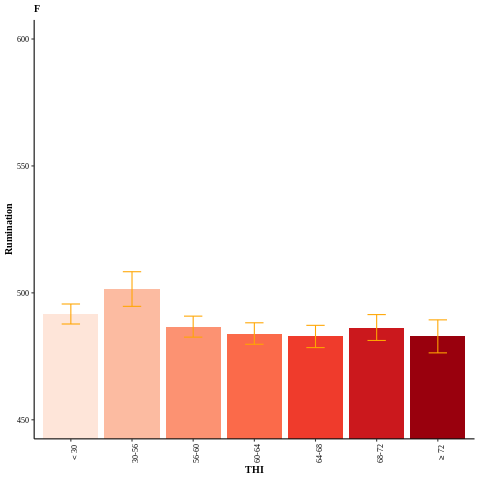

In [ ]:
%%R
finaldf<-finaldfD

finaldf$THImean <-factor(finaldf$THImean, levels=c("< 30","30-56","56-60","60-64","64-68","68-72",">= 72"))
p <-ggplot(finaldf)+ geom_bar( aes(x=THImean , y=lsmean, fill=THImean ), stat="identity",,alpha=1)+
scale_x_discrete(labels=c(expression(""<30),"30-56","56-60","60-64","64-68","68-72",expression("">=72)))+
geom_errorbar( aes(x=THImean, ymin=lower.CL, ymax=upper.CL), width=0.3, colour="orange", alpha=1, size=0.5)
p + coord_cartesian(ylim=c(450,600))+ scale_fill_brewer(palette= "Reds")+
theme_classic()+
theme(text=element_text(size=8, family="Times New Roman"), 
      axis.title.y = element_text(color="black", size=10, family="Times New Roman", face='bold'), 
      axis.title.x = element_text(color="black", size=10, family="Times New Roman", face='bold'),
      axis.text = element_text(color="black", size=8,family="Times New Roman"),
      axis.text.x = element_text(size=8, family="Times New Roman",angle=90))+
theme(legend.position = "none")+ 
labs(x = "THI")+ labs(y = "Rumination")+labs(title = "F")+ theme(plot.title = element_text(hjust = 0, size=10,face='bold'))

In [ ]:
%%R
ggsave("fig5f.tiff",
  path= '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/Figures/',     
  plot = last_plot(),
  width = 6,
  height = 6,
  units = c("cm"),
  dpi = 1000)

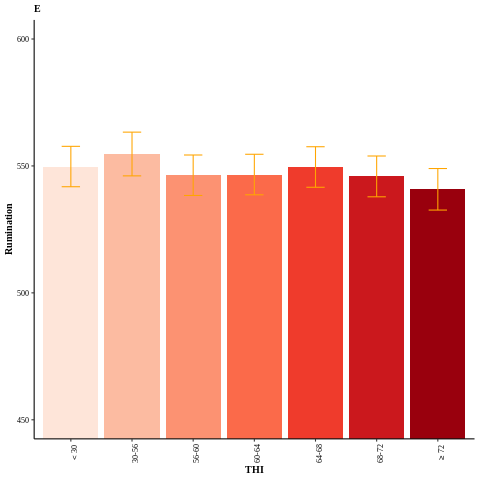

In [ ]:
%%R
finaldf<-finaldfA

finaldf$THImean <-factor(finaldf$THImean, levels=c("< 30","30-56","56-60","60-64","64-68","68-72",">= 72"))
p <-ggplot(finaldf)+ geom_bar( aes(x=THImean , y=lsmean, fill=THImean ), stat="identity",,alpha=1)+
scale_x_discrete(labels=c(expression(""<30),"30-56","56-60","60-64","64-68","68-72",expression("">=72)))+
geom_errorbar( aes(x=THImean, ymin=lower.CL, ymax=upper.CL), width=0.3, colour="orange", alpha=1, size=0.5)
p + coord_cartesian(ylim=c(450,600))+ scale_fill_brewer(palette= "Reds")+
theme_classic()+
theme(text=element_text(size=8, family="Times New Roman"), 
      axis.title.y = element_text(color="black", size=10, family="Times New Roman", face='bold'), 
      axis.title.x = element_text(color="black", size=10, family="Times New Roman", face='bold'),
      axis.text = element_text(color="black", size=8,family="Times New Roman"),
      axis.text.x = element_text(size=8, family="Times New Roman",angle=90))+
theme(legend.position = "none")+ 
labs(x = "THI")+ labs(y = "Rumination")+labs(title = "E")+ theme(plot.title = element_text(hjust = 0, size=10,face='bold'))

In [ ]:
%%R
ggsave("fig5e.tiff",
  path= '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/Figures/',     
  plot = last_plot(),
  width = 6,
  height = 6,
  units = c("cm"),
  dpi = 1000)

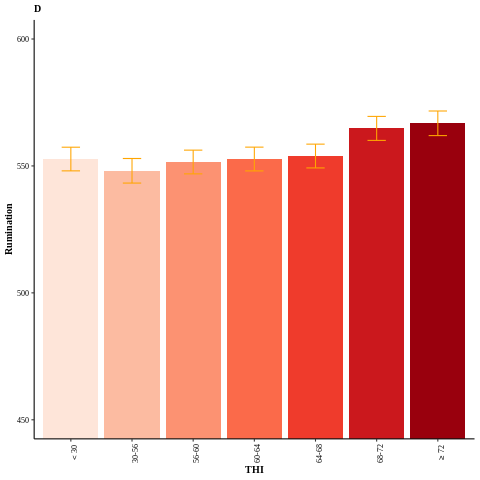

In [ ]:
%%R
finaldf<-finaldfC

finaldf$THImean <-factor(finaldf$THImean, levels=c("< 30","30-56","56-60","60-64","64-68","68-72",">= 72"))
p <-ggplot(finaldf)+ geom_bar( aes(x=THImean , y=lsmean, fill=THImean ), stat="identity",,alpha=1)+
scale_x_discrete(labels=c(expression(""<30),"30-56","56-60","60-64","64-68","68-72",expression("">=72)))+
geom_errorbar( aes(x=THImean, ymin=lower.CL, ymax=upper.CL), width=0.3, colour="orange", alpha=1, size=0.5)
p + coord_cartesian(ylim=c(450,600))+ scale_fill_brewer(palette= "Reds")+
theme_classic()+
theme(text=element_text(size=8, family="Times New Roman"), 
      axis.title.y = element_text(color="black", size=10, family="Times New Roman", face='bold'), 
      axis.title.x = element_text(color="black", size=10, family="Times New Roman", face='bold'),
      axis.text = element_text(color="black", size=8,family="Times New Roman"),
      axis.text.x = element_text(size=8, family="Times New Roman",angle=90))+
theme(legend.position = "none")+ 
labs(x = "THI")+ labs(y = "Rumination")+labs(title = "D")+ theme(plot.title = element_text(hjust = 0, size=10,face='bold'))

In [ ]:
%%R
ggsave("fig5d.tiff",
  path= '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/Figures/',     
  plot = last_plot(),
  width = 6,
  height = 6,
  units = c("cm"),
  dpi = 1000)

In [ ]:
%%R
LSMsAL<-emmeans::lsmeans(fit.1a, ~ fThiMeanCat, glhargs=list())
print(LSMsAL)

 fThiMeanCat lsmean   SE     df lower.CL upper.CL
 1              550 4.06 321456      542      558
 0              555 4.39 321456      546      563
 2              546 4.07 321456      538      554
 3              547 4.07 321456      539      555
 4              550 4.08 321456      542      558
 5              546 4.10 321456      538      554
 6              541 4.17 321456      533      549

Results are averaged over the levels of: fDimCat, fLactationNumberCat, fYear, fMonth, fHerdIdentifier 
Confidence level used: 0.95 


In [ ]:
%%R
LSMsCL<-emmeans::lsmeans(fit.1b, ~ fThiMeanCat, glhargs=list())
print(LSMsCL)

 fThiMeanCat lsmean   SE     df lower.CL upper.CL
 1              553 2.38 639331      548      557
 0              548 2.47 639331      543      553
 2              552 2.38 639331      547      556
 3              553 2.39 639331      548      557
 4              554 2.39 639331      549      559
 5              565 2.41 639331      560      570
 6              567 2.48 639331      562      572

Results are averaged over the levels of: fDimCat, fLactationNumberCat, fYear, fMonth, fHerdIdentifier 
Confidence level used: 0.95 


In [ ]:
%%R
LSMsDL<-emmeans::lsmeans(fit.1c, ~ fThiMeanCat, glhargs=list())
print(LSMsDL)

 fThiMeanCat lsmean   SE    df lower.CL upper.CL
 1              492 2.01 70722      488      496
 0              502 3.47 70722      495      508
 2              487 2.11 70722      483      491
 3              484 2.16 70722      480      488
 4              483 2.24 70722      478      487
 5              486 2.60 70722      481      491
 6              483 3.32 70722      476      489

Results are averaged over the levels of: fLactationNumberCat, fYear, fMonth, fHerdIdentifier 
Confidence level used: 0.95 


## Temperature mean figures results

In [ ]:
%%R
url_model6a <- "/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMeanAMS.R"
model<- load(file= url_model6a)
url_model6b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMeanCMS.R'
model<- load(file= url_model6b)
url_model6c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/rumination/models/ModelTempMeanDRY.R'
model<- load(file= url_model6c)

In [ ]:
%%R
##LSMs for dry cows
LSMsD<-emmeans::lsmeans(fit.6c, ~ fTempMeanCat, glhargs=list())
dfD<-LSMsD%>%
  as.data.frame()

## LSMSs for AMS
LSMsA<-emmeans::lsmeans(fit.6a, ~ fTempMeanCat, glhargs=list())
dfA<-LSMsA%>%
  as.data.frame()

## LSMs for CMS
LSMsC<-emmeans::lsmeans(fit.6b, ~ fTempMeanCat, glhargs=list())
dfC<-LSMsC%>%
  as.data.frame()

In [ ]:
%%R
TempMean<- c("< 0","0-12","12-16","16-20","20-24","24-28",">= 28")
df1 <- data.frame(TempMean)
finaldfD<-cbind(df1,dfD)
finaldfD<- subset(finaldfD, select = -c(fTempMeanCat))
finaldfC<-cbind(df1,dfC)
finaldfC<- subset(finaldfC, select = -c(fTempMeanCat))
finaldfA<-cbind(df1,dfA)
finaldfA<- subset(finaldfA, select = -c(fTempMeanCat))


In [ ]:
%%R
finaldf<-finaldfD
finaldf$TempMean <-factor(finaldf$TempMean, levels=c("< 0","0-12","12-16","16-20","20-24","24-28",">= 28"))
p <-ggplot(finaldf)+ geom_bar( aes(x=TempMean , y=lsmean, fill=TempMean ), stat="identity",,alpha=0.7)+
scale_x_discrete(labels=c(expression(""<0),"0-12","12-16","16-20","20-24","24-28",expression("">=28)))
geom_errorbar( aes(x=TempMean, ymin=lower.CL, ymax=upper.CL), width=0.4, colour="orange", alpha=0.9, size=1.3)
p + coord_cartesian(ylim=c(450,600))+ scale_fill_brewer(palette= "Reds")+ theme(legend.position= "none")+ 
theme_classic()+
theme(text=element_text(size=16, family="Times New Roman", face='bold'), 
      axis.title.y = element_text(color="black", size=16, family="Times New Roman", face= 'bold'), 
      axis.title.x = element_text(color="black", size=16, family="Times New Roman",face= 'bold'),
      axis.text = element_text(color="black", size=16,family="Times New Roman",face= 'bold'))+
theme(legend.position = "none")+
labs(x = "Temperature daily mean")+ labs(y = "Rumination")+labs(title = "F")+ theme(plot.title = element_text(hjust = 0))

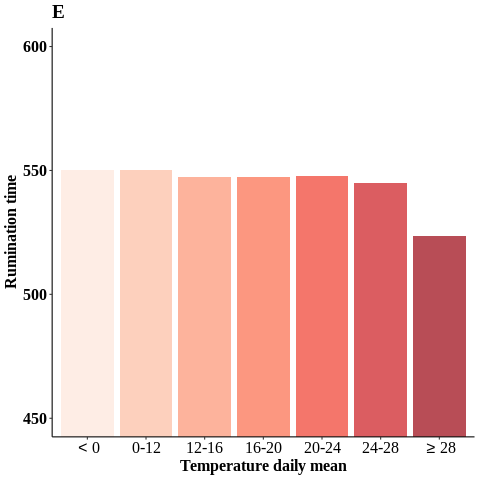

In [ ]:
%%R
finaldf<-finaldfA
finaldf$TempMean <-factor(finaldf$TempMean, levels=c("< 0","0-12","12-16","16-20","20-24","24-28",">= 28"))
p <-ggplot(finaldf)+ geom_bar( aes(x=TempMean , y=lsmean, fill=TempMean ), stat="identity",,alpha=0.7)+
scale_x_discrete(labels=c(expression(""<0),"0-12","12-16","16-20","20-24","24-28",expression("">=28)))
geom_errorbar( aes(x=TempMean, ymin=lower.CL, ymax=upper.CL), width=0.4, colour="orange", alpha=0.9, size=1.3)
p + coord_cartesian(ylim=c(450,600))+ scale_fill_brewer(palette= "Reds")+ theme(legend.position= "none")+ 
theme_classic()+
theme(text=element_text(size=16, family="Times New Roman", face='bold'), 
      axis.title.y = element_text(color="black", size=16, family="Times New Roman", face= 'bold'), 
      axis.title.x = element_text(color="black", size=16, family="Times New Roman",face= 'bold'),
      axis.text = element_text(color="black", size=16,family="Times New Roman",face= 'bold'))+
theme(legend.position = "none")+      
labs(x = "Temperature daily mean")+ labs(y = "Rumination")+labs(title = "E")+ theme(plot.title = element_text(hjust = 0))

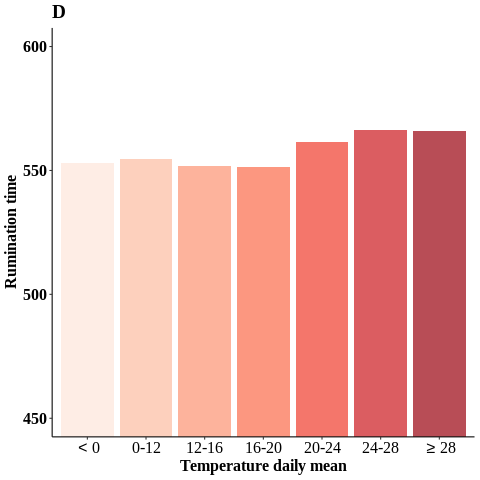

In [ ]:
%%R
finaldf<-finaldfC
finaldf$TempMean <-factor(finaldf$TempMean, levels=c("< 0","0-12","12-16","16-20","20-24","24-28",">= 28"))
p <-ggplot(finaldf)+ geom_bar( aes(x=TempMean , y=lsmean, fill=TempMean ), stat="identity",,alpha=0.7)+
scale_x_discrete(labels=c(expression(""<0),"0-12","12-16","16-20","20-24","24-28",expression("">=28)))
geom_errorbar( aes(x=TempMean, ymin=lower.CL, ymax=upper.CL), width=0.4, colour="orange", alpha=0.9, size=1.3)
p + coord_cartesian(ylim=c(450,600))+ scale_fill_brewer(palette= "Reds")+ theme(legend.position= "none")+ 
theme_classic()+
theme(text=element_text(size=16, family="Times New Roman", face='bold'), 
      axis.title.y = element_text(color="black", size=16, family="Times New Roman", face= 'bold'), 
      axis.title.x = element_text(color="black", size=16, family="Times New Roman",face= 'bold'),
      axis.text = element_text(color="black", size=16,family="Times New Roman",face= 'bold'))+
theme(legend.position = "none")+
labs(x = "Temperature daily mean")+ labs(y = "Rumination")+labs(title = "D")+ theme(plot.title = element_text(hjust = 0))

In [ ]:
%%R
LSMsAL<-emmeans::lsmeans(fit.6a, ~ fTempMeanCat, glhargs=list())
print(LSMsAL)

 fTempMeanCat lsmean   SE     df lower.CL upper.CL
 1               550 4.06 321456      542      558
 0               550 4.12 321456      542      558
 2               547 4.06 321456      539      555
 3               547 4.06 321456      539      555
 4               548 4.08 321456      540      556
 5               545 4.15 321456      537      553
 6               524 4.65 321456      514      533

Results are averaged over the levels of: fDimCat, fLactationNumberCat, fYear, fMonth, fHerdIdentifier 
Confidence level used: 0.95 


In [ ]:
%%R
LSMsCL<-emmeans::lsmeans(fit.6b, ~ fTempMeanCat, glhargs=list())
print(LSMsCL)

 fTempMeanCat lsmean   SE     df lower.CL upper.CL
 1               553 2.37 639331      548      558
 0               555 2.41 639331      550      559
 2               552 2.38 639331      547      557
 3               552 2.38 639331      547      556
 4               562 2.39 639331      557      566
 5               566 2.44 639331      562      571
 6               566 2.72 639331      560      571

Results are averaged over the levels of: fDimCat, fLactationNumberCat, fYear, fMonth, fHerdIdentifier 
Confidence level used: 0.95 


In [ ]:
%%R
LSMsDL<-emmeans::lsmeans(fit.6c, ~ fTempMeanCat, glhargs=list())
print(LSMsDL)

 fTempMeanCat lsmean   SE    df lower.CL upper.CL
 1               493 2.03 70722      489      497
 0               510 2.68 70722      505      515
 2               486 2.08 70722      482      490
 3               481 2.13 70722      477      486
 4               481 2.33 70722      477      486
 5               487 3.03 70722      481      493
 6               475 5.21 70722      465      485

Results are averaged over the levels of: fLactationNumberCat, fYear, fMonth, fHerdIdentifier 
Confidence level used: 0.95 
